# PROBLEM STATEMENT

THE FAILURE OF ANY COMPANY HAS POTENTIALLY WIDESPREAD NEGATIVE EFFECTS NOT ONLY THE EMPLOYEES OF THE COMAPANY BUT ALSO MANY OTHER BUSINESSES AND INDIVIDUALS INCLUDING SUPPLIERS, CUSTOMERS AND OTHER ORGANIZATIONS THAT DO BUSINESS WITH IT. 
PREDICTING BANKRUPTCY HAS BEEN A HOT SUBJECT OF FOCUS FOR MANY
ECONOMISTS. THE MAIN OBJECTIVE IS TO BUILD A MODEL TO CLASSIFY COMPANIES
INTO TWO CATEGORIES: BANKRUPT AND NOT BANKRUPT, BY USING SEVERAL ECONOMIC
VARIABLES OF INTEREST FROM A DATASET OF 6819 ROWS & 96 COLUMNS. THE DATA IS BASED ON THE TAIWAN ECCONOMIC JOURNAL FOR COMPAMIES LISTED IN THE TAIWAN STOCK EXCHANGE FOR THE TIME PERIOD 1999-2009. 

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data set:
df = pd.read_csv('data.csv')
df = df.sample(frac=1,random_state=10).reset_index().drop('index',axis=1)
df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          0                                           0.548189          
1          0                                           0.540145          
2          0                                           0.380003          
3          0                                           0.500951          
4          0                                           0.539658          

    ROA(A) before interest and % after tax  \
0                                 0.600196   
1                                 0.599706   
2                                 0.411197   
3                                 0.577573   
4                                 0.596326   

    ROA(B) before interest and depreciation after tax  \
0                                           0.603726    
1                                           0.584614    
2                                           0.416243    
3                                           0.555918    
4                                           0.576690    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.598654                      0.598654   
1                 0.603590                      0.603590   
2                 0.597558                      0.597558   
3                 0.598841                      0.598841   
4                 0.605111                      0.605111   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.999022                    0.797448   
1                0.999040                    0.797528   
2                0.998665                    0.796945   
3                0.998978                    0.797511   
4                0.999058                    0.797520   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.809366                                      0.303516   
1                      0.809420                                      0.303618   
2                      0.808898                                      0.303385   
3                      0.809427                                      0.303719   
4                      0.809405                                      0.303566   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                               0.781636             2.760000e+09   
1                               0.781682             8.890000e+09   
2                               0.781123             3.678397e-04   
3                               0.781643             7.500000e+09   
4                               0.781666             9.520000e+09   

    Research and development expense rate   Cash flow rate  \
0                            7.640000e+08         0.461594   
1                            2.680000e+09         0.462983   
2                            1.468643e-04         0.455367   
3                            0.000000e+00         0.460794   
4                            2.500000e+09         0.452589   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                              0.000000       0.070452   
1                              0.000188       0.189189   
2                              0.000246       0.000000   
3                              0.000624       0.026116   
4                              0.000301       0.259945   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                  0.175256                  0.175256   
1                  0.201677                  0.201677   
2                  0.154102                  0.154102   
3                  0.197674                  0.197674   
4                  0.252160                  0.252160   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                  0.175256                                  0.231729   
1                  0.201677                                  0.254515   
2                  0.154102                     

In [3]:
df.shape

(6819, 96)

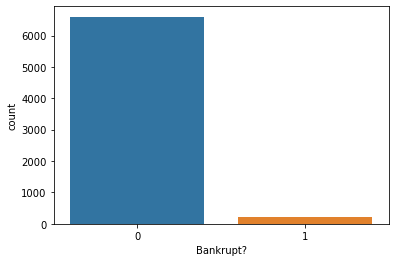

0    6599
1     220
Name: Bankrupt?, dtype: int64


In [4]:
# Checking the balance/compostion of data w.r.t target labels: 
sns.countplot(df['Bankrupt?'])
plt.show()
print(df['Bankrupt?'].value_counts())

In [5]:
# Checking proportion of null values:
propnull = df.isnull().sum()/len(df)
propnull

Bankrupt?                                                   0.0
 ROA(C) before interest and depreciation before interest    0.0
 ROA(A) before interest and % after tax                     0.0
 ROA(B) before interest and depreciation after tax          0.0
 Operating Gross Margin                                     0.0
 Realized Sales Gross Margin                                0.0
 Operating Profit Rate                                      0.0
 Pre-tax net Interest Rate                                  0.0
 After-tax net Interest Rate                                0.0
 Non-industry income and expenditure/revenue                0.0
 Continuous interest rate (after tax)                       0.0
 Operating Expense Rate                                     0.0
 Research and development expense rate                      0.0
 Cash flow rate                                             0.0
 Interest-bearing debt interest rate                        0.0
 Tax rate (A)                           

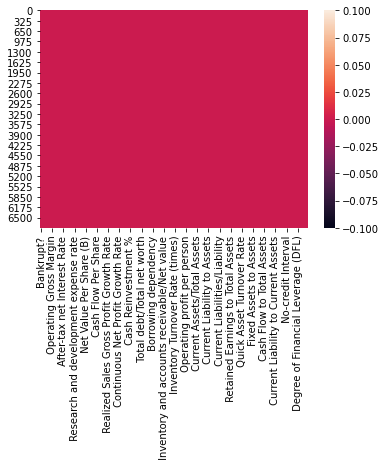

In [6]:
# Visualizing null values:
sns.heatmap(df.isnull())
plt.show()

NO NULL VALUES

In [7]:
# Cheking for duplicates:
if df.duplicated().sum() == 0:
    print('No duplicates')

No duplicates


In [8]:
# Checking the columns and thier respective datatypes:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

### Numeric Variables

In [9]:
# Numeric Data:
num = df.select_dtypes(include='float')
num.head()

ROA(C) before interest and depreciation before interest  \
0                                           0.548189          
1                                           0.540145          
2                                           0.380003          
3                                           0.500951          
4                                           0.539658          

    ROA(A) before interest and % after tax  \
0                                 0.600196   
1                                 0.599706   
2                                 0.411197   
3                                 0.577573   
4                                 0.596326   

    ROA(B) before interest and depreciation after tax  \
0                                           0.603726    
1                                           0.584614    
2                                           0.416243    
3                                           0.555918    
4                                           0.576690    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.598654                      0.598654   
1                 0.603590                      0.603590   
2                 0.597558                      0.597558   
3                 0.598841                      0.598841   
4                 0.605111                      0.605111   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.999022                    0.797448   
1                0.999040                    0.797528   
2                0.998665                    0.796945   
3                0.998978                    0.797511   
4                0.999058                    0.797520   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.809366                                      0.303516   
1                      0.809420                                      0.303618   
2                      0.808898                                      0.303385   
3                      0.809427                                      0.303719   
4                      0.809405                                      0.303566   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                               0.781636             2.760000e+09   
1                               0.781682             8.890000e+09   
2                               0.781123             3.678397e-04   
3                               0.781643             7.500000e+09   
4                               0.781666             9.520000e+09   

    Research and development expense rate   Cash flow rate  \
0                            7.640000e+08         0.461594   
1                            2.680000e+09         0.462983   
2                            1.468643e-04         0.455367   
3                            0.000000e+00         0.460794   
4                            2.500000e+09         0.452589   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                              0.000000       0.070452   
1                              0.000188       0.189189   
2                              0.000246       0.000000   
3                              0.000624       0.026116   
4                              0.000301       0.259945   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                  0.175256                  0.175256   
1                  0.201677                  0.201677   
2                  0.154102                  0.154102   
3                  0.197674                  0.197674   
4                  0.252160                  0.252160   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                  0.175256                                  0.231729   
1                  0.201677                                  0.254515   
2                  0.154102                                  0.185875   
3                  0.197674               

In [10]:
num.shape

(6819, 93)

In [11]:
# Summary of the Numeric variables:
num.describe()

ROA(C) before interest and depreciation before interest  \
count                                        6819.000000          
mean                                            0.505180          
std                                             0.060686          
min                                             0.000000          
25%                                             0.476527          
50%                                             0.502706          
75%                                             0.535563          
max                                             1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  \
count                                   6819.000000   
mean                                       0.303623   
std                                        0.011163   
min                                        0.000000   
25%                                        0.303466   
50%                                        0.303525   
75%                                        0.303585   
max                                        1.000000   

        Continuous interest rate (after tax)   Operating Expense Rate  \
count                            6819.000000             6.819000e+03   
mean                                0.781381             1.995347e+09   
std                                 0.012679             3.237684e+09   
min                                 0.000000             0.000000e+00   
25%                                 0.781567             1.5668

###### EDA

In [12]:
# Creating a copy of the numeric dataset so as to add the Target labels and analyse impact of numeric variables on the Target:
datanum = num.copy()
datanum['Target'] = df['Bankrupt?']
datanum.head()

ROA(C) before interest and depreciation before interest  \
0                                           0.548189          
1                                           0.540145          
2                                           0.380003          
3                                           0.500951          
4                                           0.539658          

    ROA(A) before interest and % after tax  \
0                                 0.600196   
1                                 0.599706   
2                                 0.411197   
3                                 0.577573   
4                                 0.596326   

    ROA(B) before interest and depreciation after tax  \
0                                           0.603726    
1                                           0.584614    
2                                           0.416243    
3                                           0.555918    
4                                           0.576690    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.598654                      0.598654   
1                 0.603590                      0.603590   
2                 0.597558                      0.597558   
3                 0.598841                      0.598841   
4                 0.605111                      0.605111   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.999022                    0.797448   
1                0.999040                    0.797528   
2                0.998665                    0.796945   
3                0.998978                    0.797511   
4                0.999058                    0.797520   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.809366                                      0.303516   
1                      0.809420                                      0.303618   
2                      0.808898                                      0.303385   
3                      0.809427                                      0.303719   
4                      0.809405                                      0.303566   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                               0.781636             2.760000e+09   
1                               0.781682             8.890000e+09   
2                               0.781123             3.678397e-04   
3                               0.781643             7.500000e+09   
4                               0.781666             9.520000e+09   

    Research and development expense rate   Cash flow rate  \
0                            7.640000e+08         0.461594   
1                            2.680000e+09         0.462983   
2                            1.468643e-04         0.455367   
3                            0.000000e+00         0.460794   
4                            2.500000e+09         0.452589   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                              0.000000       0.070452   
1                              0.000188       0.189189   
2                              0.000246       0.000000   
3                              0.000624       0.026116   
4                              0.000301       0.259945   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                  0.175256                  0.175256   
1                  0.201677                  0.201677   
2                  0.154102                  0.154102   
3                  0.197674                  0.197674   
4                  0.252160                  0.252160   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                  0.175256                                  0.231729   
1                  0.201677                                  0.254515   
2                  0.154102                                  0.185875   
3                  0.197674               

In [13]:
# Correlation Matrix:
corr = datanum.corr()
corr

ROA(C) before interest and depreciation before interest  \
 ROA(C) before interest and depreciation before...                                           1.000000          
 ROA(A) before interest and % after tax                                                      0.940124          
 ROA(B) before interest and depreciation after tax                                           0.986849          
 Operating Gross Margin                                                                      0.334719          
 Realized Sales Gross Margin                                                                 0.332755          
 Operating Profit Rate                                                                       0.035725          
 Pre-tax net Interest Rate                                                                   0.053419          
 After-tax net Interest Rate                                                                 0.049222          
 Non-industry income and expenditure/revenue                                                 0.020501          
 Continuous interest rate (after tax)                                                        0.051328          
 Operating Expense Rate                                                                      0.066869          
 Research and development expense rate                                                       0.106461          
 Cash flow rate                                                                              0.323482          
 Interest-bearing debt interest rate                                                         0.048882          
 Tax rate (A)                                                                                0.250761          
 Net Value Per Share (B)                                                                     0.505580          
 Net Value Per Share (A)                                                                     0.505407          
 Net Value Per Share (C)                                                                     0.505281          
 Persistent EPS in the Last Four Seasons                                                     0.775006          
 Cash Flow Per Share                                                                         0.379839          
 Revenue Per Share (Yuan ¥)                                                                 -0.015932          
 Operating Profit Per Share (Yuan ¥)                                                         0.687201          
 Per Share Net profit before tax (Yuan ¥)                                                    0.750564          
 Realized Sales Gross Profit Growth Rate                                                     0.000591          
 Operating Profit Growth Rate                                                                0.036511          
 After-tax Net Profit Growth Rate                                                            0.115083          
 Regular Net Profit Growth Rate                                                              0.115040          
 Continuous Net Profit Growth Rate                                                           0.025234          
 Total Asset Growth Rate                                                                     0.019635          
 Net Value Growth Rate                                                                      -0.021930          
 Total Asset Return Growth Rate Ratio                                                        0.079906          
 Cash Reinvestment %                                                                         0.296158          
 Current Ratio                                                                               0.013196          
 Quick Ratio                                                                                -0.026336          
 Interest Expense Ratio                                                                      0.003988          
 Total debt/Total net

In [14]:
# Finding Numeric Variables that have some +/- correlation with the Target:
poscor = [i for i in corr['Target'][corr['Target']>=0.1].index if i!='Target'] # Variables with +correlation with target
print('Numeric Features with positive correlation with Target: \n',poscor,'\n')
negcor = [i for i in corr['Target'][corr['Target']<=-0.1].index] # Variables with -correlation with target
print('Numeric Features with negative correlation with Target: \n',negcor)

Numeric Features with positive correlation with Target: 
 [' Debt ratio %', ' Borrowing dependency', ' Current Liability to Assets', ' Current Liabilities/Equity', ' Total expense/Assets', ' Current Liability to Equity', ' Equity to Long-term Liability', ' Current Liability to Current Assets', ' Liability to Equity'] 

Numeric Features with negative correlation with Target: 
 [' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons', ' Operating Profit Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Net worth/Assets', ' Operating profit/Paid-in capital', ' Net profit before tax/Paid-in capital', ' Working Capital to Total Assets', ' Cash/Total Assets', ' Working Capital/Equity', ' Retained Earnings t

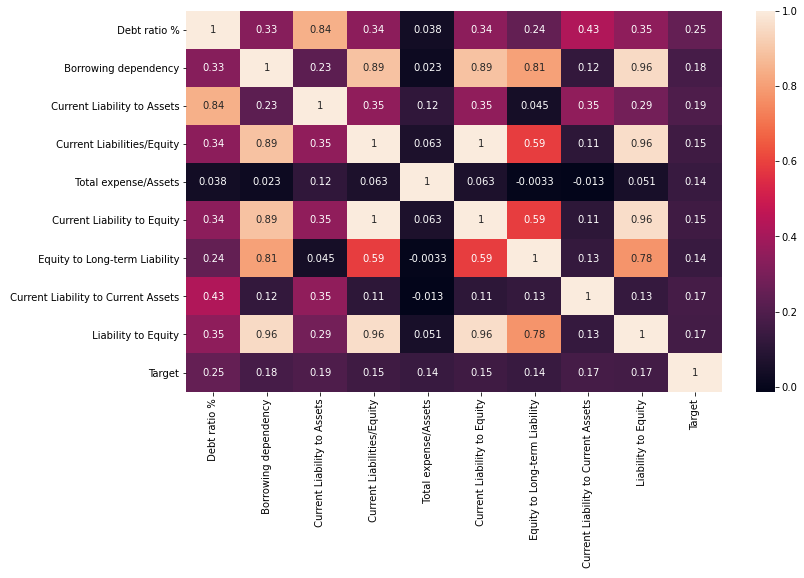

In [15]:
# Heatmap of the postively correlated features with Target:
plt.figure(figsize=(12,7))
sns.heatmap(pd.concat([datanum[poscor],datanum['Target']],axis=1).corr(),annot=True)
plt.show()

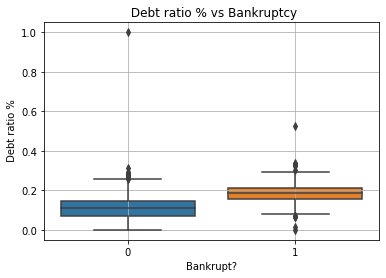

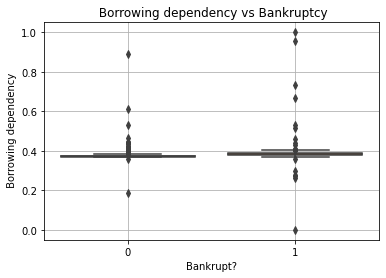

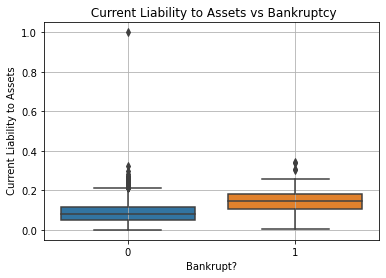

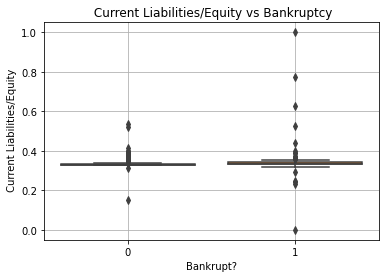

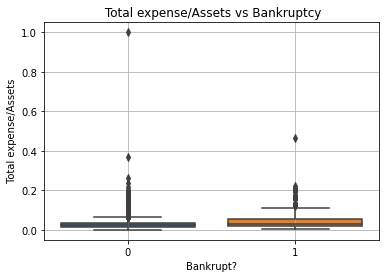

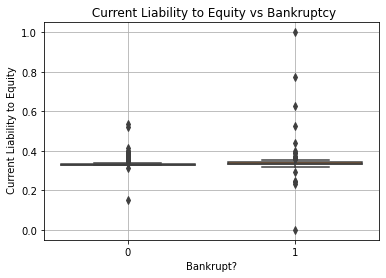

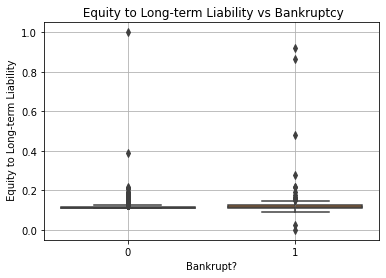

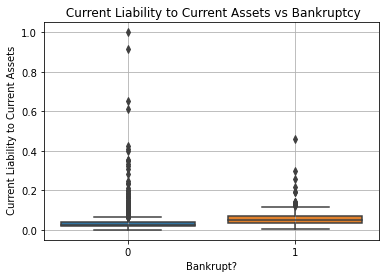

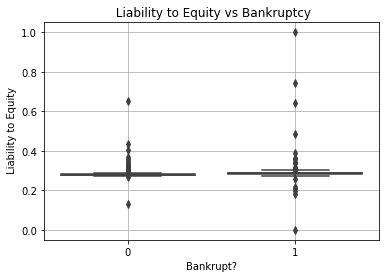

In [16]:
# Visaulizing the effect of positively correlated features on the Target using Bivariate Analysis:
for i in poscor:
    title = i+str(' vs Bankruptcy')
    sns.boxplot(df['Bankrupt?'],df[i])
    plt.title(title)
    plt.grid()
    plt.show()

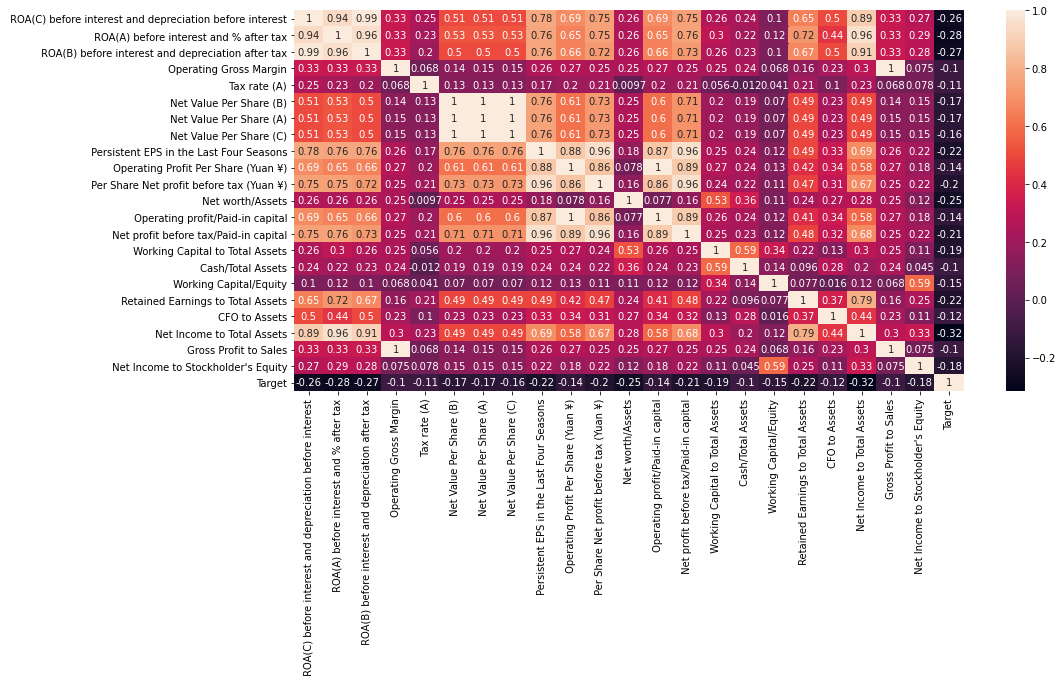

In [17]:
# Heatmap of the negatively correlated features with Target:
plt.figure(figsize=(15,7))
sns.heatmap(pd.concat([datanum[negcor],datanum['Target']],axis=1).corr(),annot=True)
plt.show()

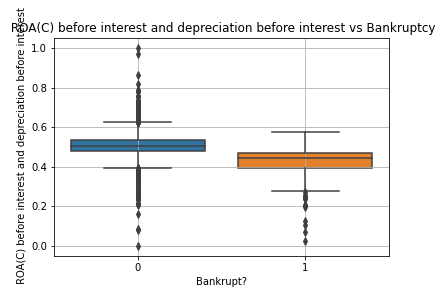

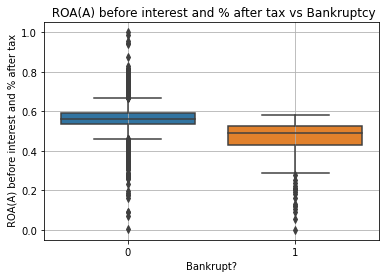

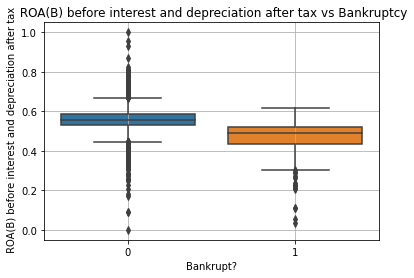

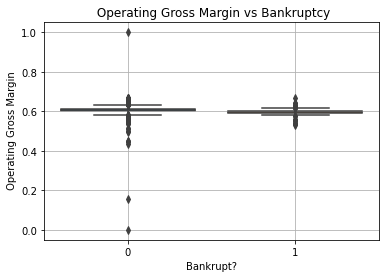

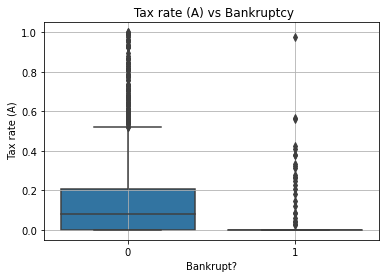

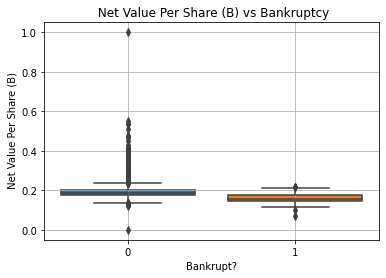

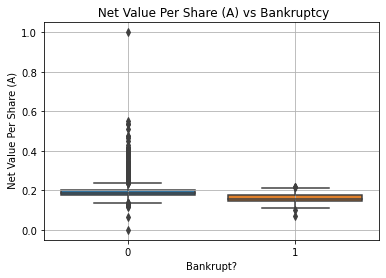

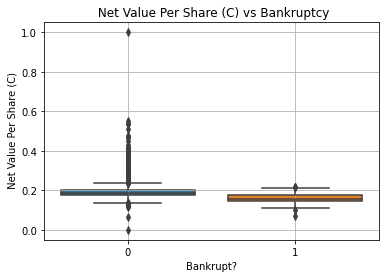

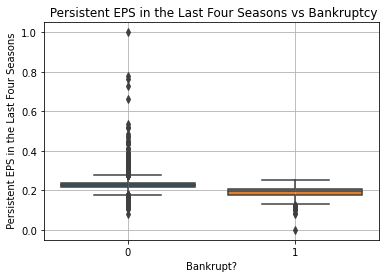

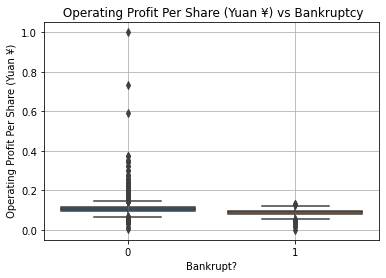

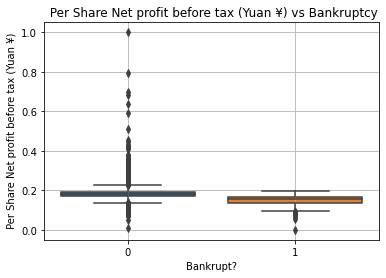

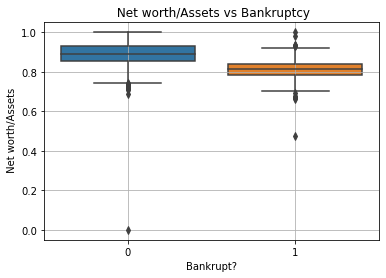

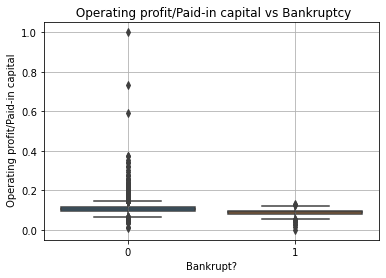

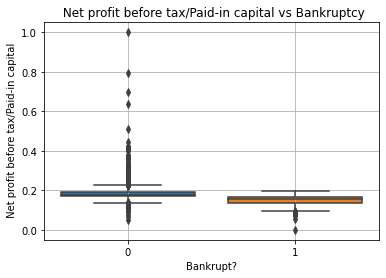

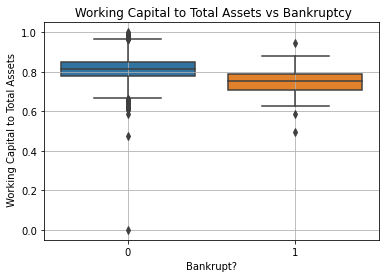

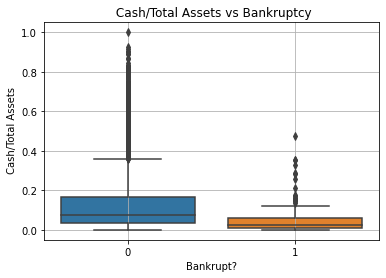

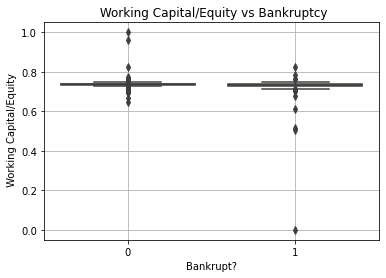

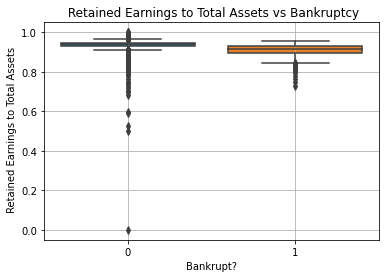

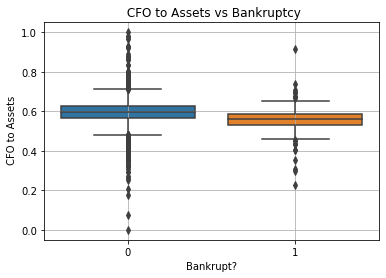

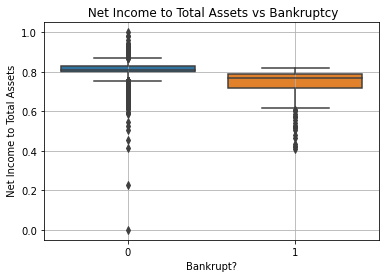

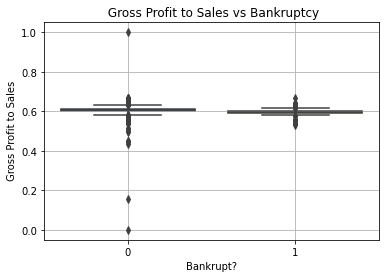

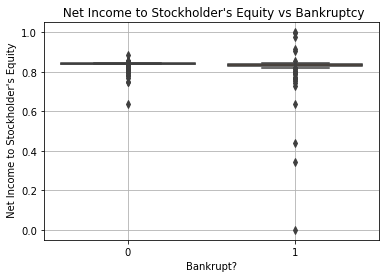

In [18]:
# Visaulizing the effect of negatively correlated features on the Target using Bivariate Analysis:
for i in negcor:
    title = i+str(' vs Bankruptcy')
    sns.boxplot(df['Bankrupt?'],df[i])
    plt.title(title)
    plt.grid()
    plt.show()

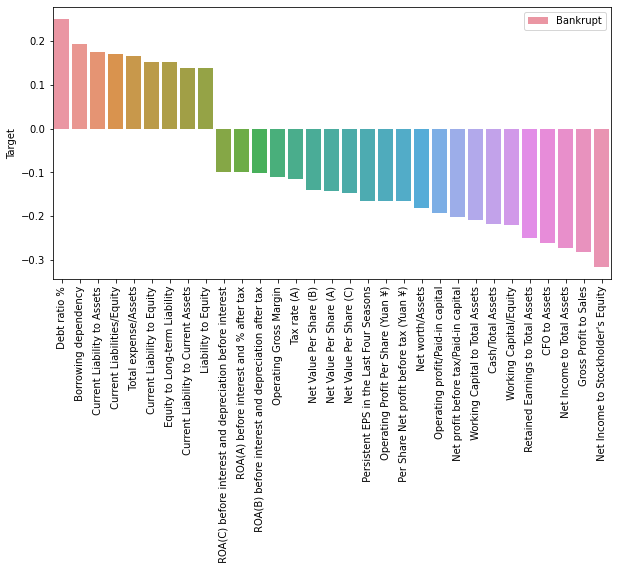

In [19]:
# Univariate analysis based on the correlation values of Target 1 labels to strenghten the inferences:
corrfeat = poscor.copy()
corrfeat.extend(negcor)      # List of all correlated features

# Plotting the correlations of each correlated features to show impact of correlated features on target:
plt.figure(figsize=(10,5))
sns.barplot(corrfeat,corr.loc[corrfeat,'Target'].sort_values(ascending=False),label='Bankrupt')
plt.legend()
plt.tick_params(axis='x',labelrotation=90)
plt.show()

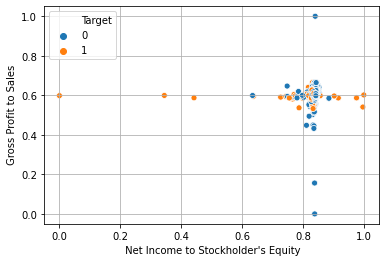

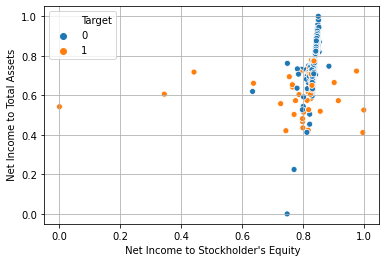

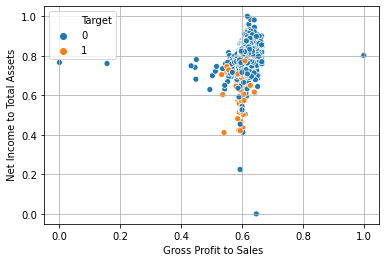

In [20]:
# Multivariate Analysis with top 3 negatively correlated features:
# Top Inhibitors of Bankruptcy
negcor = negcor[::-1]
for i in negcor[:3]:
    j = negcor.index(i)+1
    while j < len(negcor[:3]):
        sns.scatterplot(datanum[i],datanum[negcor[j]],hue=datanum['Target'])
        plt.grid()
        plt.show()
        j = j+1

###### Key Inferences: Financial parameters like Net Income to Stockholder's Equity, Gross Profit to Sales, Net Income to Total Assets and many other indicators of Earnings, Profits, Working Capital, Equity and Assests seem to show some level of negative correlation w.r.t the target which would imply greater these financial parameters lesser the risk for the company to go bankrupt.

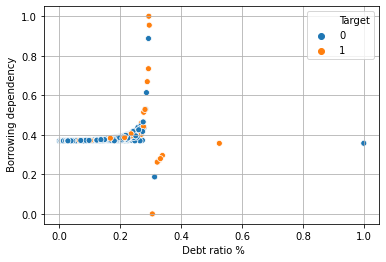

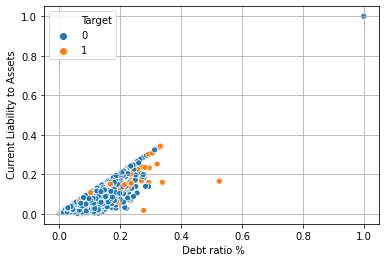

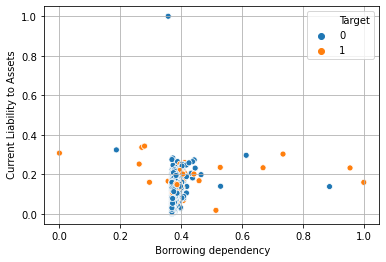

In [21]:
# Multivariate Analysis with top 3 positively correlated features:
# Top Contributors of Bankruptcy
for i in poscor[:3]:
    j = poscor.index(i)+1
    while j < len(negcor[:3]):
        sns.scatterplot(datanum[i],datanum[poscor[j]],hue=datanum['Target'])
        plt.grid()
        plt.show()
        j = j+1

###### Key Inferences: Financial parameters like Debt ratio%, Borrowing Dependency, Current Liability to Assets and many other indicators of Liabilities and Debts, Position of Financial Weakness, Proportions of Equity in Debt, Expenses incurred and Losses seem to show some level of positive correlation w.r.t the target which would imply greater these financial parameters higher the company runs the risk of going bankrupt sooner if the company has no strong Financial Dispositon, Assets and Equity to back the increasing values of the aforementioned financial parameters.

In [22]:
# Carrying out ANOVA Multiway to validate the features choosen for EDA:
from statsmodels.formula.api import ols
from statsmodels.stats.api import anova_lm
# Performing ANOVA multiway on the Positively correlated features to prove that they have significant effect on the Target:
mpos = ols("df['Bankrupt?'] ~ df[' Debt ratio %']+df[' Borrowing dependency']+df[' Current Liability to Assets']+df[' Current Liabilities/Equity']+df[' Total expense/Assets']+df[' Current Liability to Equity']+df[' Equity to Long-term Liability']+df[' Current Liability to Current Assets']+df[' Liability to Equity']",data=df).fit()
summpos = anova_lm(mpos)
if summpos['PR(>F)'].values[0] < 0.05:
    print('P-value =',summpos['PR(>F)'].values[0],'Therefore, all Positively correlated features have a significant effect on the Target.')
else:
    print('P-value =',summpos['PR(>F)'].values[0],'Therfore, Some of the choosen Positively correlated features does not have a significant effect on the Target')
print()
# Performing ANOVA multiway on the Negatively correlated features to prove that they have significant effect on the Target:
mneg = ols('''df['Bankrupt?'] ~df[" Net Income to Stockholder's Equity"]+df[' Gross Profit to Sales']+df[' Net Income to Total Assets']+df[' CFO to Assets']+df[' Retained Earnings to Total Assets']+df[' Working Capital/Equity']+df[' Cash/Total Assets']+df[' Working Capital to Total Assets']+df[' Net profit before tax/Paid-in capital']+df[' Operating profit/Paid-in capital']+df[' Net worth/Assets']+df[' Per Share Net profit before tax (Yuan ¥)']+df[' Operating Profit Per Share (Yuan ¥)']+df[' Persistent EPS in the Last Four Seasons']+df[' Net Value Per Share (C)']+df[' Net Value Per Share (A)']+df[' Net Value Per Share (B)']+df[' Tax rate (A)']+df[' Operating Gross Margin']+df[' ROA(B) before interest and depreciation after tax']+df[' ROA(A) before interest and % after tax']+df[' ROA(C) before interest and depreciation before interest']''',data=df).fit()
summneg = anova_lm(mneg)
if summneg['PR(>F)'].values[0] < 0.05:
    print('P-value =',summneg['PR(>F)'].values[0],'Therefore, all Negatively correlated features have a significant effect on the Target.')
else:
    print('P-value =',summneg['PR(>F)'].values[0],'Therfore, Some of the choosen Negatively correlated features does not have a significant effect on the Target.')

P-value = 2.354944292722805e-101 Therefore, all Positively correlated features have a significant effect on the Target.

P-value = 1.3346784845860579e-58 Therefore, all Negatively correlated features have a significant effect on the Target.


### Categoric Variables

In [23]:
categ = df.drop(num.columns,axis=1)
categ.head()

Bankrupt?   Liability-Assets Flag   Net Income Flag
0          0                       0                 1
1          0                       0                 1
2          0                       0                 1
3          0                       0                 1
4          0                       0                 1

###### EDA

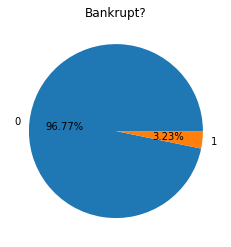

0    6599
1     220
Name: Bankrupt?, dtype: int64



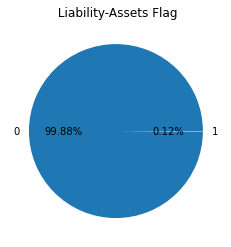

0    6811
1       8
Name:  Liability-Assets Flag, dtype: int64



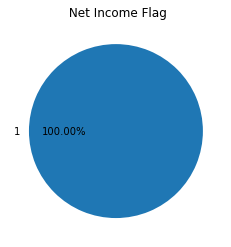

1    6819
Name:  Net Income Flag, dtype: int64



In [24]:
# Analysing label composition of Categoric Variables:
for i in categ:
    plt.pie(x=categ[i].value_counts().values,labels=categ[i].value_counts().index,autopct='%.2f%%')
    plt.title(i)
    plt.show()
    print(categ[i].value_counts())
    print()

In [25]:
# Checking the influence of categoric variables on the Target using crosstab:
for i in categ:
    if i != 'Bankrupt?':
        cr = pd.crosstab(categ[i],categ['Bankrupt?'])
        print(cr)
        print()

Bankrupt?                  0    1
 Liability-Assets Flag           
0                       6597  214
1                          2    6

Bankrupt?            0    1
 Net Income Flag           
1                 6599  220



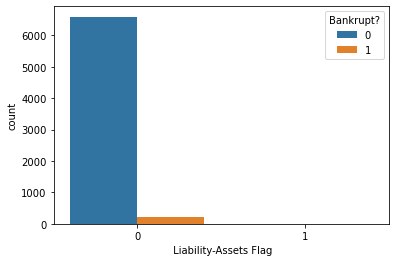

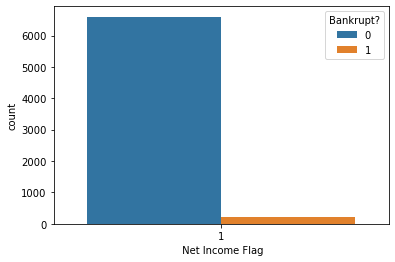

In [26]:
# Visualizing influence of categoric variables on the Target:
for i in categ:
    if i!='Bankrupt?':
        sns.countplot(categ[i],hue=categ['Bankrupt?'])
        plt.show()

In [27]:
# Performing Chi-square test to statistically prove the effect of categorical features on the Target:
from scipy import stats
for i in categ:
    if i != 'Bankrupt?':
        cr = pd.crosstab(categ[i],categ['Bankrupt?'])
        xi,p,dof,ex = stats.chi2_contingency(cr)
        if p<0.05:
            print('P-value =',p,'which is less than level of significance of 0.05 at 95% confidence therefore,',i,'is significantly effecting the Target.')
            print()
        else:
            print('P-value =',p,'which is greater than level of significance of 0.05 at 95% confidence therefore,',i,'is not significantly effecting the Target.')

P-value = 9.139776609482457e-26 which is less than level of significance of 0.05 at 95% confidence therefore,  Liability-Assets Flag is significantly effecting the Target.

P-value = 1.0 which is greater than level of significance of 0.05 at 95% confidence therefore,  Net Income Flag is not significantly effecting the Target.


### Data Preprocessing 1: Removing rows of data where numeric features have 0-values, removing categoric features that don't contribute to variations in the Target and Tranforming numeric data.

###### Numeric Variables

Handling Missing Values/0-Values (Removing 0-values from the Majority Labels)

In [28]:
# Mininmum values being 0 might indicate missing values since each feature is a ratio indicating some financinal metric
num.describe()

ROA(C) before interest and depreciation before interest  \
count                                        6819.000000          
mean                                            0.505180          
std                                             0.060686          
min                                             0.000000          
25%                                             0.476527          
50%                                             0.502706          
75%                                             0.535563          
max                                             1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  \
count                                   6819.000000   
mean                                       0.303623   
std                                        0.011163   
min                                        0.000000   
25%                                        0.303466   
50%                                        0.303525   
75%                                        0.303585   
max                                        1.000000   

        Continuous interest rate (after tax)   Operating Expense Rate  \
count                            6819.000000             6.819000e+03   
mean                                0.781381             1.995347e+09   
std                                 0.012679             3.237684e+09   
min                                 0.000000             0.000000e+00   
25%                                 0.781567             1.5668

In [29]:
# Counting the number of missing values in each feature
d_before_impute={}
for i in num:
    count = 0
    for j in num[i].values:
        if j == 0:
            count = count +1       
    miss = {i:count}
    d_before_impute.update(miss)
# Dictionary represents the feature name as its key and the number of missing values as the value    
d_before_impute

{' ROA(C) before interest and depreciation before interest': 1,
 ' ROA(A) before interest and % after tax': 1,
 ' ROA(B) before interest and depreciation after tax': 1,
 ' Operating Gross Margin': 1,
 ' Realized Sales Gross Margin': 1,
 ' Operating Profit Rate': 1,
 ' Pre-tax net Interest Rate': 1,
 ' After-tax net Interest Rate': 1,
 ' Non-industry income and expenditure/revenue': 1,
 ' Continuous interest rate (after tax)': 1,
 ' Operating Expense Rate': 1,
 ' Research and development expense rate': 1424,
 ' Cash flow rate': 1,
 ' Interest-bearing debt interest rate': 891,
 ' Tax rate (A)': 2568,
 ' Net Value Per Share (B)': 1,
 ' Net Value Per Share (A)': 1,
 ' Net Value Per Share (C)': 1,
 ' Persistent EPS in the Last Four Seasons': 1,
 ' Cash Flow Per Share': 1,
 ' Revenue Per Share (Yuan ¥)': 2,
 ' Operating Profit Per Share (Yuan ¥)': 1,
 ' Per Share Net profit before tax (Yuan ¥)': 1,
 ' Realized Sales Gross Profit Growth Rate': 1,
 ' Operating Profit Growth Rate': 1,
 ' After-

In [30]:
# Counting missing values for only -ve target label (Bankrupt? = 0, ei Majority label)
neg = datanum[datanum['Target']==0]

d0={}
for i in num:
    count=0
    for j in neg[i]:
        if j == 0:
            count = count +1       
    miss0 = {i:count}
    d0.update(miss0)   
d0

{' ROA(C) before interest and depreciation before interest': 1,
 ' ROA(A) before interest and % after tax': 0,
 ' ROA(B) before interest and depreciation after tax': 1,
 ' Operating Gross Margin': 1,
 ' Realized Sales Gross Margin': 1,
 ' Operating Profit Rate': 1,
 ' Pre-tax net Interest Rate': 1,
 ' After-tax net Interest Rate': 1,
 ' Non-industry income and expenditure/revenue': 1,
 ' Continuous interest rate (after tax)': 1,
 ' Operating Expense Rate': 1,
 ' Research and development expense rate': 1345,
 ' Cash flow rate': 1,
 ' Interest-bearing debt interest rate': 887,
 ' Tax rate (A)': 2374,
 ' Net Value Per Share (B)': 1,
 ' Net Value Per Share (A)': 1,
 ' Net Value Per Share (C)': 1,
 ' Persistent EPS in the Last Four Seasons': 0,
 ' Cash Flow Per Share': 1,
 ' Revenue Per Share (Yuan ¥)': 2,
 ' Operating Profit Per Share (Yuan ¥)': 0,
 ' Per Share Net profit before tax (Yuan ¥)': 0,
 ' Realized Sales Gross Profit Growth Rate': 1,
 ' Operating Profit Growth Rate': 1,
 ' After-

In [31]:
# Extracting the indices at which missing values were encountered in -ve target label(Majority target label):
negind = [list(neg[i][neg[i]==0].index) for i in num] # Nested list of indices
# Converting nested list of indices to just 1 list:
indneg = []
for i in negind:
    indneg.extend(i)
# Unique list of all the indinces
indneg = list(set(indneg))
print('Number of extracted Indices =',len(indneg),'\n')
print('Extracted Indices:')
print(indneg)

Number of extracted Indices = 4650 

Extracted Indices:
[0, 1, 2, 3, 5, 6, 8, 10, 11, 12, 15, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 29, 30, 31, 34, 35, 37, 40, 42, 43, 45, 47, 52, 54, 56, 58, 59, 60, 63, 64, 65, 66, 67, 69, 70, 71, 72, 73, 75, 77, 80, 82, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 98, 99, 100, 106, 107, 109, 110, 111, 112, 113, 114, 115, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 137, 139, 142, 143, 145, 147, 148, 149, 151, 152, 153, 154, 155, 156, 157, 158, 160, 161, 162, 164, 165, 166, 168, 169, 173, 175, 176, 178, 179, 180, 181, 182, 183, 184, 185, 186, 191, 192, 195, 197, 200, 201, 202, 203, 204, 205, 206, 207, 208, 211, 213, 216, 217, 218, 222, 225, 227, 228, 229, 233, 234, 235, 236, 237, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 255, 256, 257, 258, 259, 260, 261, 262, 263, 265, 266, 267, 268, 269, 270, 271, 273, 274, 276, 278, 279, 280, 283, 284, 285, 286, 288, 289, 290, 292, 293, 294, 295, 296, 297, 298, 299, 301,

In [32]:
# Under-sampling the majority target label(-ve labels) by removing the indices with missing values:
df.drop(indneg,inplace=True)
num.drop(indneg,inplace=True)
print(df.shape,num.shape)

(2169, 96) (2169, 93)


In [33]:
# Resetting the indices:
num = num.reset_index().drop('index',axis=1)
df = df.reset_index().drop('index',axis=1)
df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          0                                           0.539658          
1          0                                           0.548433          
2          0                                           0.519183          
3          0                                           0.508897          
4          0                                           0.576805          

    ROA(A) before interest and % after tax  \
0                                 0.596326   
1                                 0.598452   
2                                 0.590929   
3                                 0.548081   
4                                 0.583570   

    ROA(B) before interest and depreciation after tax  \
0                                           0.576690    
1                                           0.599068    
2                                           0.573425    
3                                           0.563092    
4                                           0.610793    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.605111                      0.605111   
1                 0.614480                      0.614480   
2                 0.612815                      0.612743   
3                 0.606459                      0.606459   
4                 0.619741                      0.619741   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.999058                    0.797520   
1                0.999137                    0.797684   
2                0.999023                    0.797787   
3                0.999018                    0.797450   
4                0.999248                    0.797722   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.809405                                      0.303566   
1                      0.809554                                      0.303688   
2                      0.809686                                      0.304107   
3                      0.809358                                      0.303529   
4                      0.809557                                      0.303522   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                               0.781666             9.520000e+09   
1                               0.781863             1.665166e-04   
2                               0.781966             2.532439e-04   
3                               0.781619             1.574969e-04   
4                               0.781848             1.399202e-04   

    Research and development expense rate   Cash flow rate  \
0                            2.500000e+09         0.452589   
1                            1.113792e-04         0.460171   
2                            7.030000e+09         0.471755   
3                            6.110000e+08         0.470126   
4                            1.278484e-04         0.476734   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                              0.000301       0.259945   
1                              0.000239       0.139184   
2                              0.000726       0.010527   
3                              0.000243       0.153356   
4                              0.000407       0.227047   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                  0.252160                  0.252160   
1                  0.228225                  0.228225   
2                  0.204753                  0.204753   
3                  0.184779                  0.184779   
4                  0.266065                  0.266065   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                  0.252160                                  0.255271   
1                  0.228225                                  0.262740   
2                  0.204753                     

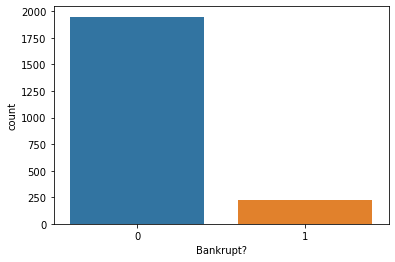

0    1949
1     220
Name: Bankrupt?, dtype: int64


In [34]:
# Checking the balance/compostion of data w.r.t Target labels after manual undersampling: 
sns.countplot(df['Bankrupt?'])
plt.show()
print(df['Bankrupt?'].value_counts())

In [35]:
# Counting missing values for only +ve target label (Bankrupt? = 1, ei Minority label)
pos = datanum[datanum['Target']==1]
d1={}
for i in num:
    count=0
    for j in pos[i]:
        if j == 0:
            count = count +1       
    miss1 = {i:count}
    d1.update(miss1)   
d1

{' ROA(C) before interest and depreciation before interest': 0,
 ' ROA(A) before interest and % after tax': 1,
 ' ROA(B) before interest and depreciation after tax': 0,
 ' Operating Gross Margin': 0,
 ' Realized Sales Gross Margin': 0,
 ' Operating Profit Rate': 0,
 ' Pre-tax net Interest Rate': 0,
 ' After-tax net Interest Rate': 0,
 ' Non-industry income and expenditure/revenue': 0,
 ' Continuous interest rate (after tax)': 0,
 ' Operating Expense Rate': 0,
 ' Research and development expense rate': 79,
 ' Cash flow rate': 0,
 ' Interest-bearing debt interest rate': 4,
 ' Tax rate (A)': 194,
 ' Net Value Per Share (B)': 0,
 ' Net Value Per Share (A)': 0,
 ' Net Value Per Share (C)': 0,
 ' Persistent EPS in the Last Four Seasons': 1,
 ' Cash Flow Per Share': 0,
 ' Revenue Per Share (Yuan ¥)': 0,
 ' Operating Profit Per Share (Yuan ¥)': 1,
 ' Per Share Net profit before tax (Yuan ¥)': 1,
 ' Realized Sales Gross Profit Growth Rate': 0,
 ' Operating Profit Growth Rate': 0,
 ' After-tax N

In [36]:
# Features with missing values and the number of missing values per feature for the minority label:
feat_miss = {i:j for (i,j) in d1.items() if j!=0}
feat_miss

{' ROA(A) before interest and % after tax': 1,
 ' Research and development expense rate': 79,
 ' Interest-bearing debt interest rate': 4,
 ' Tax rate (A)': 194,
 ' Persistent EPS in the Last Four Seasons': 1,
 ' Operating Profit Per Share (Yuan ¥)': 1,
 ' Per Share Net profit before tax (Yuan ¥)': 1,
 ' Net Value Growth Rate': 1,
 ' Quick Ratio': 1,
 ' Borrowing dependency': 1,
 ' Contingent liabilities/Net worth': 1,
 ' Operating profit/Paid-in capital': 1,
 ' Net profit before tax/Paid-in capital': 1,
 ' Inventory and accounts receivable/Net value': 1,
 ' Total Asset Turnover': 1,
 ' Allocation rate per person': 1,
 ' Inventory/Current Liability': 6,
 ' Working Capital/Equity': 1,
 ' Current Liabilities/Equity': 1,
 ' Long-term Liability to Current Assets': 39,
 ' Quick Asset Turnover Rate': 1,
 ' Fixed Assets to Assets': 1,
 ' Current Liability to Equity': 1,
 ' Equity to Long-term Liability': 1,
 ' Cash Flow to Equity': 1,
 " Net Income to Stockholder's Equity": 1,
 ' Liability to 

Transforming the Numeric Data

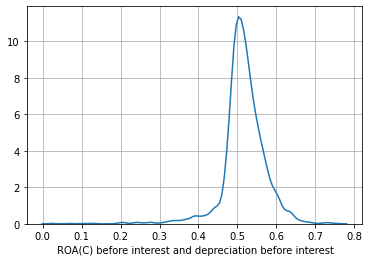

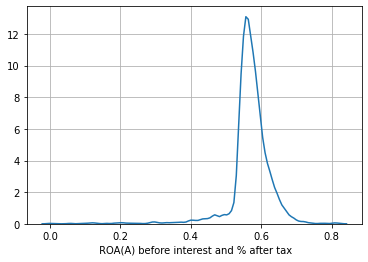

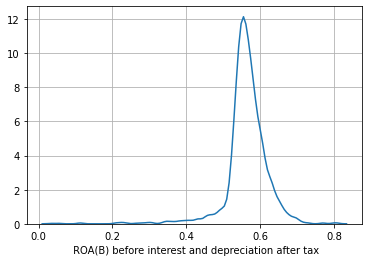

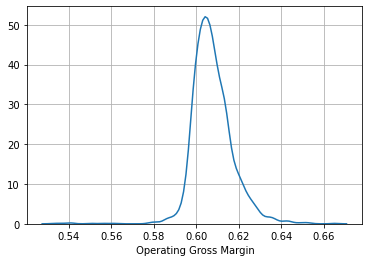

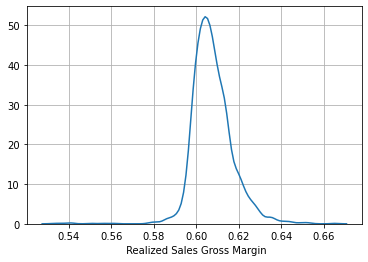

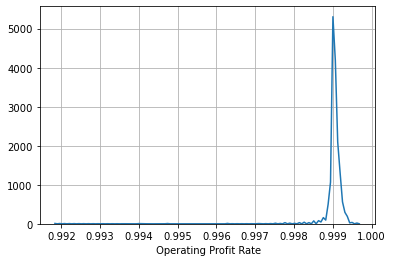

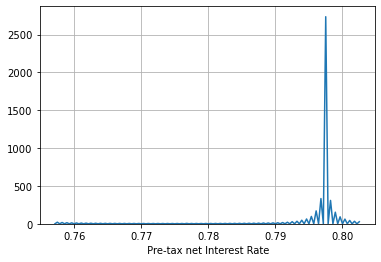

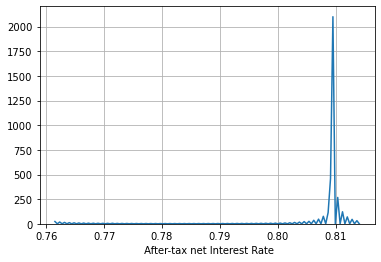

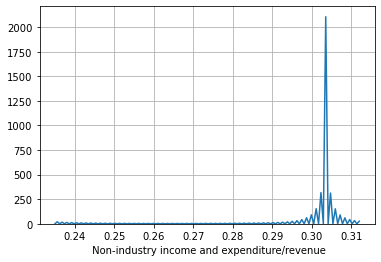

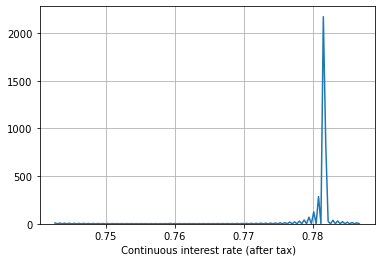

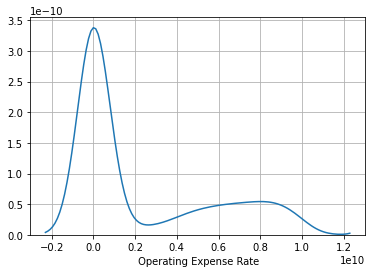

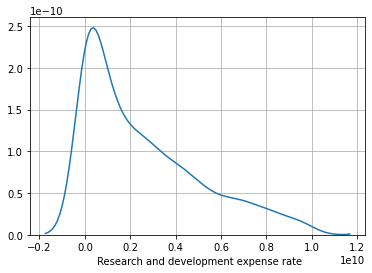

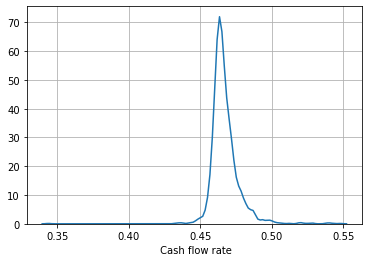

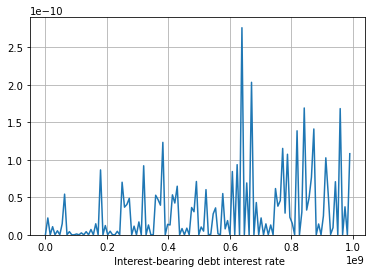

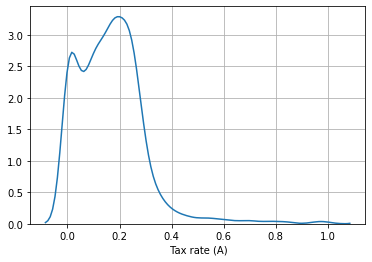

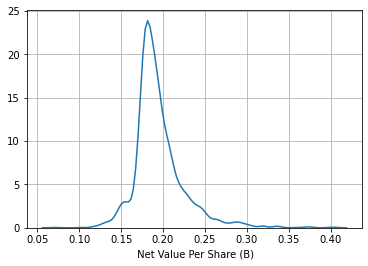

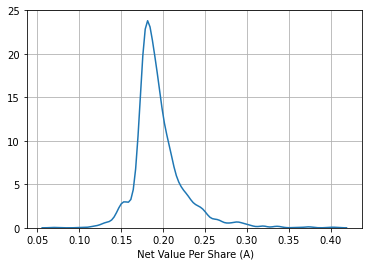

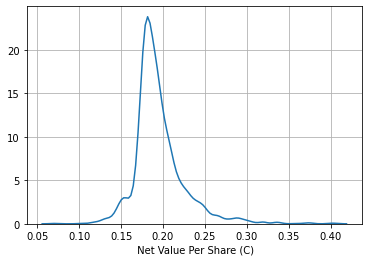

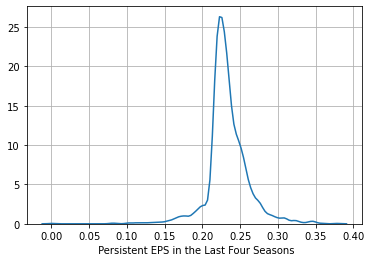

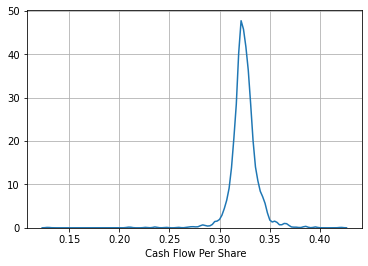

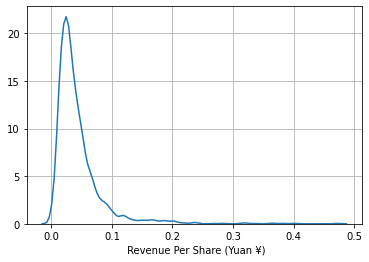

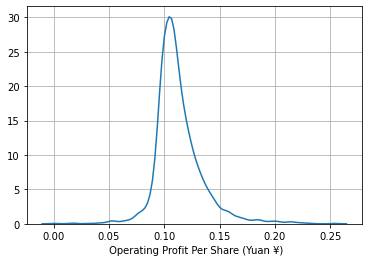

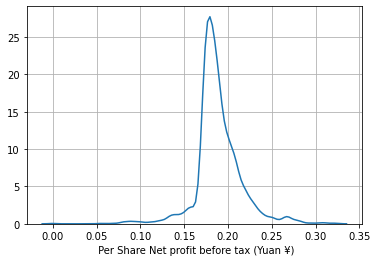

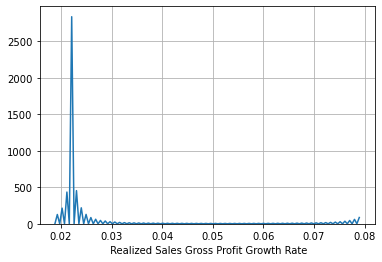

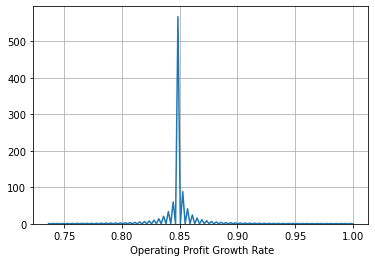

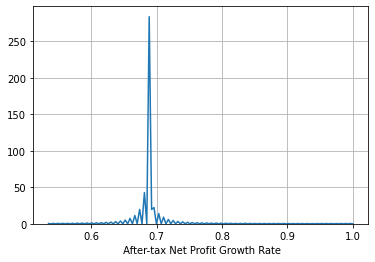

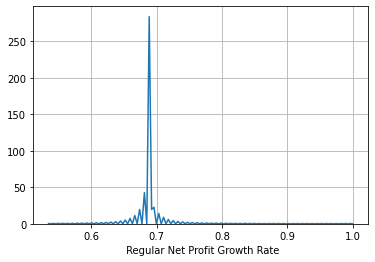

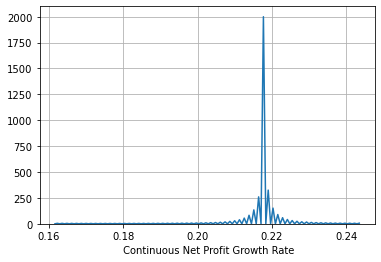

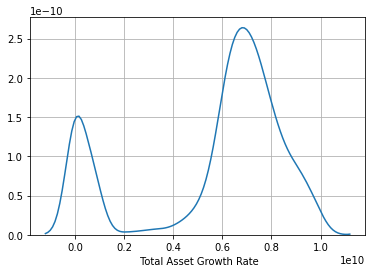

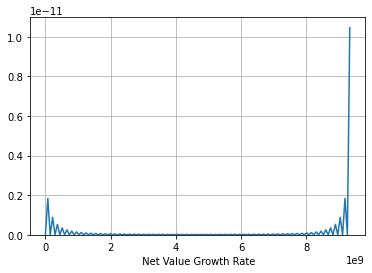

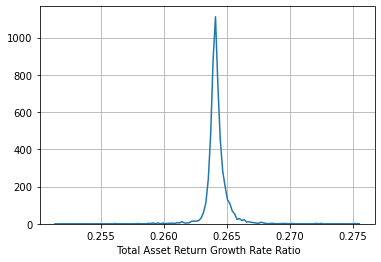

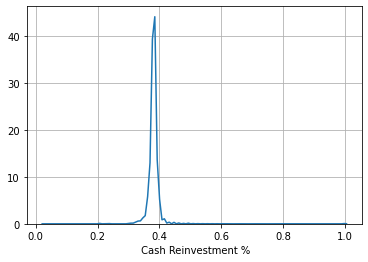

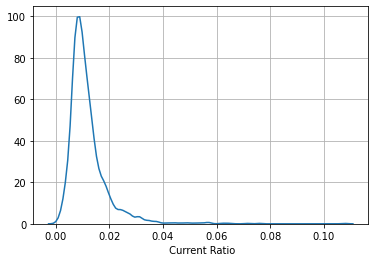

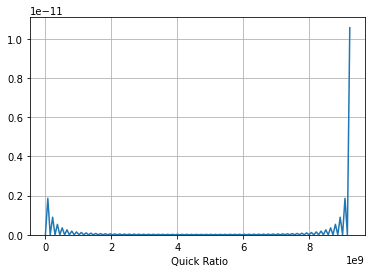

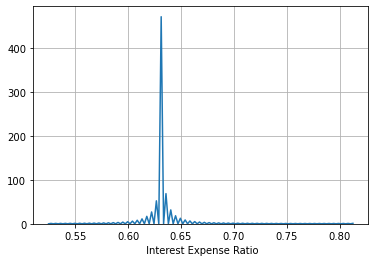

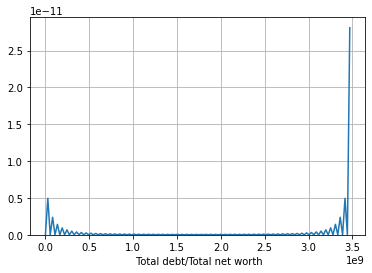

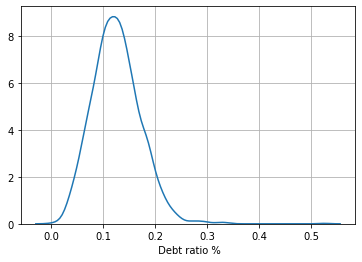

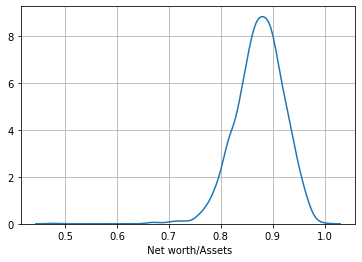

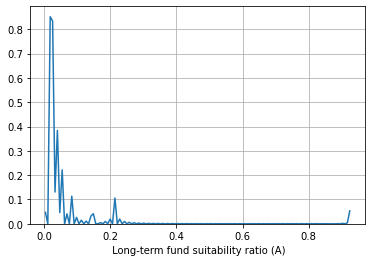

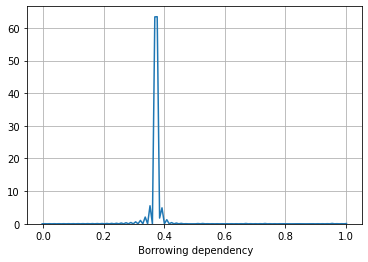

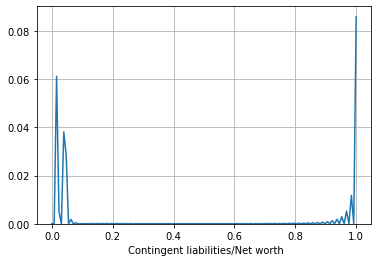

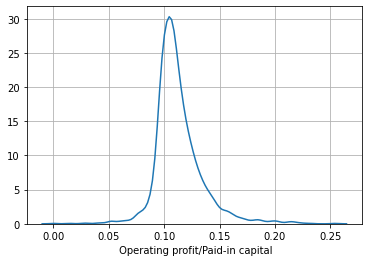

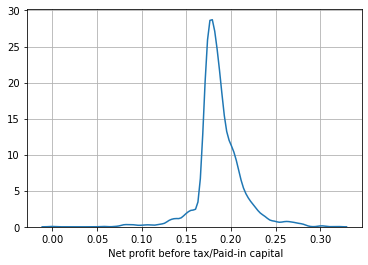

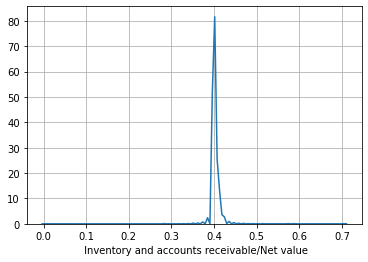

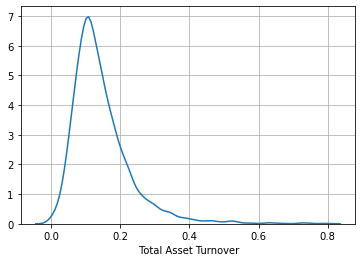

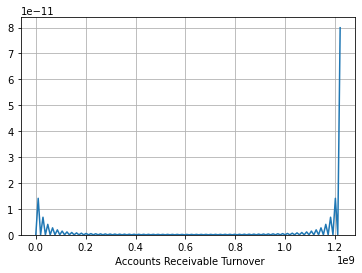

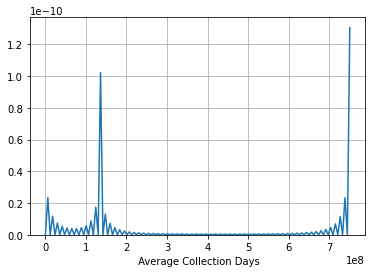

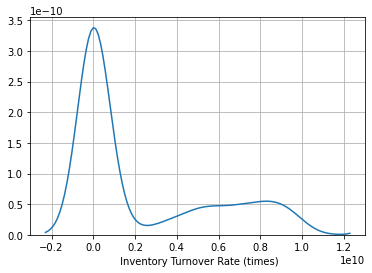

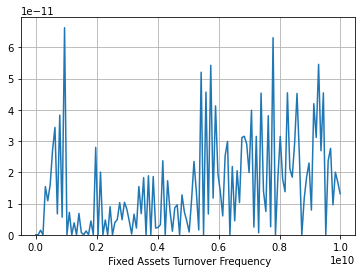

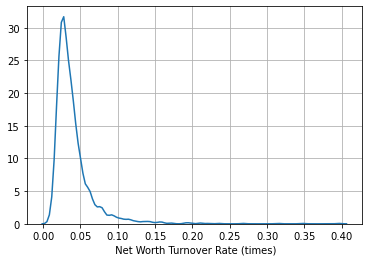

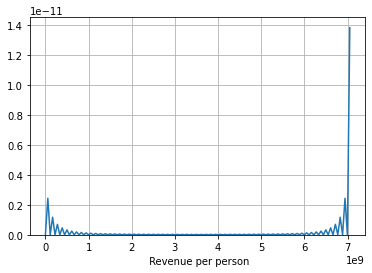

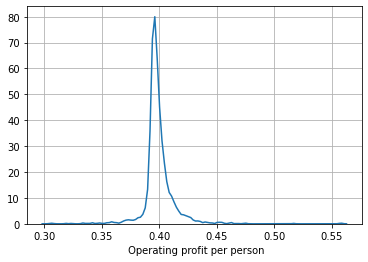

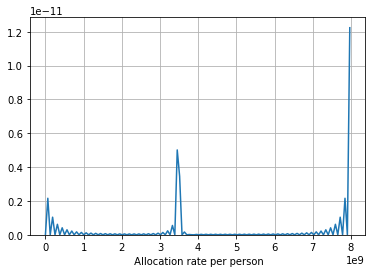

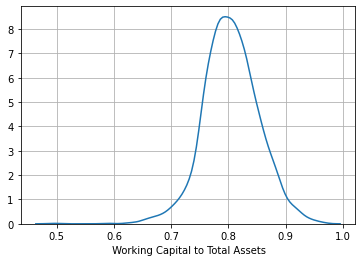

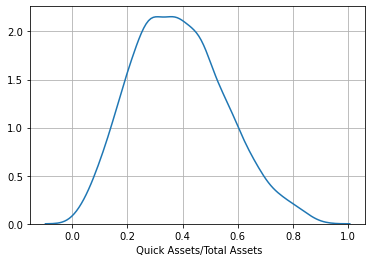

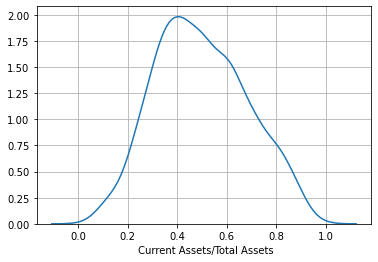

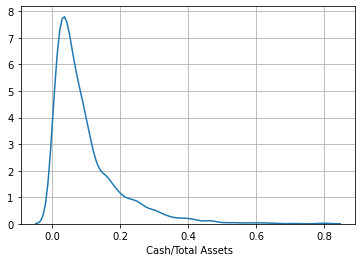

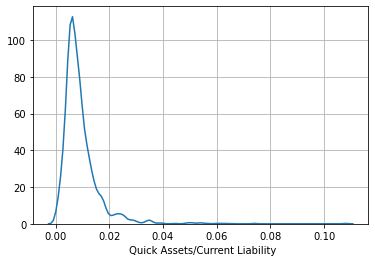

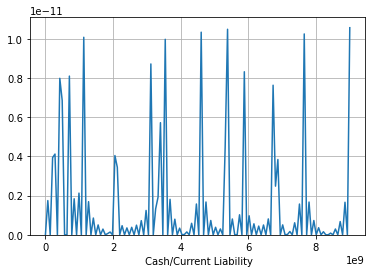

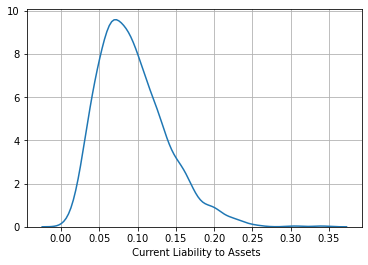

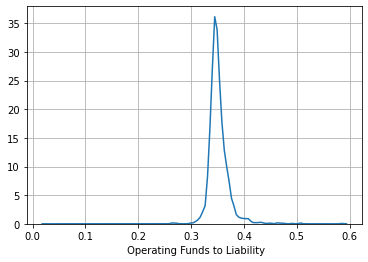

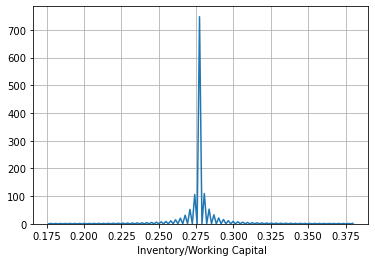

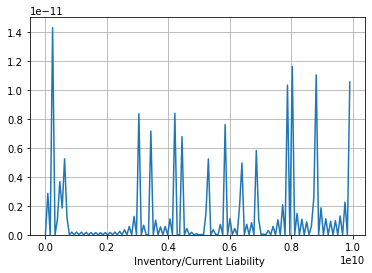

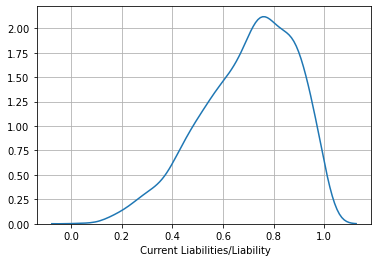

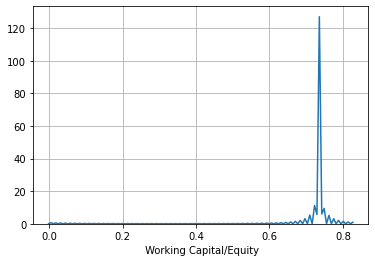

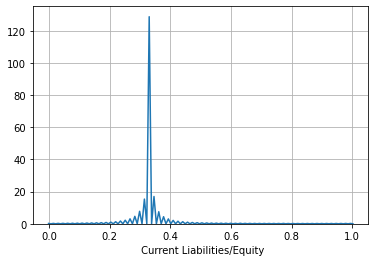

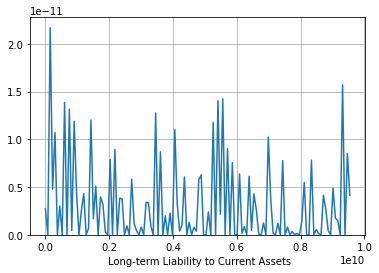

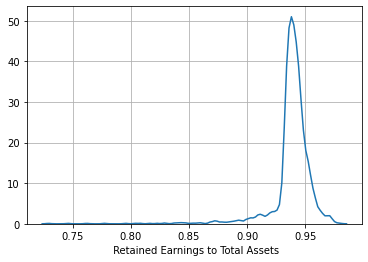

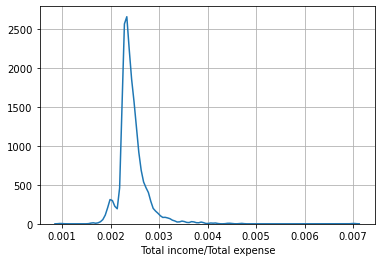

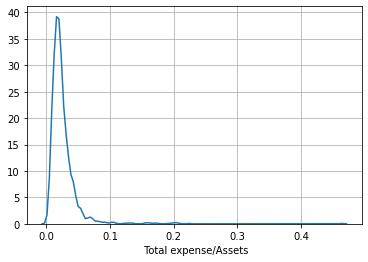

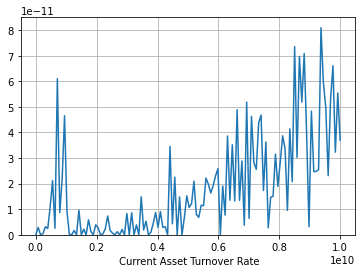

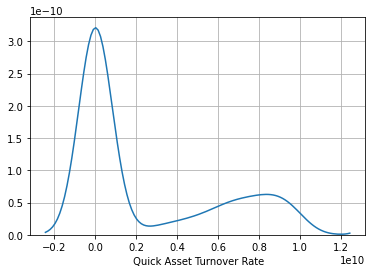

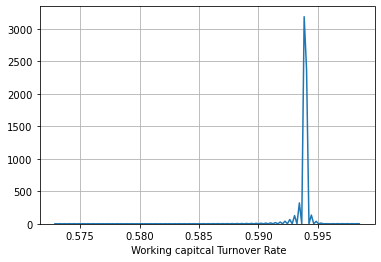

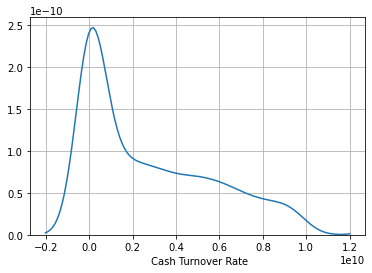

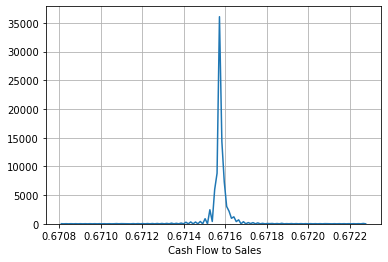

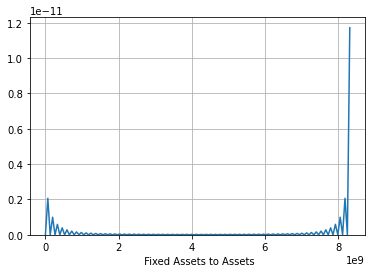

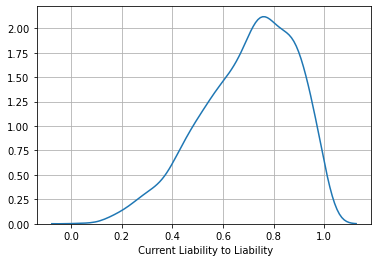

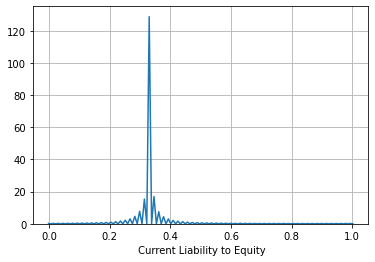

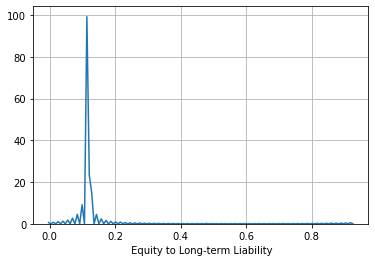

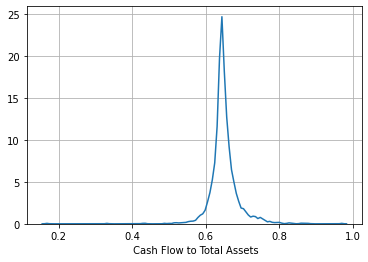

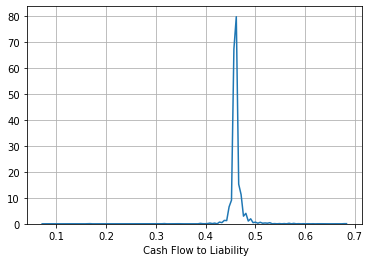

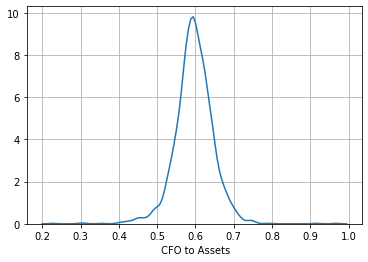

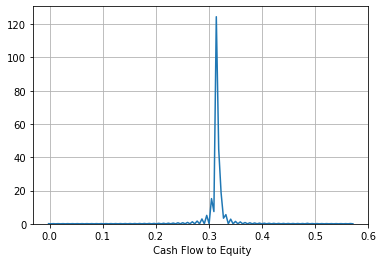

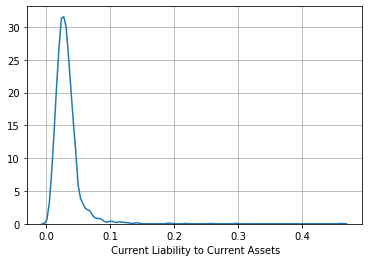

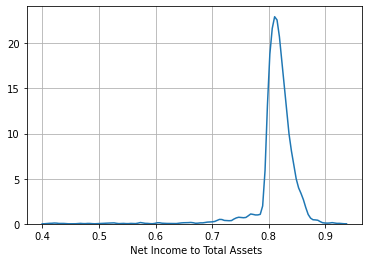

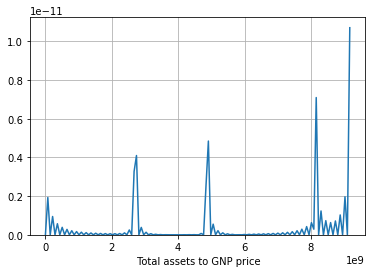

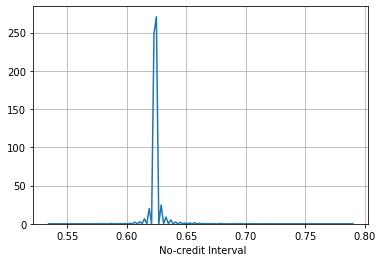

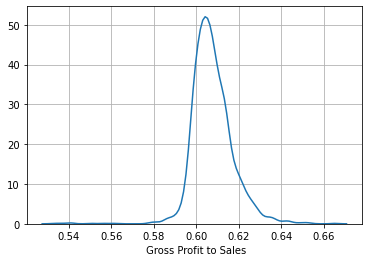

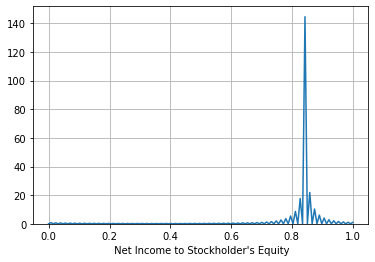

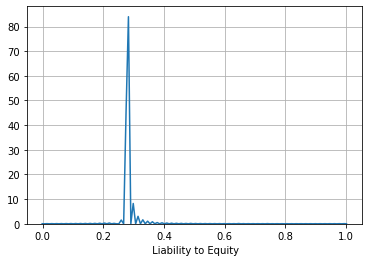

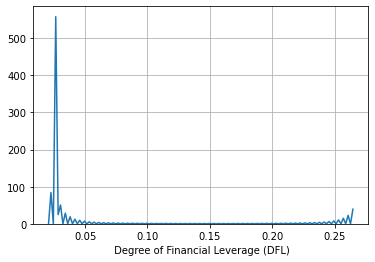

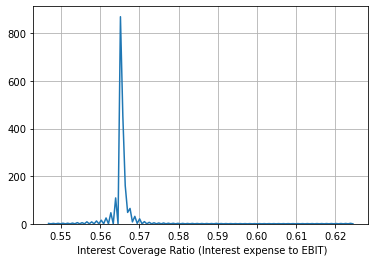

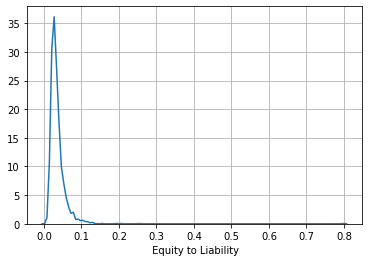

In [37]:
# Univariate Analysis of numeric features to check the distribution:
for i in num:
    sns.distplot(num[i],hist=False)
    plt.grid()
    plt.show()

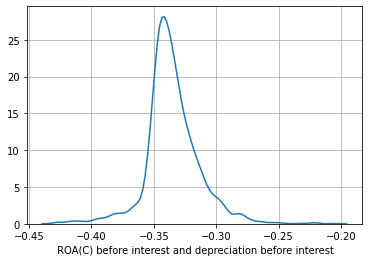

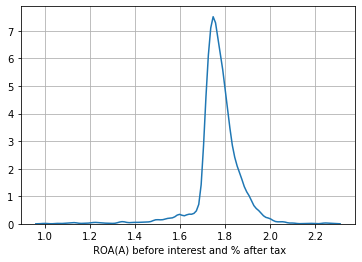

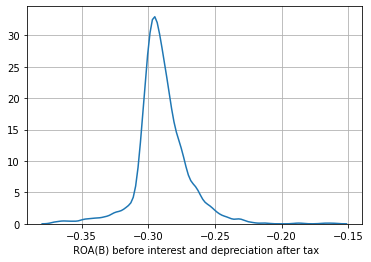

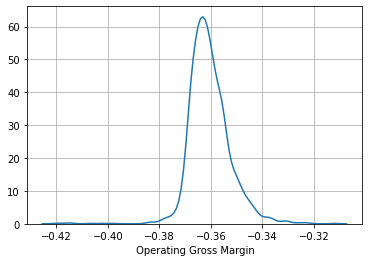

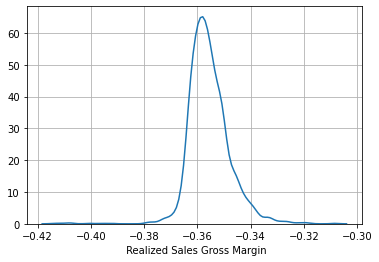

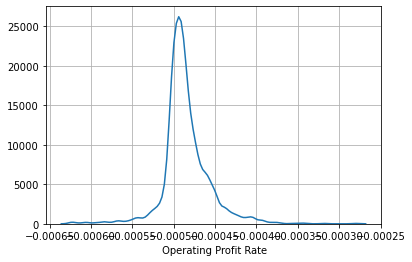

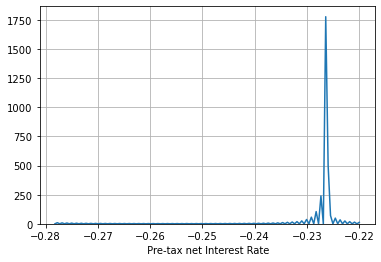

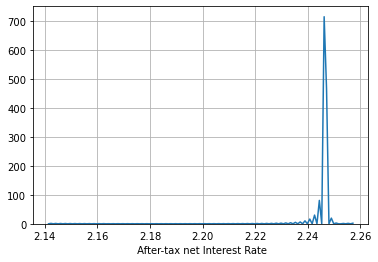

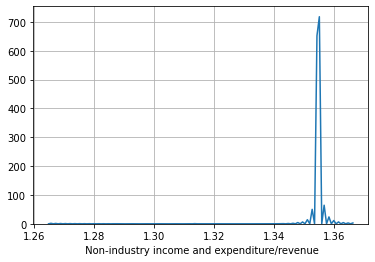

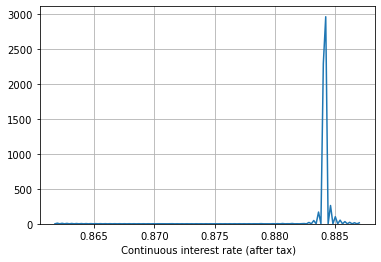

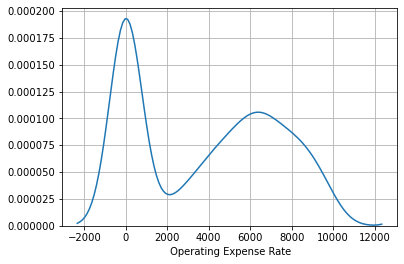

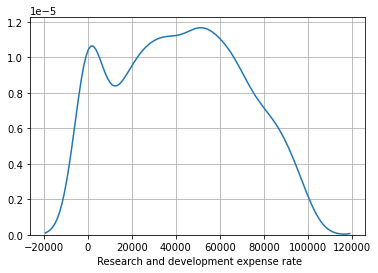

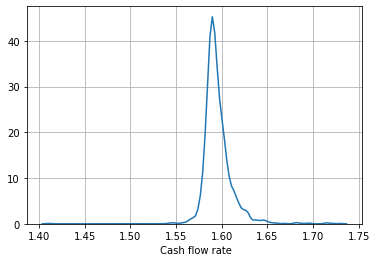

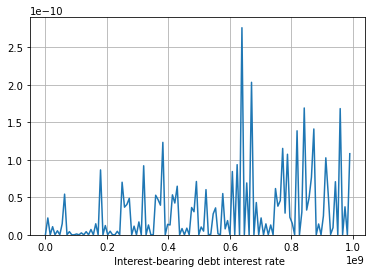

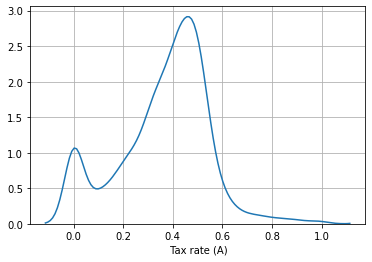

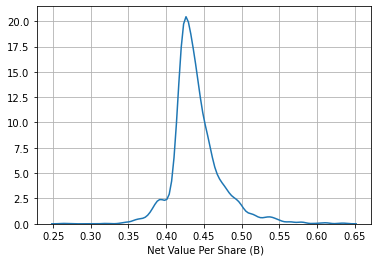

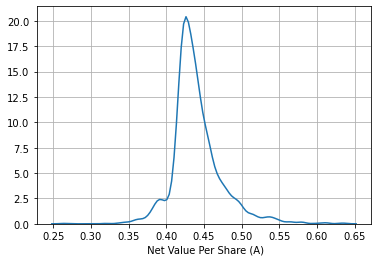

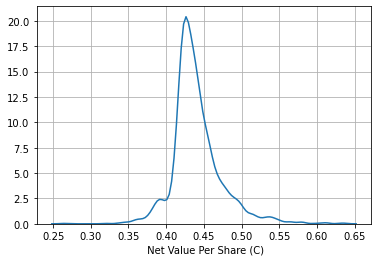

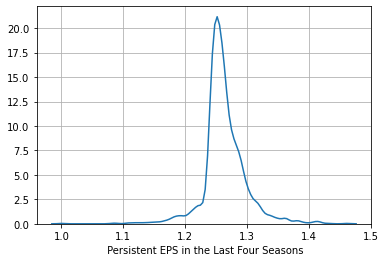

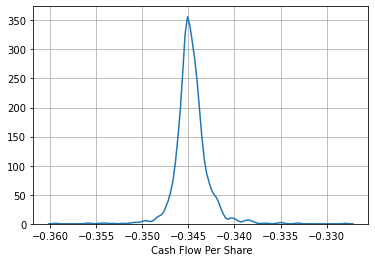

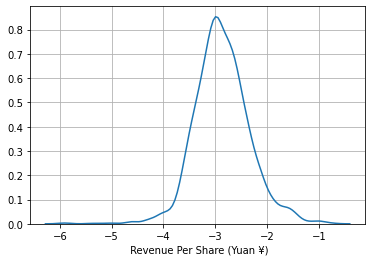

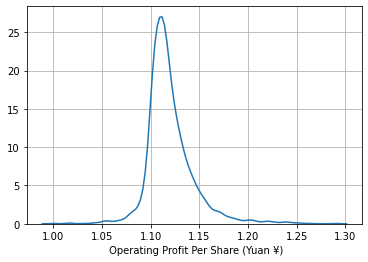

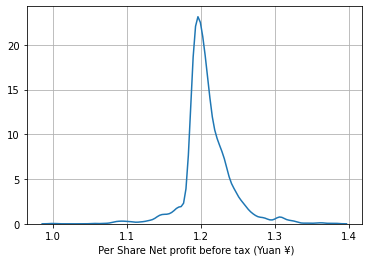

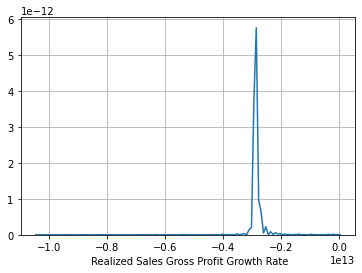

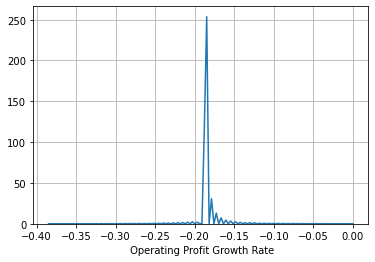

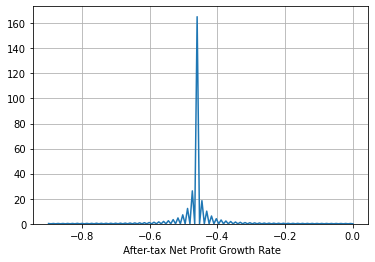

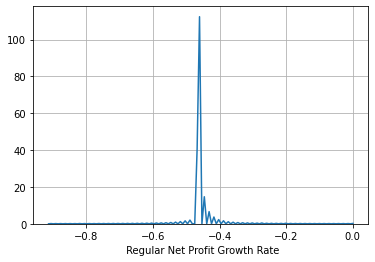

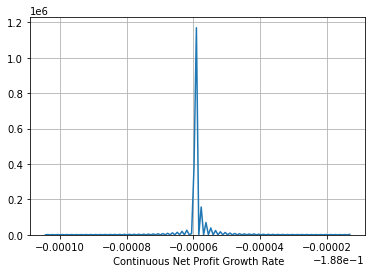

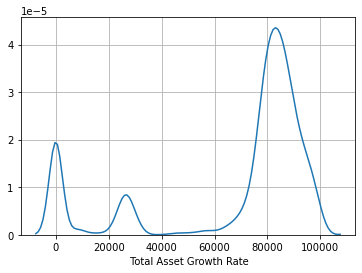

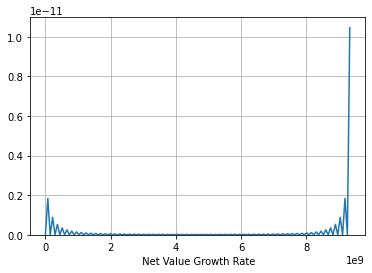

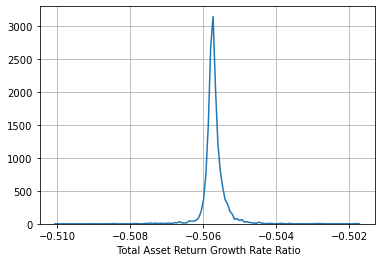

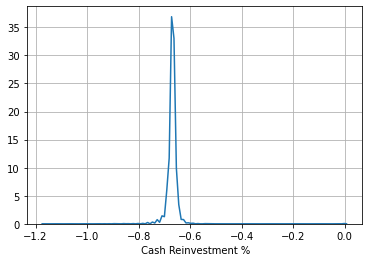

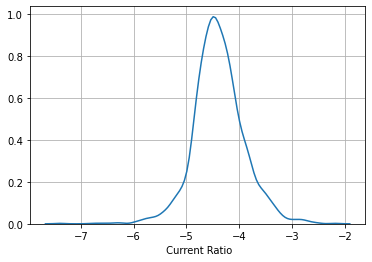

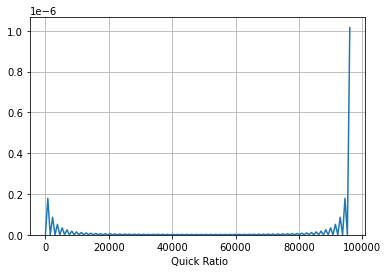

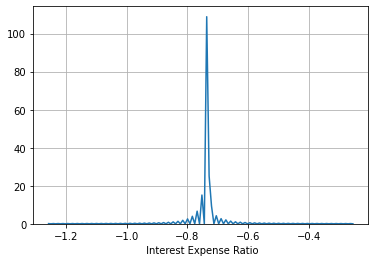

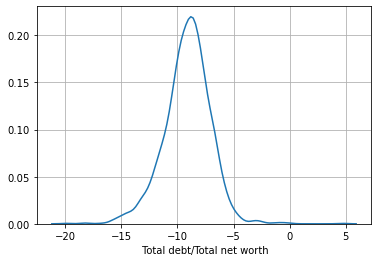

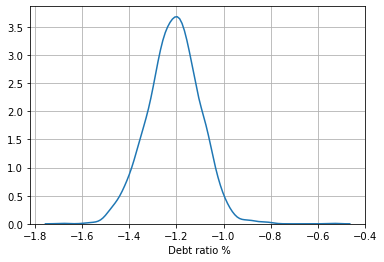

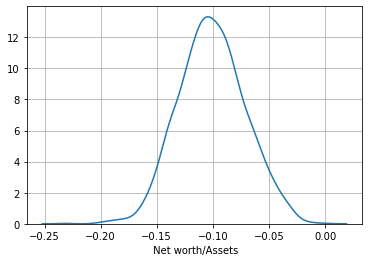

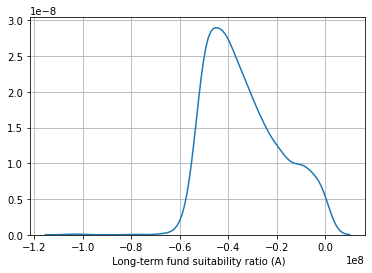

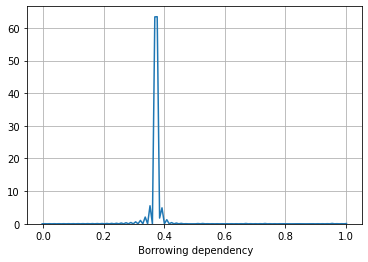

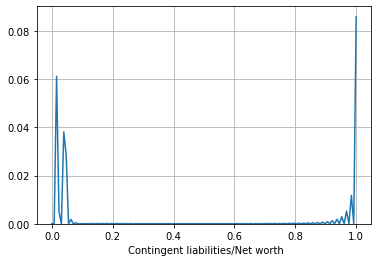

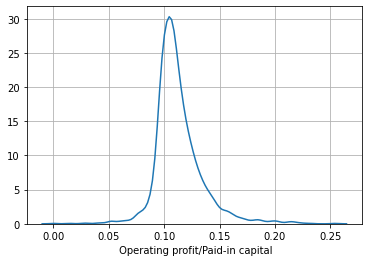

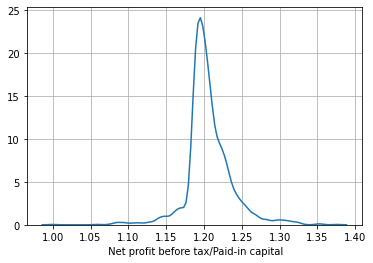

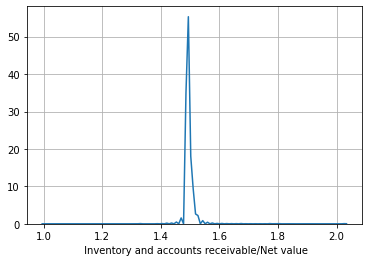

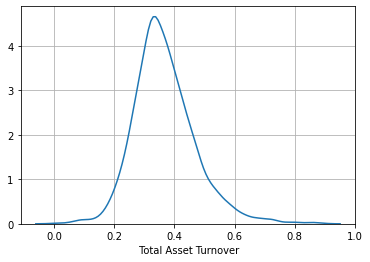

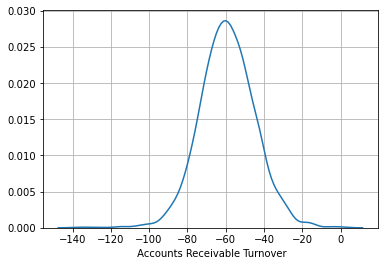

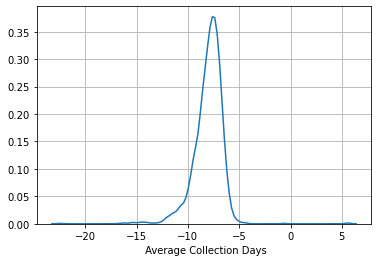

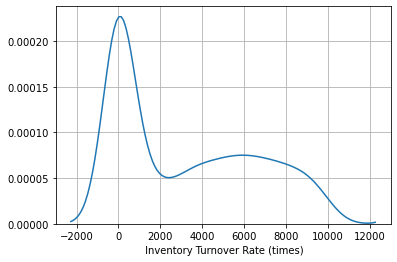

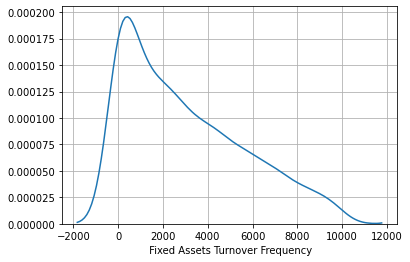

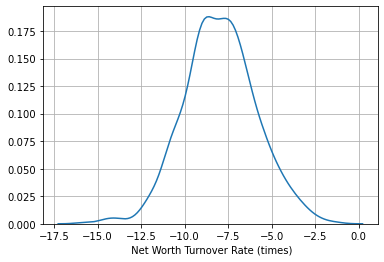

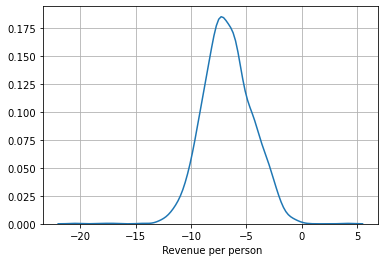

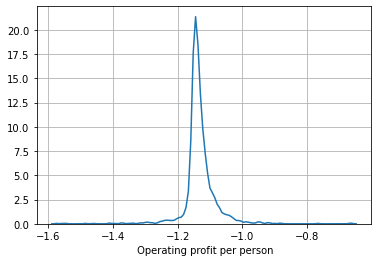

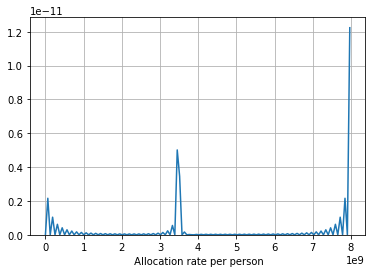

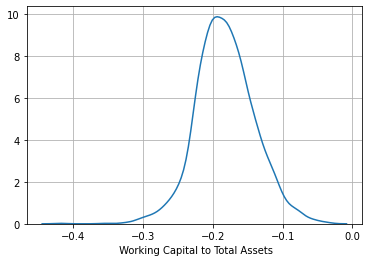

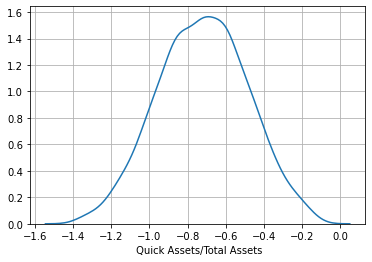

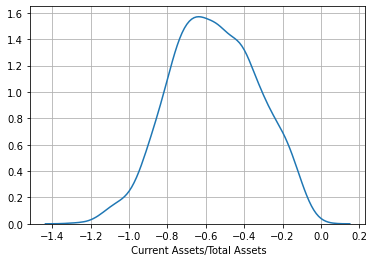

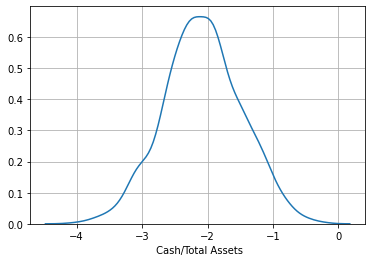

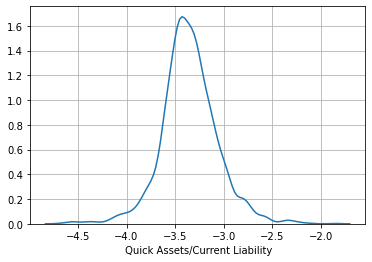

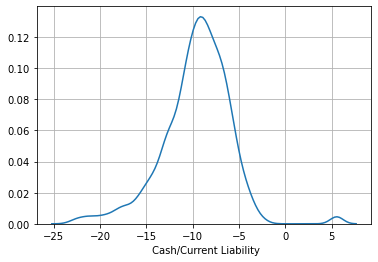

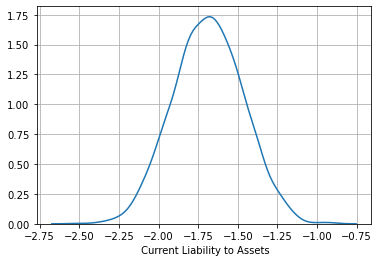

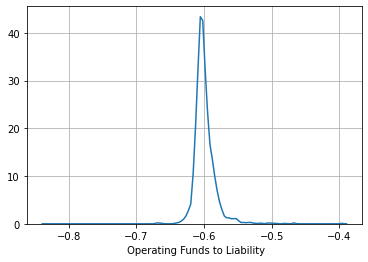

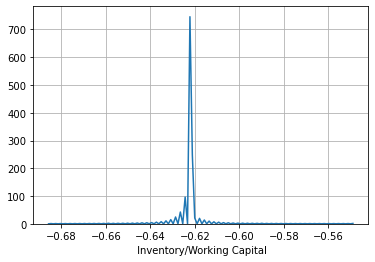

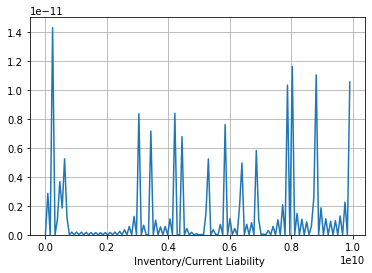

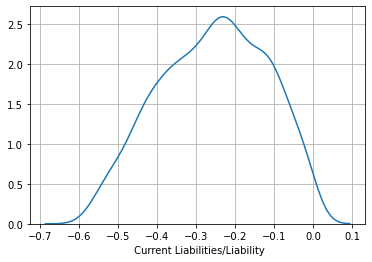

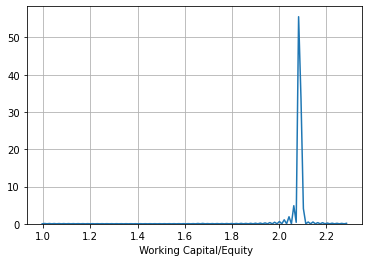

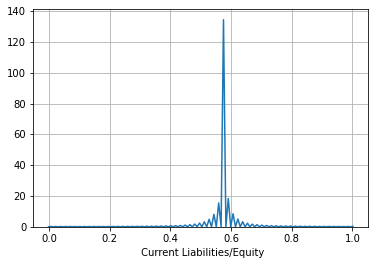

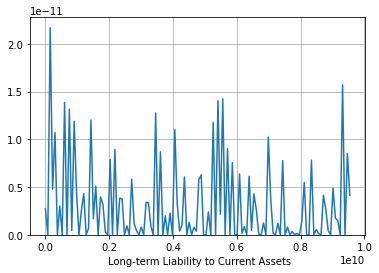

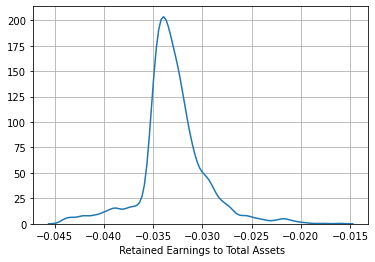

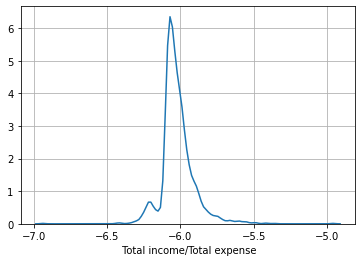

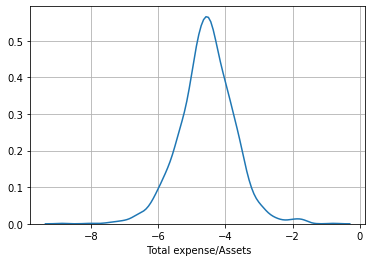

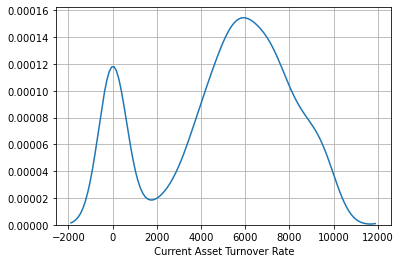

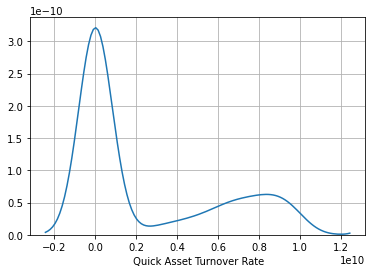

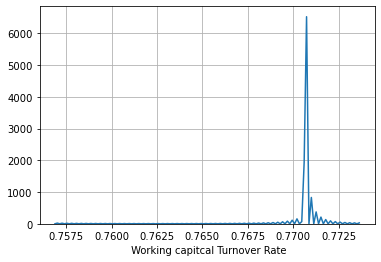

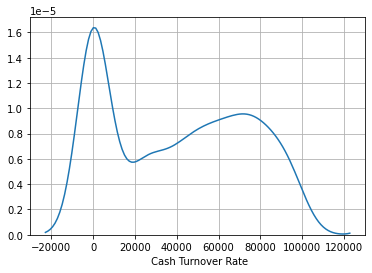

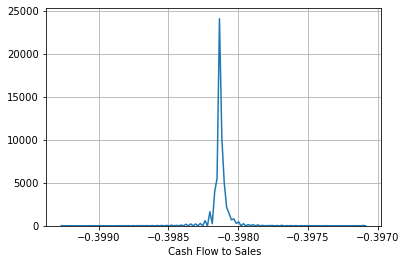

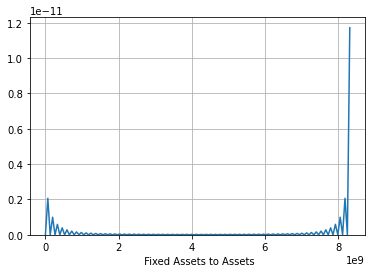

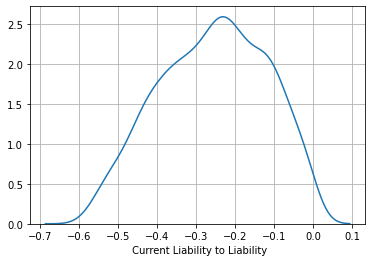

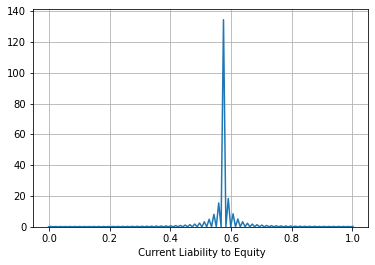

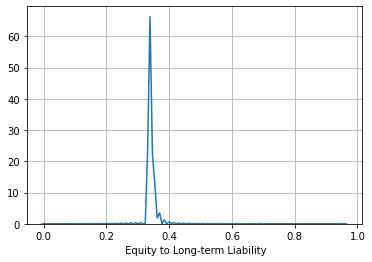

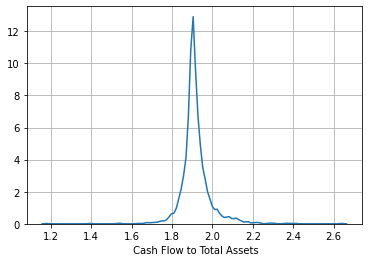

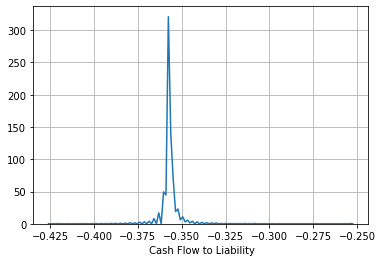

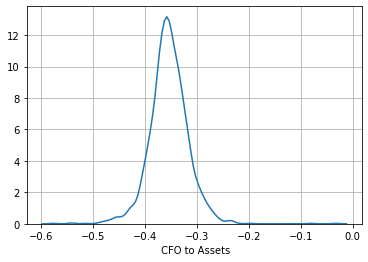

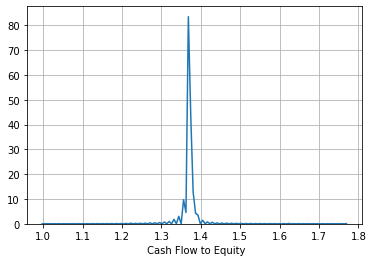

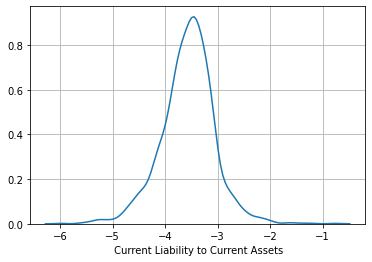

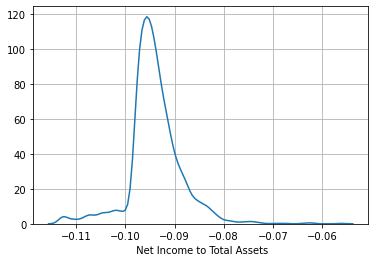

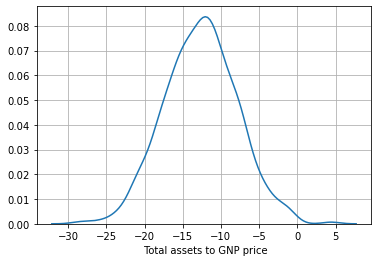

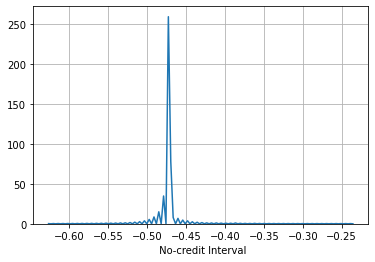

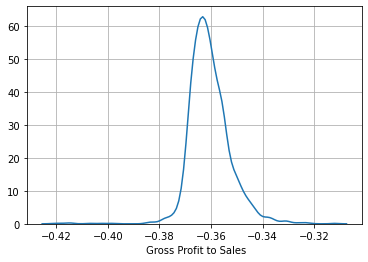

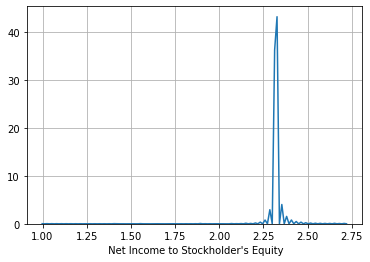

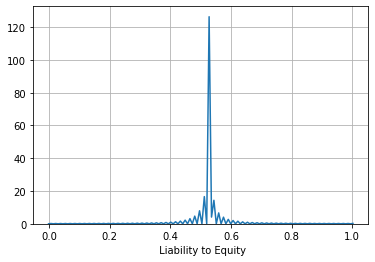

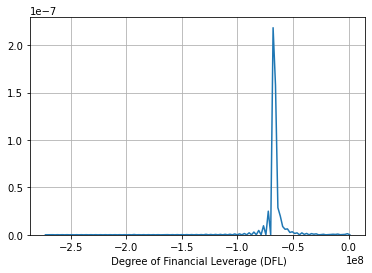

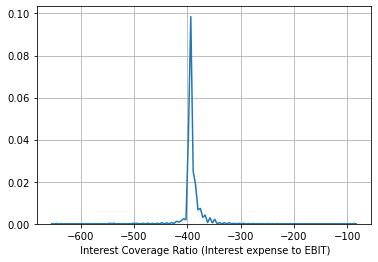

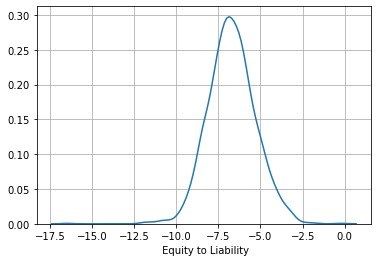

In [38]:
# Applying log Transform to the features below:
log_transform = [' Pre-tax net Interest Rate',' Total income/Total expense',' Cash Flow to Sales',
                 ' Current Liability to Current Assets',' No-credit Interval']
for i in log_transform:
    num[i] = np.log(num[i])
    
# Applying Square Root Transform to the features below:
sqrt_transform = [' Total Asset Turnover',' Liability to Equity',' Equity to Long-term Liability',' Continuous interest rate (after tax)',
                  ' Research and development expense rate',' Tax rate (A)',' Net Value Per Share (B)',' Net Value Per Share (A)',
                  ' Net Value Per Share (C)',' Total Asset Growth Rate',' Working capitcal Turnover Rate',' Cash Turnover Rate',
                  ' Current Liabilities/Equity',' Current Liability to Equity',' Quick Ratio']
for i in sqrt_transform:
    num[i] = np.sqrt(num[i])

# Applying Exponential Transform to the features below:
exp_transform = [' Operating Profit Per Share (Yuan ¥)',' Persistent EPS in the Last Four Seasons',' ROA(A) before interest and % after tax',' Cash Flow to Equity',
                 ' Inventory and accounts receivable/Net value',' After-tax net Interest Rate',' Non-industry income and expenditure/revenue', ' Cash flow rate',
                 ' Cash Flow to Total Assets',' Per Share Net profit before tax (Yuan ¥)',' Net profit before tax/Paid-in capital',' Working Capital/Equity',
                 " Net Income to Stockholder's Equity"]
for i in exp_transform:
    num[i] = np.exp(num[i])

# Applying Reciprocal Transform to the features below:
rec_transform = [' Operating Expense Rate',' Inventory Turnover Rate (times)',' Fixed Assets Turnover Frequency',' Current Asset Turnover Rate']                 
for i in rec_transform:
    num[i] = 1/num[i]

# Applying Boxcox Transform to the remaining features:
from scipy.stats import boxcox
boxcox_transform = [' ROA(C) before interest and depreciation before interest',' ROA(B) before interest and depreciation after tax',
          ' Operating Gross Margin',' Realized Sales Gross Margin',' Operating Profit Rate',' Cash Flow Per Share',' Revenue Per Share (Yuan ¥)',
          ' Realized Sales Gross Profit Growth Rate',' Operating Profit Growth Rate',' After-tax Net Profit Growth Rate',
          ' Regular Net Profit Growth Rate',' Continuous Net Profit Growth Rate',' Total Asset Return Growth Rate Ratio',
          ' Cash Reinvestment %',' Current Ratio',' Interest Expense Ratio',' Total debt/Total net worth',' Debt ratio %',
          ' Net worth/Assets',' Long-term fund suitability ratio (A)',' Accounts Receivable Turnover',' Average Collection Days',
          ' Net Worth Turnover Rate (times)',' Revenue per person',' Operating profit per person',' Working Capital to Total Assets',
          ' Quick Assets/Total Assets',' Current Assets/Total Assets',' Cash/Total Assets',' Quick Assets/Current Liability',' Cash/Current Liability',
          ' Current Liability to Assets',' Operating Funds to Liability',' Inventory/Working Capital',' Current Liabilities/Liability',
          ' Retained Earnings to Total Assets',' Total expense/Assets',' Current Liability to Liability',
          ' Cash Flow to Liability',' CFO to Assets',' Net Income to Total Assets',' Total assets to GNP price',' Gross Profit to Sales',
          ' Degree of Financial Leverage (DFL)',' Interest Coverage Ratio (Interest expense to EBIT)',' Equity to Liability']
for i in boxcox_transform:
    num[i] = boxcox(num[i])[0]
    
# Checking the distribution of numeric data after transformation:
for i in num:
    sns.distplot(num[i],hist=False)
    plt.grid()
    plt.show()

In [39]:
# Numeric Data after transformation:
num.head()

ROA(C) before interest and depreciation before interest  \
0                                          -0.327021          
1                                          -0.323122          
2                                          -0.335795          
3                                          -0.340033          
4                                          -0.309937          

    ROA(A) before interest and % after tax  \
0                                 1.815436   
1                                 1.819300   
2                                 1.805665   
3                                 1.729930   
4                                 1.792425   

    ROA(B) before interest and depreciation after tax  \
0                                          -0.286653    
1                                          -0.277577    
2                                          -0.287929    
3                                          -0.291885    
4                                          -0.272585    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                -0.362565                     -0.357563   
1                -0.354791                     -0.350026   
2                -0.356176                     -0.351427   
3                -0.361449                     -0.356482   
4                -0.350406                     -0.345772   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0               -0.000486                   -0.226249   
1               -0.000467                   -0.226042   
2               -0.000494                   -0.225913   
3               -0.000495                   -0.226336   
4               -0.000437                   -0.225995   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      2.246570                                      1.354680   
1                      2.246905                                      1.354846   
2                      2.247203                                      1.355414   
3                      2.246466                                      1.354631   
4                      2.246912                                      1.354622   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                               0.884119             1.050420e-10   
1                               0.884230             6.005409e+03   
2                               0.884289             3.948762e+03   
3                               0.884092             6.349331e+03   
4                               0.884222             7.146933e+03   

    Research and development expense rate   Cash flow rate  \
0                            50000.000000         1.572378   
1                                0.010554         1.584345   
2                            83845.095265         1.602804   
3                            24718.414189         1.600195   
4                                0.011307         1.610804   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                              0.000301       0.509848   
1                              0.000239       0.373074   
2                              0.000726       0.102603   
3                              0.000243       0.391606   
4                              0.000407       0.476495   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                  0.502155                  0.502155   
1                  0.477729                  0.477729   
2                  0.452497                  0.452497   
3                  0.429860                  0.429860   
4                  0.515815                  0.515815   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                  0.502155                                  1.290811   
1                  0.477729                                  1.300488   
2                  0.452497                                  1.265675   
3                  0.429860               

###### Categoric Variables: (Removing insignificant categoric columns and encoding the rest)

In [40]:
# Categoric Data:
categ = df.drop(num.columns,axis=1)
categ.head()

Bankrupt?   Liability-Assets Flag   Net Income Flag
0          0                       0                 1
1          0                       0                 1
2          0                       0                 1
3          0                       0                 1
4          0                       0                 1

In [41]:
categ.shape

(2169, 3)

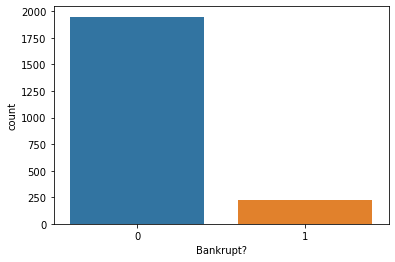

0    1949
1     220
Name: Bankrupt?, dtype: int64


In [42]:
# Analysing Target labels post manual majority undersampling:
sns.countplot(categ['Bankrupt?'])
plt.show()
print(categ['Bankrupt?'].value_counts())

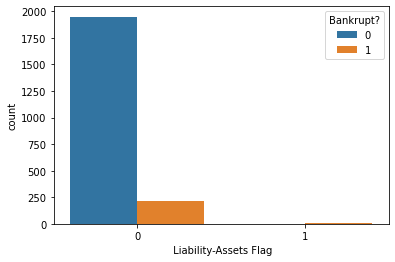

Bankrupt?                  0    1
 Liability-Assets Flag           
0                       1949  214
1                          0    6 




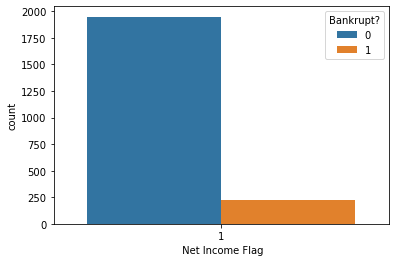

Bankrupt?            0    1
 Net Income Flag           
1                 1949  220 




In [43]:
# Visualizing influence of categoric variables on the Target post manual majority undersampling:
for i in categ:
    if i!='Bankrupt?':
        sns.countplot(categ[i],hue=categ['Bankrupt?'])
        plt.show()
        print(pd.crosstab(categ[i],categ['Bankrupt?']),'\n')
        print()

In [44]:
# Performing Chi-squared test to check the significance of categoric variables on the Target and removing features that are not significant:
from scipy import stats
for i in categ:
    if i != 'Bankrupt?':
        cr = pd.crosstab(categ[i],categ['Bankrupt?'])
        xi,p,dof,ex = stats.chi2_contingency(cr)
        if p<0.05:
            print('P-value =',p,'which is less than level of significance of 0.05 at 95% confidence therefore,',i,'is significantly effecting the Target and we keep',i)
            print()
        else:
            print('P-value =',p,'which is greater than level of significance of 0.05 at 95% confidence therefore,',i,'is not significantly effecting the Target variable so we remove',i)
            categ.drop(i,axis=1,inplace=True)
categ.head()

P-value = 3.5021274558021345e-11 which is less than level of significance of 0.05 at 95% confidence therefore,  Liability-Assets Flag is significantly effecting the Target and we keep  Liability-Assets Flag

P-value = 1.0 which is greater than level of significance of 0.05 at 95% confidence therefore,  Net Income Flag is not significantly effecting the Target variable so we remove  Net Income Flag


Bankrupt?   Liability-Assets Flag
0          0                       0
1          0                       0
2          0                       0
3          0                       0
4          0                       0

In [45]:
# Encoding Categoric Columns:
categ[categ.columns] = pd.get_dummies(categ,columns=categ.columns,drop_first=True)
categ.dtypes

Bankrupt?                 uint8
 Liability-Assets Flag    uint8
dtype: object

### Data Prerocessing 2: Train-Test Split, Imputation,Scaling and Imbalance Handling

Deciding on Target and Feature Matrix:

In [46]:
# Final Dataset after preprocessing that is considered for modeling:''
dataset = pd.concat([num,categ],axis=1)
dataset.head()

ROA(C) before interest and depreciation before interest  \
0                                          -0.327021          
1                                          -0.323122          
2                                          -0.335795          
3                                          -0.340033          
4                                          -0.309937          

    ROA(A) before interest and % after tax  \
0                                 1.815436   
1                                 1.819300   
2                                 1.805665   
3                                 1.729930   
4                                 1.792425   

    ROA(B) before interest and depreciation after tax  \
0                                          -0.286653    
1                                          -0.277577    
2                                          -0.287929    
3                                          -0.291885    
4                                          -0.272585    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                -0.362565                     -0.357563   
1                -0.354791                     -0.350026   
2                -0.356176                     -0.351427   
3                -0.361449                     -0.356482   
4                -0.350406                     -0.345772   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0               -0.000486                   -0.226249   
1               -0.000467                   -0.226042   
2               -0.000494                   -0.225913   
3               -0.000495                   -0.226336   
4               -0.000437                   -0.225995   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      2.246570                                      1.354680   
1                      2.246905                                      1.354846   
2                      2.247203                                      1.355414   
3                      2.246466                                      1.354631   
4                      2.246912                                      1.354622   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                               0.884119             1.050420e-10   
1                               0.884230             6.005409e+03   
2                               0.884289             3.948762e+03   
3                               0.884092             6.349331e+03   
4                               0.884222             7.146933e+03   

    Research and development expense rate   Cash flow rate  \
0                            50000.000000         1.572378   
1                                0.010554         1.584345   
2                            83845.095265         1.602804   
3                            24718.414189         1.600195   
4                                0.011307         1.610804   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                              0.000301       0.509848   
1                              0.000239       0.373074   
2                              0.000726       0.102603   
3                              0.000243       0.391606   
4                              0.000407       0.476495   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                  0.502155                  0.502155   
1                  0.477729                  0.477729   
2                  0.452497                  0.452497   
3                  0.429860                  0.429860   
4                  0.515815                  0.515815   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                  0.502155                                  1.290811   
1                  0.477729                                  1.300488   
2                  0.452497                                  1.265675   
3                  0.429860               

In [47]:
dataset.shape

(2169, 95)

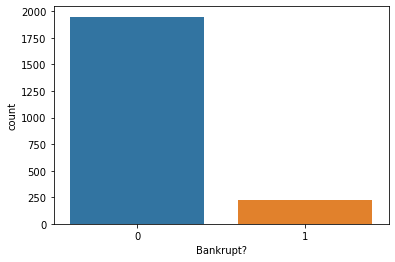

0    1949
1     220
Name: Bankrupt?, dtype: int64


In [48]:
# Target Varibale (Dependent Feature):
y = dataset['Bankrupt?']
# Showing the Imbalance of Target in the Dataset:
sns.countplot(y)
plt.show()
print(y.value_counts())

In [49]:
# Feature Matrix (Independent Features):
x = dataset.drop('Bankrupt?',axis=1)
x.head()

ROA(C) before interest and depreciation before interest  \
0                                          -0.327021          
1                                          -0.323122          
2                                          -0.335795          
3                                          -0.340033          
4                                          -0.309937          

    ROA(A) before interest and % after tax  \
0                                 1.815436   
1                                 1.819300   
2                                 1.805665   
3                                 1.729930   
4                                 1.792425   

    ROA(B) before interest and depreciation after tax  \
0                                          -0.286653    
1                                          -0.277577    
2                                          -0.287929    
3                                          -0.291885    
4                                          -0.272585    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                -0.362565                     -0.357563   
1                -0.354791                     -0.350026   
2                -0.356176                     -0.351427   
3                -0.361449                     -0.356482   
4                -0.350406                     -0.345772   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0               -0.000486                   -0.226249   
1               -0.000467                   -0.226042   
2               -0.000494                   -0.225913   
3               -0.000495                   -0.226336   
4               -0.000437                   -0.225995   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      2.246570                                      1.354680   
1                      2.246905                                      1.354846   
2                      2.247203                                      1.355414   
3                      2.246466                                      1.354631   
4                      2.246912                                      1.354622   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                               0.884119             1.050420e-10   
1                               0.884230             6.005409e+03   
2                               0.884289             3.948762e+03   
3                               0.884092             6.349331e+03   
4                               0.884222             7.146933e+03   

    Research and development expense rate   Cash flow rate  \
0                            50000.000000         1.572378   
1                                0.010554         1.584345   
2                            83845.095265         1.602804   
3                            24718.414189         1.600195   
4                                0.011307         1.610804   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                              0.000301       0.509848   
1                              0.000239       0.373074   
2                              0.000726       0.102603   
3                              0.000243       0.391606   
4                              0.000407       0.476495   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                  0.502155                  0.502155   
1                  0.477729                  0.477729   
2                  0.452497                  0.452497   
3                  0.429860                  0.429860   
4                  0.515815                  0.515815   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                  0.502155                                  1.290811   
1                  0.477729                                  1.300488   
2                  0.452497                                  1.265675   
3                  0.429860               

In [50]:
x.shape

(2169, 94)

Train Test Split:

In [51]:
from sklearn.model_selection import train_test_split
xtr,xte,ytr,yte = train_test_split(x,y,test_size=0.3,random_state=10)
print('Shape of Feature Matrix:\n','Train:',xtr.shape,'Test:',xte.shape,'\n')
print('Proportions of Target:\n')
print('Train:\n',ytr.value_counts(),'\nTest:\n',yte.value_counts())

Shape of Feature Matrix:
 Train: (1518, 94) Test: (651, 94) 

Proportions of Target:

Train:
 0    1368
1     150
Name: Bankrupt?, dtype: int64 
Test:
 0    581
1     70
Name: Bankrupt?, dtype: int64


In [52]:
# Train set:
train = pd.concat([xtr,ytr],axis=1).reset_index().drop('index',axis=1)
print('Shape of Train:',train.shape)
train.head()

Shape of Train: (1518, 95)


ROA(C) before interest and depreciation before interest  \
0                                          -0.330101          
1                                          -0.345369          
2                                          -0.381562          
3                                          -0.352802          
4                                          -0.337113          

    ROA(A) before interest and % after tax  \
0                                 1.787059   
1                                 1.746513   
2                                 1.142203   
3                                 1.704004   
4                                 1.726162   

    ROA(B) before interest and depreciation after tax  \
0                                          -0.285831    
1                                          -0.299623    
2                                          -0.365157    
3                                          -0.304015    
4                                          -0.290260    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                -0.351242                     -0.346566   
1                -0.367944                     -0.362773   
2                -0.364352                     -0.359295   
3                -0.365049                     -0.359969   
4                -0.361056                     -0.356100   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0               -0.000451                   -0.226122   
1               -0.000501                   -0.226417   
2               -0.000553                   -0.227030   
3               -0.000508                   -0.226417   
4               -0.000493                   -0.226332   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      2.246796                                      1.354522   
1                      2.246360                                      1.354574   
2                      2.244064                                      1.354371   
3                      2.246357                                      1.354665   
4                      2.246455                                      1.354613   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                               0.884184             5.753685e+03   
1                               0.884064             1.533742e-10   
2                               0.883542             2.117999e+03   
3                               0.884064             6.506989e+03   
4                               0.884098             6.396294e+03   

    Research and development expense rate   Cash flow rate  \
0                            75630.681605         1.596423   
1                            23664.319132         1.580348   
2                            67453.687816         1.595946   
3                            82097.503007         1.585441   
4                            24372.115214         1.601111   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                              0.000271       0.354715   
1                              0.000902       0.440394   
2                              0.000759       0.000000   
3                              0.000167       0.648606   
4                              0.000194       0.571092   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                  0.454263                  0.454263   
1                  0.421994                  0.421994   
2                  0.364390                  0.364390   
3                  0.417880                  0.417880   
4                  0.425376                  0.425376   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                  0.454263                                  1.287399   
1                  0.421994                                  1.244200   
2                  0.364390                                  1.192489   
3                  0.417880               

In [53]:
# Test set:
test = pd.concat([xte,yte],axis=1).reset_index().drop('index',axis=1)
print('Shape of Train:',test.shape)
test.head()

Shape of Train: (651, 95)


ROA(C) before interest and depreciation before interest  \
0                                          -0.342725          
1                                          -0.322068          
2                                          -0.342276          
3                                          -0.319964          
4                                          -0.364368          

    ROA(A) before interest and % after tax  \
0                                 1.730779   
1                                 1.815040   
2                                 1.752617   
3                                 1.846880   
4                                 1.632711   

    ROA(B) before interest and depreciation after tax  \
0                                          -0.296654    
1                                          -0.277038    
2                                          -0.293867    
3                                          -0.280353    
4                                          -0.314554    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                -0.367469                     -0.362313   
1                -0.354365                     -0.349613   
2                -0.353051                     -0.349991   
3                -0.362607                     -0.358008   
4                -0.379784                     -0.374099   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0               -0.000500                   -0.226364   
1               -0.000450                   -0.226043   
2               -0.000483                   -0.226303   
3               -0.000494                   -0.225611   
4               -0.000564                   -0.227185   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      2.246442                                      1.354658   
1                      2.246890                                      1.354657   
2                      2.246540                                      1.354537   
3                      2.247417                                      1.355992   
4                      2.245134                                      1.354399   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                               0.884088             1.449275e-10   
1                               0.884207             9.209573e+03   
2                               0.884111             4.308814e+03   
3                               0.884331             8.059449e+03   
4                               0.883728             3.488418e+03   

    Research and development expense rate   Cash flow rate  \
0                            56213.877290         1.599616   
1                            35637.059362         1.594838   
2                            68337.398253         1.597058   
3                            43588.989435         1.588420   
4                                0.014510         1.586657   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                              0.000286       0.304170   
1                              0.000333       0.400678   
2                              0.000592       0.264665   
3                              0.000183       0.473725   
4                              0.000620       0.000000   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                  0.424632                  0.424632   
1                  0.450958                  0.450958   
2                  0.432450                  0.432450   
3                  0.447487                  0.447487   
4                  0.414996                  0.414996   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                  0.424632                                  1.247027   
1                  0.450958                                  1.274561   
2                  0.432450                                  1.250214   
3                  0.447487               

Imputing 0-values in numeric features(Only of minority label, majority label's have been dealt with):

In [54]:
# Imputing the missing values from the minority label using KNN Imputer
cols = list(feat_miss.keys()) # Previously identified columns that contain missing values in numeric features for datapoints of 1 label
# Imputing Train set:
for i in cols:
    xtr[i] = xtr[i].replace({0,np.median(train[train['Bankrupt?']==1][i])}) # Median is used
# Imputing Test set:
for i in cols:
    xte[i] = xte[i].replace({0,np.median(test[test['Bankrupt?']==1][i])})  # Median is used

Scaling the numeric features:

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Scaling the Train:
xtr[num.columns] = sc.fit_transform(xtr[num.columns])
# Scaling the Test:
xte[num.columns] = sc.transform(xte[num.columns])

SMOTE for Oversampling Minority labels in the Trainset:

Train Target proprtions after oversampling:


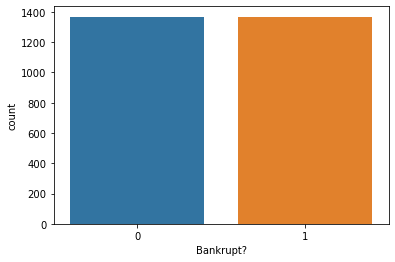

1    1368
0    1368
Name: Bankrupt?, dtype: int64


In [56]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(k_neighbors=5)
xtr,ytr = smt.fit_resample(xtr,ytr)
# Checking how the Target is balanced after SMOTE:
print('Train Target proprtions after oversampling:')
sns.countplot(ytr)
plt.show()
print(ytr.value_counts())

In [57]:
print('Train Feature Space after oversampling')
xtr.shape

Train Feature Space after oversampling


(2736, 94)

# Model 1

### Model only considering the positively and negatively correlated features found out from analysis:

Logistic Regression:

Checking for Bias:
Accuracy scores on training set = [0.97080292 0.98903108 0.96892139 0.97440585 0.976234  ]

Checking for Variance:
Train Accuracy = 0.9791666666666666
Test Accuracy = 0.9585253456221198



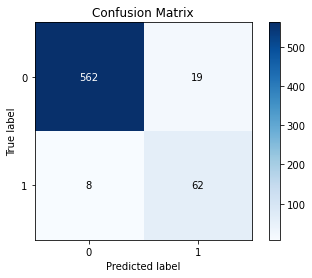

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       581
           1       0.77      0.89      0.82        70

    accuracy                           0.96       651
   macro avg       0.88      0.93      0.90       651
weighted avg       0.96      0.96      0.96       651
 



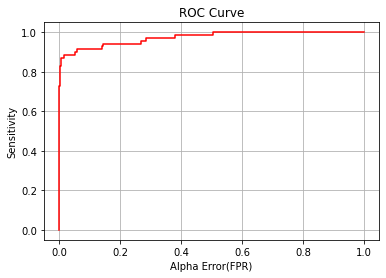

ROCAUC score for Logistic Regression: 0.9731989181214654


In [58]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=10)
log.fit(xtr[corrfeat],ytr)

ylog = log.predict(xte[corrfeat])
yproblog = log.predict_proba(xte[corrfeat])[:,1]

# Check for Bias:
from sklearn.model_selection import cross_val_score
print('Checking for Bias:')
print('Accuracy scores on training set =',cross_val_score(log,xtr[corrfeat],ytr,cv=5,scoring = 'accuracy'))
print()

# Check for Variance:
print('Checking for Variance:')
print('Train Accuracy =',log.score(xtr[corrfeat],ytr))
print('Test Accuracy =',log.score(xte[corrfeat],yte))
print()

# Evaluating Model Perfomance on Test:
import scikitplot as skplt
from sklearn.metrics import classification_report,roc_curve,roc_auc_score
# Confusion Matrix
skplt.metrics.plot_confusion_matrix(yte,ylog)
plt.show()
# Classification Report:
print('Classification Report:\n',classification_report(yte,ylog),'\n')
# ROC Curve:
alog,senslog,thlog = roc_curve(yte,yproblog)
plt.plot(alog,senslog,color='red')
plt.title('ROC Curve')
plt.xlabel('Alpha Error(FPR)')
plt.ylabel('Sensitivity')
plt.grid()
plt.show()
# Area under ROC:
print('ROCAUC score for Logistic Regression:',roc_auc_score(yte,yproblog))

Naive Bayes:

Checking for Bias:
Accuracy scores on training set = [0.91240876 0.92870201 0.91773309 0.90493601 0.89945155]

Checking for Variance:
Train Accuracy = 0.9126461988304093
Test Accuracy = 0.9692780337941628



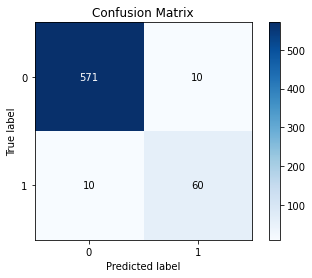

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       581
           1       0.86      0.86      0.86        70

    accuracy                           0.97       651
   macro avg       0.92      0.92      0.92       651
weighted avg       0.97      0.97      0.97       651
 



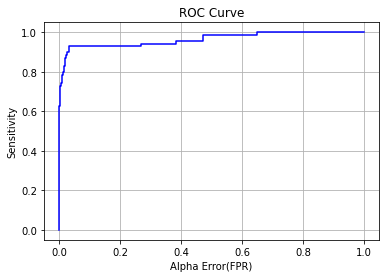

ROCAUC score for Naive Bayes: 0.9644701253995575


In [59]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtr[corrfeat],ytr)

ynb = nb.predict(xte[corrfeat])
yprobnb = nb.predict_proba(xte[corrfeat])[:,1]

# Check for Bias:
print('Checking for Bias:')
print('Accuracy scores on training set =',cross_val_score(nb,xtr[corrfeat],ytr,cv=5,scoring = 'accuracy'))
print()

# Check for Variance:
print('Checking for Variance:')
print('Train Accuracy =',nb.score(xtr[corrfeat],ytr))
print('Test Accuracy =',nb.score(xte[corrfeat],yte))
print()

# Evaluating Model Perfomance on Test:
# Confusion Matrix:
skplt.metrics.plot_confusion_matrix(yte,ynb)
plt.show()
# Classification Report:
print('Classification Report:\n',classification_report(yte,ynb),'\n')
# ROC Curve:
anb,sensnb,thnb = roc_curve(yte,yprobnb)
plt.plot(anb,sensnb,color='blue')
plt.title('ROC Curve')
plt.xlabel('Alpha Error(FPR)')
plt.ylabel('Sensitivity')
plt.grid()
plt.show()
# Area under ROC:
print('ROCAUC score for Naive Bayes:',roc_auc_score(yte,yprobnb))

KNN:

Checking for Bias:
Accuracy scores on training set = [0.97262774 0.99268739 0.98720293 0.98171846 0.98354662]

Checking for Variance:
Train Accuracy = 0.9883040935672515
Test Accuracy = 0.9646697388632872



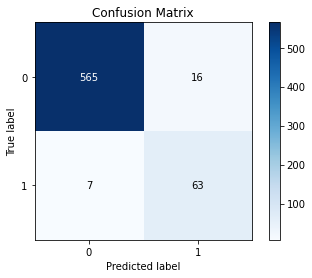

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       581
           1       0.80      0.90      0.85        70

    accuracy                           0.96       651
   macro avg       0.89      0.94      0.91       651
weighted avg       0.97      0.96      0.97       651
 



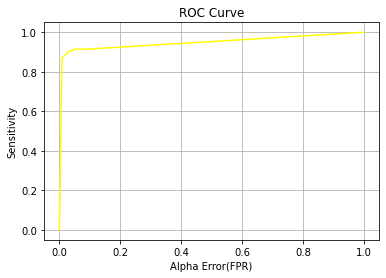

ROCAUC score for KNN: 0.9484386525694615


In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(xtr[corrfeat],ytr)

yknn = knn.predict(xte[corrfeat])
yprobknn = knn.predict_proba(xte[corrfeat])[:,1]

# Check for Bias:
print('Checking for Bias:')
print('Accuracy scores on training set =',cross_val_score(knn,xtr[corrfeat],ytr,cv=5,scoring = 'accuracy'))
print()

# Check for Variance:
print('Checking for Variance:')
print('Train Accuracy =',knn.score(xtr[corrfeat],ytr))
print('Test Accuracy =',knn.score(xte[corrfeat],yte))
print()

# Evaluating Model Perfomance on Test:
# Confusion Matrix:
skplt.metrics.plot_confusion_matrix(yte,yknn)
plt.show()
# Classification Report:
print('Classification Report:\n',classification_report(yte,yknn),'\n')
# ROC Curve:
aknn,sensknn,thknn = roc_curve(yte,yprobknn)
plt.plot(aknn,sensknn,color='yellow')
plt.title('ROC Curve')
plt.xlabel('Alpha Error(FPR)')
plt.ylabel('Sensitivity')
plt.grid()
plt.show()
# Area under ROC:
print('ROCAUC score for KNN:',roc_auc_score(yte,yprobknn))

Decision Tree:

Checking for Bias:
Accuracy scores on training set = [0.9689781  0.976234   0.97440585 0.97440585 0.976234  ]

Checking for Variance:
Train Accuracy = 1.0
Test Accuracy = 0.9600614439324117



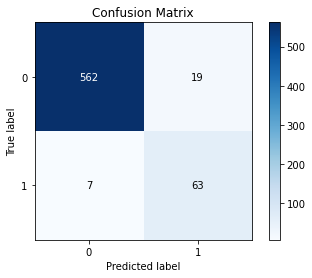

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       581
           1       0.77      0.90      0.83        70

    accuracy                           0.96       651
   macro avg       0.88      0.93      0.90       651
weighted avg       0.96      0.96      0.96       651
 



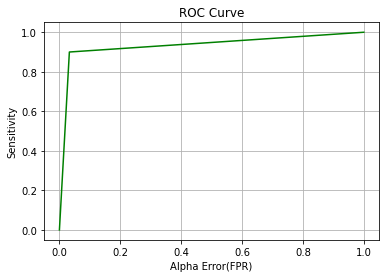

ROCAUC score for Decision Tree: 0.9336488812392426


In [61]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=10)
dt.fit(xtr[corrfeat],ytr)

ydt = dt.predict(xte[corrfeat])
yprobdt = dt.predict_proba(xte[corrfeat])[:,1]

# Check for Bias:
print('Checking for Bias:')
print('Accuracy scores on training set =',cross_val_score(dt,xtr[corrfeat],ytr,cv=5,scoring = 'accuracy'))
print()

# Check for Variance:
print('Checking for Variance:')
print('Train Accuracy =',dt.score(xtr[corrfeat],ytr))
print('Test Accuracy =',dt.score(xte[corrfeat],yte))
print()

# Evaluating Model Perfomance on Test:
# Confusion Matrix:
skplt.metrics.plot_confusion_matrix(yte,ydt)
plt.show()
# Classification Report:
print('Classification Report:\n',classification_report(yte,ydt),'\n')
# ROC Curve:
adt,sensdt,thdt = roc_curve(yte,yprobdt)
plt.plot(adt,sensdt,color='green')
plt.title('ROC Curve')
plt.xlabel('Alpha Error(FPR)')
plt.ylabel('Sensitivity')
plt.grid()
plt.show()
# Area under ROC:
print('ROCAUC score for Decision Tree:',roc_auc_score(yte,yprobdt))

Deciding Base Model 1 based on ROC Curve and Area under ROC:

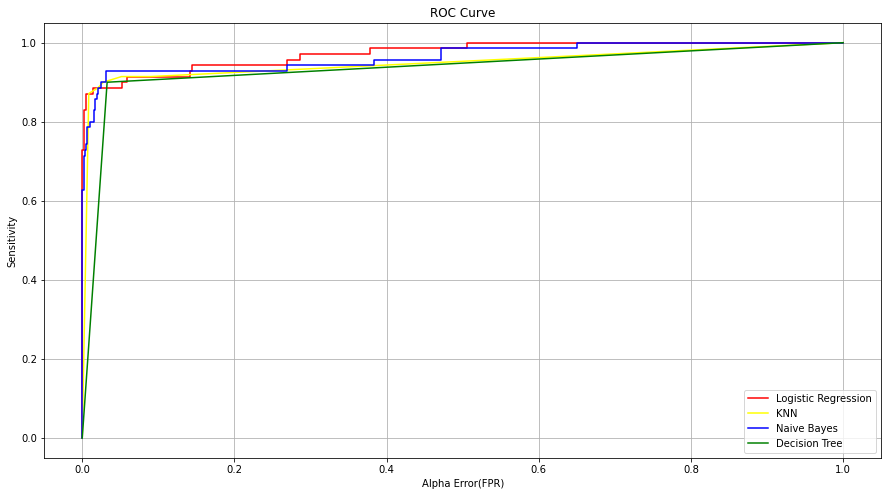

ROCAUC score for Naive Bayes: 0.9644701253995575
ROCAUC score for Logistic Regression: 0.9731989181214654
ROCAUC score for KNN: 0.9484386525694615
ROCAUC score for Decision Tree: 0.9336488812392426


In [62]:
plt.figure(figsize=(15,8))
# ROC Curve:
alog,senslog,thlog = roc_curve(yte,yproblog)
plt.plot(alog,senslog,color='red',label='Logistic Regression')

aknn,sensknn,thknn = roc_curve(yte,yprobknn)
plt.plot(aknn,sensknn,color='yellow',label='KNN')

anb,sensnb,thnb = roc_curve(yte,yprobnb)
plt.plot(anb,sensnb,color='blue',label='Naive Bayes')

adt,sensdt,thdt = roc_curve(yte,yprobdt)
plt.plot(adt,sensdt,color='green',label='Decision Tree')

plt.title('ROC Curve')
plt.xlabel('Alpha Error(FPR)')
plt.ylabel('Sensitivity')
plt.legend()
plt.grid()
plt.show()

# Area under ROC:
print('ROCAUC score for Naive Bayes:',roc_auc_score(yte,yprobnb))
print('ROCAUC score for Logistic Regression:',roc_auc_score(yte,yproblog))
print('ROCAUC score for KNN:',roc_auc_score(yte,yprobknn))
print('ROCAUC score for Decision Tree:',roc_auc_score(yte,yprobdt))

###### BASE MODEL 1 <========> Logistic Regression

In [63]:
# Random Search
from sklearn.model_selection import RandomizedSearchCV
paramrand=paramrand={'penalty':['l1','l2','elasticnet'],
                     'C':[0.07,0.5,1.0,1.5,2.0],
                     'l1_ratio':[None,0.001,0.1,0.2,0.25,0.3,0.35],
                     'tol':[0.0001,0.001,0.01,0.1],
                     'class_weight':[None,'balanced'],
                     'solver':['lbfgs','newton-cg', 'sag', 'saga'],
                     'max_iter':[60,80,100,120],
                     'multi_class':['auto','ovr']}
rand=RandomizedSearchCV(LogisticRegression(random_state=10),param_distributions=paramrand,scoring='roc_auc')
rand.fit(xtr[corrfeat],ytr)

print('Best Estimator:',rand.best_estimator_)
print('\nBest Score:',rand.best_score_)
print('\nBest Parameters:',rand.best_params_)

Best Estimator: LogisticRegression(C=1.5, class_weight='balanced', l1_ratio=0.3,
                   multi_class='ovr', random_state=10, solver='newton-cg',
                   tol=0.1)

Best Score: 0.997006862106228

Best Parameters: {'tol': 0.1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'ovr', 'max_iter': 100, 'l1_ratio': 0.3, 'class_weight': 'balanced', 'C': 1.5}


In [64]:
# Grid Search:
from sklearn.model_selection import GridSearchCV
paramgrid={'l1_ratio': [0.2,0.3,0.4], 
           'C': [1.4,1.5,1.6],
           'solver':['lbfgs','newton-cg', 'sag', 'saga'],
           'tol':[0.0001,0.001,0.01,0.1]}
grid=GridSearchCV(LogisticRegression(max_iter=100,class_weight='balanced',multi_class='ovr',random_state=10, tol=0.01),param_grid=paramgrid,scoring='roc_auc')
grid.fit(xtr[corrfeat],ytr)

print('Best Estimator:',grid.best_estimator_)
print('\nBest Score:',grid.best_score_)
print('\nBest Paramenters:',grid.best_params_)

Best Estimator: LogisticRegression(C=1.6, class_weight='balanced', l1_ratio=0.2,
                   multi_class='ovr', random_state=10, tol=0.1)

Best Score: 0.9970148832821325

Best Paramenters: {'C': 1.6, 'l1_ratio': 0.2, 'solver': 'lbfgs', 'tol': 0.1}


Checking for Bias:
Accuracy scores on training set = [0.97445255 0.98903108 0.96892139 0.97440585 0.976234  ]

Checking for Variance:
Train Accuracy = 0.9798976608187134
Test Accuracy = 0.9585253456221198



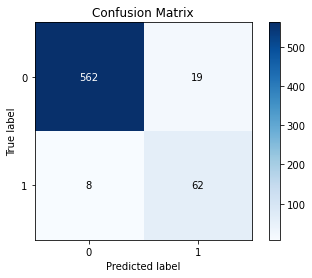

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       581
           1       0.77      0.89      0.82        70

    accuracy                           0.96       651
   macro avg       0.88      0.93      0.90       651
weighted avg       0.96      0.96      0.96       651
 



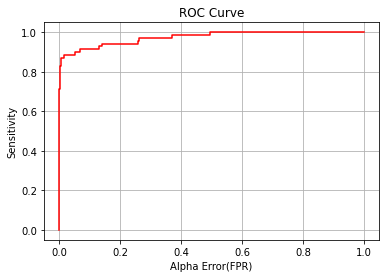

ROCAUC score for Base Model 1: 0.9740349151708877


In [65]:
# Fitting the base model 1:
base = LogisticRegression(C=1.6, class_weight='balanced', l1_ratio=0.2,multi_class='ovr', random_state=10, tol=0.1)
base.fit(xtr[corrfeat],ytr)

ybase = base.predict(xte[corrfeat])
yprob_base = base.predict_proba(xte[corrfeat])[:,1]

# Check for Bias:
print('Checking for Bias:')
print('Accuracy scores on training set =',cross_val_score(base,xtr[corrfeat],ytr,cv=5,scoring = 'accuracy'))
print()

# Check for Variance:
print('Checking for Variance:')
print('Train Accuracy =',base.score(xtr[corrfeat],ytr))
print('Test Accuracy =',base.score(xte[corrfeat],yte))
print()

# Evaluating Base Model Perfomance on Test:
# Confusion Matrix:
skplt.metrics.plot_confusion_matrix(yte,ybase)
plt.show()
# Classification Report:
print('Classification Report:\n',classification_report(yte,ybase),'\n')
# ROC Curve:
abase,sensbase,thbase = roc_curve(yte,yprob_base)
plt.plot(abase,sensbase,color='red')
plt.title('ROC Curve')
plt.xlabel('Alpha Error(FPR)')
plt.ylabel('Sensitivity')
plt.grid()
plt.show()
# Area under ROC:
print('ROCAUC score for Base Model 1:',roc_auc_score(yte,yprob_base))

###### Improving the Base Model 1 using Ensemble

Voting:

Checking for Bias:
Accuracy scores on training set = [0.97445255 0.99451554 0.97989031 0.99085923 0.976234  ]

Checking for Variance:
Train Accuracy = 0.9956140350877193
Test Accuracy = 0.9708141321044547



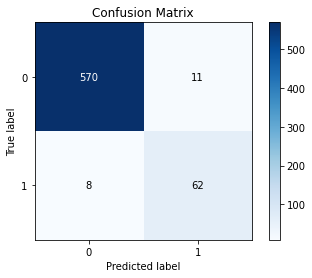

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       581
           1       0.85      0.89      0.87        70

    accuracy                           0.97       651
   macro avg       0.92      0.93      0.93       651
weighted avg       0.97      0.97      0.97       651
 



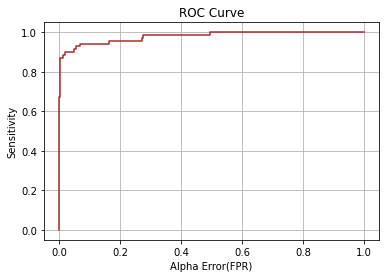

ROCAUC score for Voter: 0.979591836734694


In [66]:
from sklearn.ensemble import VotingClassifier
vote = VotingClassifier([('lg',base),('d',dt),('kn',knn),('n',nb)],voting='soft')
vote.fit(xtr[corrfeat],ytr)

yvote = vote.predict(xte[corrfeat])
yprobvote = vote.predict_proba(xte[corrfeat])[:,1]

# Check for Bias:
print('Checking for Bias:')
print('Accuracy scores on training set =',cross_val_score(vote,xtr[corrfeat],ytr,cv=5,scoring = 'accuracy'))
print()

# Check for Variance:
print('Checking for Variance:')
print('Train Accuracy =',vote.score(xtr[corrfeat],ytr))
print('Test Accuracy =',vote.score(xte[corrfeat],yte))
print()

# Evaluating Model Perfomance on Test:
# Confusion Matrix:
skplt.metrics.plot_confusion_matrix(yte,yvote)
plt.show()
# Classification Report:
print('Classification Report:\n',classification_report(yte,yvote),'\n')
# ROC Curve:
avote,sensvote,thvote = roc_curve(yte,yprobvote)
plt.plot(avote,sensvote,color='brown')
plt.title('ROC Curve')
plt.xlabel('Alpha Error(FPR)')
plt.ylabel('Sensitivity')
plt.grid()
plt.show()
# Area under ROC:
print('ROCAUC score for Voter:',roc_auc_score(yte,yprobvote))

Stacking:

Checking for Bias:
Accuracy scores on training set = [0.98175182 0.99634369 0.98354662 0.98903108 0.98537477]

Checking for Variance:
Train Accuracy = 0.9967105263157895
Test Accuracy = 0.9662058371735791



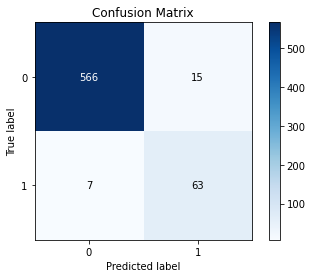

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       581
           1       0.81      0.90      0.85        70

    accuracy                           0.97       651
   macro avg       0.90      0.94      0.92       651
weighted avg       0.97      0.97      0.97       651
 



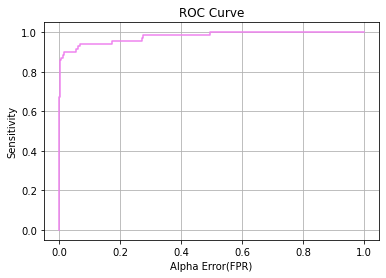

ROCAUC score for Stacker: 0.9793705433980822


In [67]:
from sklearn.ensemble import StackingClassifier
stack = StackingClassifier([('lg',base),('d',dt),('kn',knn),('n',nb)],final_estimator=LogisticRegression())
stack.fit(xtr[corrfeat],ytr)

ystack = stack.predict(xte[corrfeat])
yprobstack = stack.predict_proba(xte[corrfeat])[:,1]

# Check for Bias:
print('Checking for Bias:')
print('Accuracy scores on training set =',cross_val_score(stack,xtr[corrfeat],ytr,cv=5,scoring = 'accuracy'))
print()

# Check for Variance:
print('Checking for Variance:')
print('Train Accuracy =',stack.score(xtr[corrfeat],ytr))
print('Test Accuracy =',stack.score(xte[corrfeat],yte))
print()

# Evaluating Model Perfomance on Test:
# Confusion Matrix:
skplt.metrics.plot_confusion_matrix(yte,ystack)
plt.show()
# Classification Report:
print('Classification Report:\n',classification_report(yte,ystack),'\n')
# ROC Curve:
astack,sensstack,thstack = roc_curve(yte,yprobstack)
plt.plot(astack,sensstack,color='violet')
plt.title('ROC Curve')
plt.xlabel('Alpha Error(FPR)')
plt.ylabel('Sensitivity')
plt.grid()
plt.show()
# Area under ROC:
print('ROCAUC score for Stacker:',roc_auc_score(yte,yprobstack))

Logistic Regression Bag:(Bag of basemodel)

Checking for Bias:
Accuracy scores on training set = [0.97262774 0.98720293 0.96892139 0.97440585 0.97806216]

Checking for Variance:
Train Accuracy = 0.97953216374269
Test Accuracy = 0.956989247311828



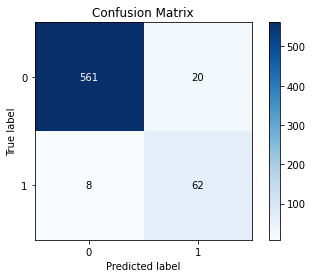

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       581
           1       0.76      0.89      0.82        70

    accuracy                           0.96       651
   macro avg       0.87      0.93      0.90       651
weighted avg       0.96      0.96      0.96       651
 



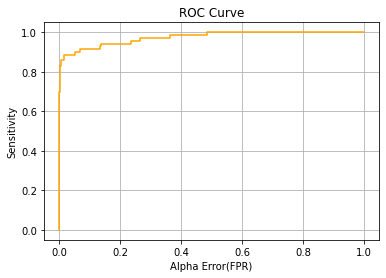

ROCAUC score for Logistic Regression Bag: 0.9744283255470862


In [68]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(base,n_estimators=100,random_state=10)
bag.fit(xtr[corrfeat],ytr)

ybag = bag.predict(xte[corrfeat])
yprobbag = bag.predict_proba(xte[corrfeat])[:,1]

# Check for Bias:
print('Checking for Bias:')
print('Accuracy scores on training set =',cross_val_score(bag,xtr[corrfeat],ytr,cv=5,scoring = 'accuracy'))
print()

# Check for Variance:
print('Checking for Variance:')
print('Train Accuracy =',bag.score(xtr[corrfeat],ytr))
print('Test Accuracy =',bag.score(xte[corrfeat],yte))
print()

# Evaluating Model Perfomance on Test:
# Confusion Matrix:
skplt.metrics.plot_confusion_matrix(yte,ybag)
plt.show()
# Classification Report:
print('Classification Report:\n',classification_report(yte,ybag),'\n')
# ROC Curve:
abag,sensbag,thbag = roc_curve(yte,yprobbag)
plt.plot(abag,sensbag,color='orange')
plt.title('ROC Curve')
plt.xlabel('Alpha Error(FPR)')
plt.ylabel('Sensitivity')
plt.grid()
plt.show()
# Area under ROC:
print('ROCAUC score for Logistic Regression Bag:',roc_auc_score(yte,yprobbag))

Random Forest:

Checking for Bias:
Accuracy scores on training set = [0.98722628 0.98903108 0.97806216 0.98720293 0.98720293]

Checking for Variance:
Train Accuracy = 1.0
Test Accuracy = 0.978494623655914



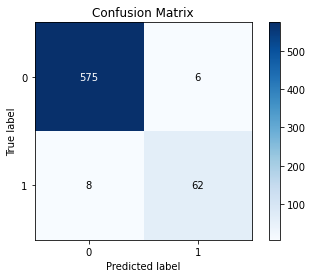

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       581
           1       0.91      0.89      0.90        70

    accuracy                           0.98       651
   macro avg       0.95      0.94      0.94       651
weighted avg       0.98      0.98      0.98       651
 



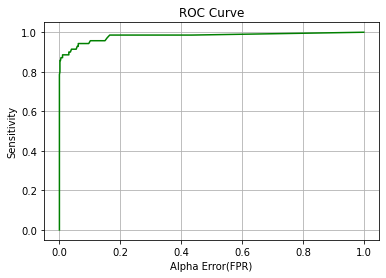

ROCAUC score for Random Forest: 0.9808458323088274


In [69]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=10)
rf.fit(xtr[corrfeat],ytr)

yrf = rf.predict(xte[corrfeat])
yprobrf = rf.predict_proba(xte[corrfeat])[:,1]

# Check for Bias:
print('Checking for Bias:')
print('Accuracy scores on training set =',cross_val_score(rf,xtr[corrfeat],ytr,cv=5,scoring = 'accuracy'))
print()

# Check for Variance:
print('Checking for Variance:')
print('Train Accuracy =',rf.score(xtr[corrfeat],ytr))
print('Test Accuracy =',rf.score(xte[corrfeat],yte))
print()

# Evaluating Model Perfomance on Test:
# Confusion Matrix:
skplt.metrics.plot_confusion_matrix(yte,yrf)
plt.show()
# Classification Report:
print('Classification Report:\n',classification_report(yte,yrf),'\n')
# ROC Curve:
arf,sensrf,thrf = roc_curve(yte,yprobrf)
plt.plot(arf,sensrf,color='green')
plt.title('ROC Curve')
plt.xlabel('Alpha Error(FPR)')
plt.ylabel('Sensitivity')
plt.grid()
plt.show()
# Area under ROC:
print('ROCAUC score for Random Forest:',roc_auc_score(yte,yprobrf))

Xgboost:

Checking for Bias:
Accuracy scores on training set = [0.98905109 0.98903108 0.97806216 0.99085923 0.98720293]

Checking for Variance:
Train Accuracy = 1.0
Test Accuracy = 0.9692780337941628



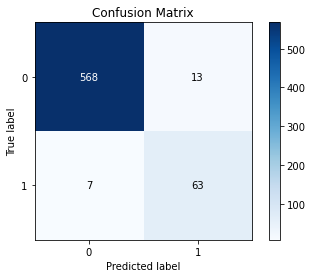

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       581
           1       0.83      0.90      0.86        70

    accuracy                           0.97       651
   macro avg       0.91      0.94      0.92       651
weighted avg       0.97      0.97      0.97       651
 



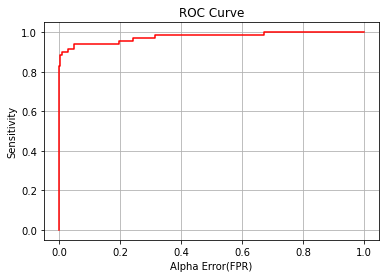

ROCAUC score for Xgboost: 0.9777231374477502


In [70]:
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric='error')
xgb.fit(xtr[corrfeat],ytr)

yxgb = xgb.predict(xte[corrfeat])
yprobxgb = xgb.predict_proba(xte[corrfeat])[:,1]

# Check for Bias:
print('Checking for Bias:')
print('Accuracy scores on training set =',cross_val_score(xgb,xtr[corrfeat],ytr,cv=5,scoring = 'accuracy'))
print()

# Check for Variance:
print('Checking for Variance:')
print('Train Accuracy =',xgb.score(xtr[corrfeat],ytr))
print('Test Accuracy =',xgb.score(xte[corrfeat],yte))
print()

# Evaluating Base Model Perfomance on Test:
# Confusion Matrix:
skplt.metrics.plot_confusion_matrix(yte,yxgb)
plt.show()
# Classification Report:
print('Classification Report:\n',classification_report(yte,yxgb),'\n')
# ROC Curve:
axgb,sensxgb,thxgb = roc_curve(yte,yprobxgb)
plt.plot(axgb,sensxgb,color='red')
plt.title('ROC Curve')
plt.xlabel('Alpha Error(FPR)')
plt.ylabel('Sensitivity')
plt.grid()
plt.show()
# Area under ROC:
print('ROCAUC score for Xgboost:',roc_auc_score(yte,yprobxgb))

###### Selecting Model 1:

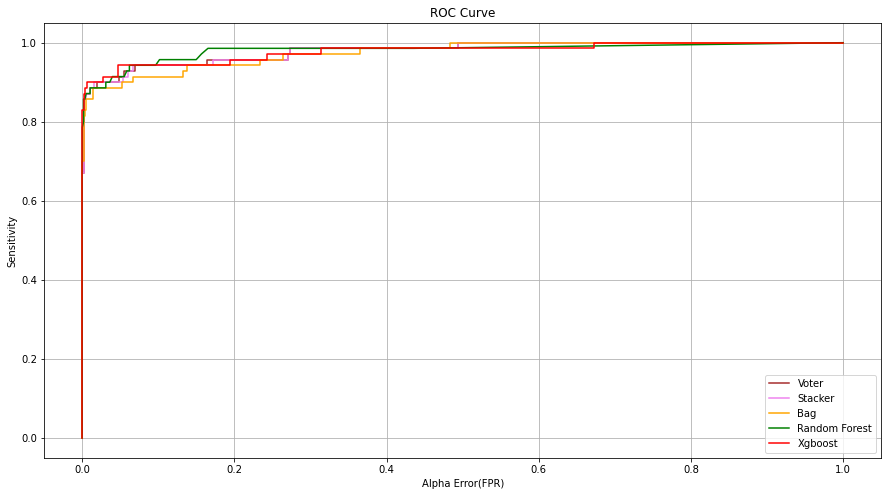

ROCAUC score for Voter: 0.979591836734694
ROCAUC score for Stacker: 0.9793705433980822
ROCAUC score for Logistic Regression Bag: 0.9744283255470862
ROCAUC score for Random Forest: 0.9808458323088274
ROCAUC score for Xgboost: 0.9777231374477502


In [71]:
plt.figure(figsize=(15,8))
# ROC Curve:
avote,sensvote,thvote = roc_curve(yte,yprobvote)
plt.plot(avote,sensvote,color='brown',label='Voter')

astack,sensstack,thstack = roc_curve(yte,yprobstack)
plt.plot(astack,sensstack,color='violet',label='Stacker')

abag,sensbag,thbag = roc_curve(yte,yprobbag)
plt.plot(abag,sensbag,color='orange',label='Bag')

arf,sensrf,thrf = roc_curve(yte,yprobrf)
plt.plot(arf,sensrf,color='green',label='Random Forest')

axgb,sensxgb,thxgb = roc_curve(yte,yprobxgb)
plt.plot(axgb,sensxgb,color='red',label='Xgboost')

plt.title('ROC Curve')
plt.xlabel('Alpha Error(FPR)')
plt.ylabel('Sensitivity')
plt.legend()
plt.grid()
plt.show()

# Area under ROC:
print('ROCAUC score for Voter:',roc_auc_score(yte,yprobvote))
print('ROCAUC score for Stacker:',roc_auc_score(yte,yprobstack))
print('ROCAUC score for Logistic Regression Bag:',roc_auc_score(yte,yprobbag))
print('ROCAUC score for Random Forest:',roc_auc_score(yte,yprobrf))
print('ROCAUC score for Xgboost:',roc_auc_score(yte,yprobxgb))

###### Final Ensemble of Model 1 <=====> Random Forest

### Tuning the hyperparameters

In [77]:
# Random Search:
from sklearn.model_selection import RandomizedSearchCV
paramrand = {'n_estimators':[60,100,120,150,200],
            'max_leaf_nodes':range(2,12),
            'max_depth':range(2,8),
            'class_weight':[None,0.01,0.1,1,2,5],
            'ccp_alpha':[0,0.001,0.01,0.1,0.5,2,5],
            'min_samples_split':[1,2,5,7],
            'min_samples_leaf':[1,2],
            'min_weight_fraction_leaf':[0.0,0.01,1,2,5]}

rand = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=10),param_distributions=paramrand,scoring='roc_auc')
rand.fit(xtr[corrfeat],ytr)
print('Best Estimator:',rand.best_estimator_)
print('\nBest Score:',rand.best_score_)
print('\nBest Parameters:',rand.best_params_)

Best Estimator: RandomForestClassifier(ccp_alpha=0.001, max_depth=2, max_leaf_nodes=7,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.01, n_estimators=200,
                       random_state=10)

Best Score: 0.9912242675895507

Best Parameters: {'n_estimators': 200, 'min_weight_fraction_leaf': 0.01, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_leaf_nodes': 7, 'max_depth': 2, 'class_weight': None, 'ccp_alpha': 0.001}


In [78]:
# Grid Search:
paramgrid = {'max_depth':[2,3,4,5,6,7,8], 
             'max_leaf_nodes':[4,5,6,7],
             'min_samples_split':[5,6,7,8],
             'min_weight_fraction_leaf':[0,0.01,0.02,0.03]}
grid = GridSearchCV(estimator=RandomForestClassifier(ccp_alpha=0.001,min_samples_leaf=2,n_estimators=200,random_state=10),param_grid=paramgrid,scoring='roc_auc')
grid.fit(xtr[corrfeat],ytr)
print('Best Estimator:',grid.best_estimator_)
print('\nBest Score:',grid.best_score_)
print('\nBest Parameters:',grid.best_params_)

Best Estimator: RandomForestClassifier(ccp_alpha=0.001, max_depth=5, max_leaf_nodes=7,
                       min_samples_leaf=2, min_samples_split=8,
                       min_weight_fraction_leaf=0, n_estimators=200,
                       random_state=10)

Best Score: 0.9953146379434405

Best Parameters: {'max_depth': 5, 'max_leaf_nodes': 7, 'min_samples_split': 8, 'min_weight_fraction_leaf': 0}


Checking for Bias:
Accuracy scores on training set = [0.95437956 0.96343693 0.95795247 0.97074954 0.96160878]

Checking for Variance:
Train Accuracy = 0.9678362573099415
Test Accuracy = 0.9646697388632872



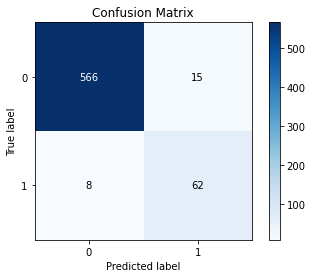

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       581
           1       0.81      0.89      0.84        70

    accuracy                           0.96       651
   macro avg       0.90      0.93      0.91       651
weighted avg       0.97      0.96      0.97       651
 



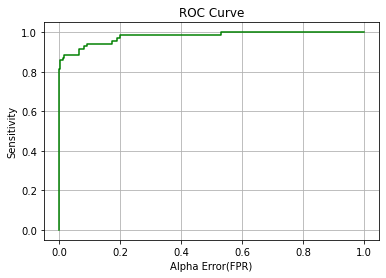

ROCAUC score for Model 1: 0.9796656011802312


In [79]:
# Final version of Model 1:
model1 = RandomForestClassifier(ccp_alpha=0.001, max_depth=5, max_leaf_nodes=7,
                       min_samples_leaf=2, min_samples_split=8,
                       min_weight_fraction_leaf=0, n_estimators=200,
                       random_state=10)
model1.fit(xtr[corrfeat],ytr)

ymodel1 = model1.predict(xte[corrfeat]) 
yprobmodel1 = model1.predict_proba(xte[corrfeat])[:,1]

# Check for Bias:
print('Checking for Bias:')
print('Accuracy scores on training set =',cross_val_score(model1,xtr[corrfeat],ytr,cv=5,scoring = 'accuracy'))
print()

# Check for Variance:
print('Checking for Variance:')
print('Train Accuracy =',model1.score(xtr[corrfeat],ytr))
print('Test Accuracy =',model1.score(xte[corrfeat],yte))
print()

# Evaluating Model 1 Perfomance on Test:
# Confusion Matrix:
skplt.metrics.plot_confusion_matrix(yte,ymodel1)
plt.show()
# Classification Report:
print('Classification Report:\n',classification_report(yte,ymodel1),'\n')
# ROC Curve:
am1,sensm1,thm1 = roc_curve(yte,yprobmodel1)
plt.plot(am1,sensm1,color='green')
plt.title('ROC Curve')
plt.xlabel('Alpha Error(FPR)')
plt.ylabel('Sensitivity')
plt.grid()
plt.show()
# Area under ROC:
print('ROCAUC score for Model 1:',roc_auc_score(yte,yprobmodel1))

### Inferences from the model:

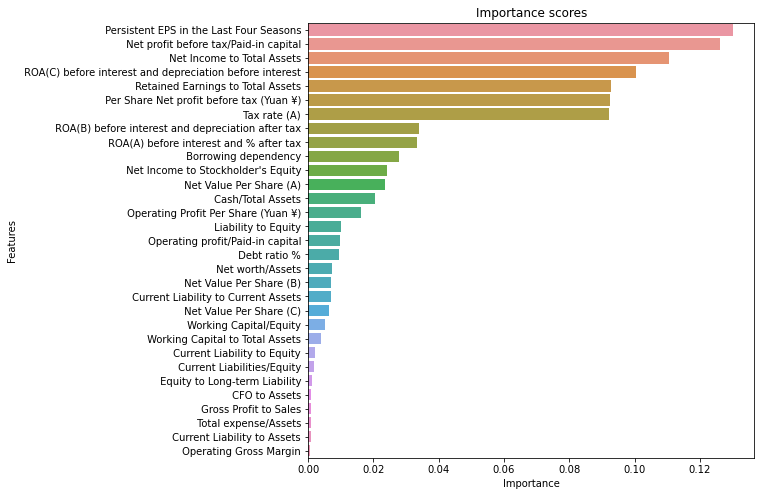

In [80]:
# Importance Scores of Features:
importance1 = pd.DataFrame({'Features':corrfeat,'Importance':model1.feature_importances_}).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(8,8))
sns.barplot(importance1['Importance'],importance1['Features'])
plt.title('Importance scores')
plt.show()

In [81]:
# Top 10 features according to Model:
print('Top 10 features according to the Model:\n\n',list(importance1['Features'][:10]))

Top 10 features according to the Model:

 [' Persistent EPS in the Last Four Seasons', ' Net profit before tax/Paid-in capital', ' Net Income to Total Assets', ' ROA(C) before interest and depreciation before interest', ' Retained Earnings to Total Assets', ' Per Share Net profit before tax (Yuan ¥)', ' Tax rate (A)', ' ROA(B) before interest and depreciation after tax', ' ROA(A) before interest and % after tax', ' Borrowing dependency']


# Model 2

### Model considering all the features from the dataset:

Logistic Regression:

Checking for Bias:
Accuracy scores on training set = [0.98357664 0.99085923 0.98903108 0.98720293 0.98537477]

Checking for Variance:
Train Accuracy = 0.9948830409356725
Test Accuracy = 0.9662058371735791 




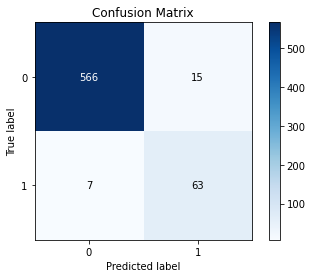

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       581
           1       0.81      0.90      0.85        70

    accuracy                           0.97       651
   macro avg       0.90      0.94      0.92       651
weighted avg       0.97      0.97      0.97       651
 



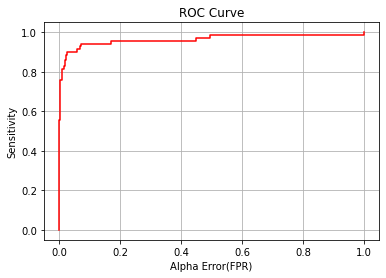

ROCAUC score for Logistic Regression: 0.9645684779936071


In [82]:
log = LogisticRegression()
log.fit(xtr,ytr)

ylog = log.predict(xte)
yproblog = log.predict_proba(xte)[:,1]

# Check for Bias:
print('Checking for Bias:')
print('Accuracy scores on training set =',cross_val_score(log,xtr,ytr,cv=5,scoring = 'accuracy'))
print()

# Check for Variance:
print('Checking for Variance:')
print('Train Accuracy =',log.score(xtr,ytr))
print('Test Accuracy =',log.score(xte,yte),'\n')
print()
# Evaluating Model Perfomance on Test:
# Confusion Matrix:
skplt.metrics.plot_confusion_matrix(yte,ylog)
plt.show()
# Classification Report:
print('Classification Report:\n',classification_report(yte,ylog),'\n')
# ROC Curve:
alog,senslog,thlog = roc_curve(yte,yproblog)
plt.plot(alog,senslog,color='red')
plt.title('ROC Curve')
plt.xlabel('Alpha Error(FPR)')
plt.ylabel('Sensitivity')
plt.grid()
plt.show()
# Area under ROC:
print('ROCAUC score for Logistic Regression:',roc_auc_score(yte,yproblog))

Naive Bayes:

Checking for Bias:
Accuracy scores on training set = [0.88138686 0.88848263 0.86288848 0.88482633 0.85740402]

Checking for Variance:
Train Accuracy = 0.8760964912280702
Test Accuracy = 0.9539170506912442



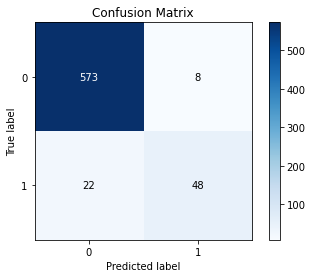

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       581
           1       0.86      0.69      0.76        70

    accuracy                           0.95       651
   macro avg       0.91      0.84      0.87       651
weighted avg       0.95      0.95      0.95       651
 



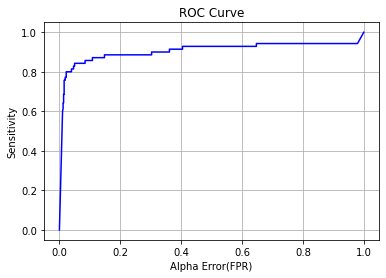

ROCAUC score for Naive Bayes: 0.9059134497172363


In [83]:
nb = GaussianNB()
nb.fit(xtr,ytr)

ynb = nb.predict(xte)
yprobnb = nb.predict_proba(xte)[:,1]

# Check for Bias:
print('Checking for Bias:')
print('Accuracy scores on training set =',cross_val_score(nb,xtr,ytr,cv=5,scoring = 'accuracy'))
print()

# Check for Variance:
print('Checking for Variance:')
print('Train Accuracy =',nb.score(xtr,ytr))
print('Test Accuracy =',nb.score(xte,yte))
print()
# Evaluating Model Perfomance on Test:
# Confusion Matrix:
skplt.metrics.plot_confusion_matrix(yte,ynb)
plt.show()
# Classification Report:
print('Classification Report:\n',classification_report(yte,ynb),'\n')
# ROC Curve:
anb,sensnb,thnb = roc_curve(yte,yprobnb)
plt.plot(anb,sensnb,color='blue')
plt.title('ROC Curve')
plt.xlabel('Alpha Error(FPR)')
plt.ylabel('Sensitivity')
plt.grid()
plt.show()
# Area under ROC:
print('ROCAUC score for Naive Bayes:',roc_auc_score(yte,yprobnb))

KNN:

Checking for Bias:
Accuracy scores on training set = [0.97262774 0.99817185 0.98720293 0.98171846 0.98720293]

Checking for Variance:
Train Accuracy = 0.991593567251462
Test Accuracy = 0.9662058371735791



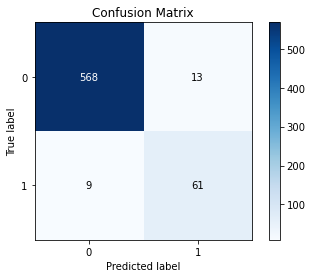

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       581
           1       0.82      0.87      0.85        70

    accuracy                           0.97       651
   macro avg       0.90      0.92      0.91       651
weighted avg       0.97      0.97      0.97       651
 



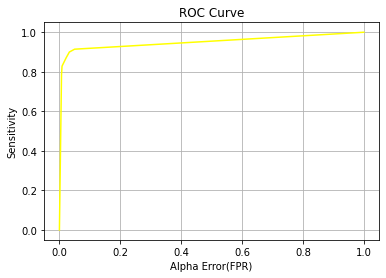

ROCAUC score for KNN: 0.9499262355544627


In [84]:
knn = KNeighborsClassifier()
knn.fit(xtr,ytr)

yknn = knn.predict(xte)
yprobknn = knn.predict_proba(xte)[:,1]

# Check for Bias:
print('Checking for Bias:')
print('Accuracy scores on training set =',cross_val_score(knn,xtr,ytr,cv=5,scoring = 'accuracy'))
print()

# Check for Variance:
print('Checking for Variance:')
print('Train Accuracy =',knn.score(xtr,ytr))
print('Test Accuracy =',knn.score(xte,yte))
print()
# Evaluating Model Perfomance on Test:
# Confusion Matrix:
skplt.metrics.plot_confusion_matrix(yte,yknn)
plt.show()
# Classification Report:
print('Classification Report:\n',classification_report(yte,yknn),'\n')
# ROC Curve:
aknn,sensknn,thknn = roc_curve(yte,yprobknn)
plt.plot(aknn,sensknn,color='yellow')
plt.title('ROC Curve')
plt.xlabel('Alpha Error(FPR)')
plt.ylabel('Sensitivity')
plt.grid()
plt.show()
# Area under ROC:
print('ROCAUC score for KNN:',roc_auc_score(yte,yprobknn))

Decision Tree:

Checking for Bias:
Accuracy scores on training set = [0.94708029 0.96160878 0.95429616 0.95429616 0.95063985]

Checking for Variance:
Train Accuracy = 0.9623538011695907
Test Accuracy = 0.9539170506912442



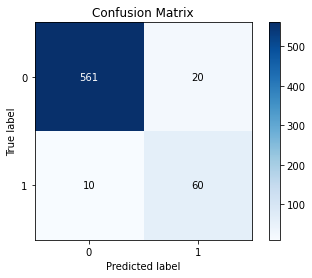

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       581
           1       0.75      0.86      0.80        70

    accuracy                           0.95       651
   macro avg       0.87      0.91      0.89       651
weighted avg       0.96      0.95      0.96       651
 



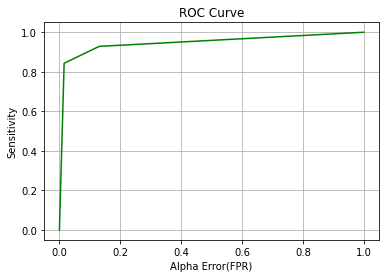

ROCAUC score for Decision Tree: 0.9468281288418983


In [85]:
dt = DecisionTreeClassifier(max_leaf_nodes=4,max_depth=3,random_state=10)
dt.fit(xtr,ytr)

ydt = dt.predict(xte)
yprobdt = dt.predict_proba(xte)[:,1]

# Check for Bias:
print('Checking for Bias:')
print('Accuracy scores on training set =',cross_val_score(dt,xtr,ytr,cv=5,scoring = 'accuracy'))
print()

# Check for Variance:
print('Checking for Variance:')
print('Train Accuracy =',dt.score(xtr,ytr))
print('Test Accuracy =',dt.score(xte,yte))
print()

# Evaluating Model Perfomance on Test:
# Confusion Matrix:
skplt.metrics.plot_confusion_matrix(yte,ydt)
plt.show()
# Classification Report:
print('Classification Report:\n',classification_report(yte,ydt),'\n')
# ROC Curve:
adt,sensdt,thdt = roc_curve(yte,yprobdt)
plt.plot(adt,sensdt,color='green')
plt.title('ROC Curve')
plt.xlabel('Alpha Error(FPR)')
plt.ylabel('Sensitivity')
plt.grid()
plt.show()
# Area under ROC:
print('ROCAUC score for Decision Tree:',roc_auc_score(yte,yprobdt))

Deciding the Base Model 2 based on ROC Curve

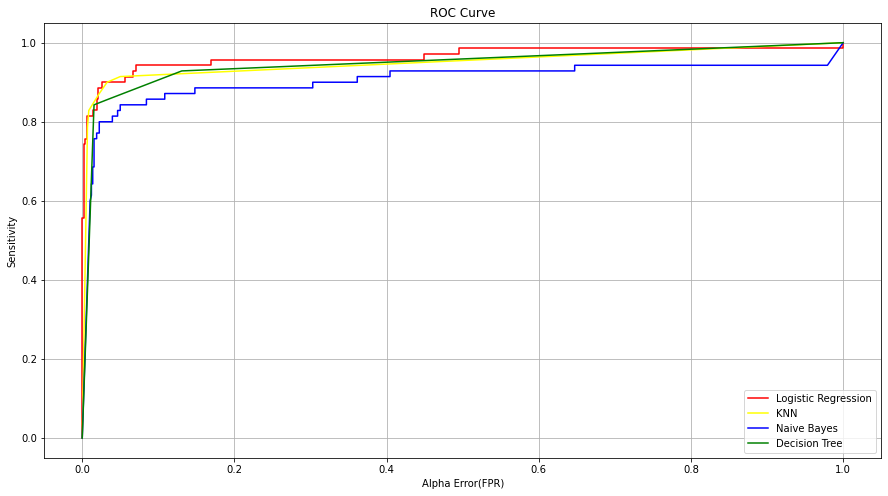

ROCAUC score for Logistic Regression: 0.9645684779936071
ROCAUC score for KNN: 0.9499262355544627
ROCAUC score for Naive Bayes: 0.9059134497172363
ROCAUC score for Decision Tree: 0.9468281288418983


In [86]:
plt.figure(figsize=(15,8))
# ROC Curve:
alog,senslog,thlog = roc_curve(yte,yproblog)
plt.plot(alog,senslog,color='red',label='Logistic Regression')

aknn,sensknn,thknn = roc_curve(yte,yprobknn)
plt.plot(aknn,sensknn,color='yellow',label='KNN')

anb,sensnb,thnb = roc_curve(yte,yprobnb)
plt.plot(anb,sensnb,color='blue',label='Naive Bayes')

adt,sensdt,thdt = roc_curve(yte,yprobdt)
plt.plot(adt,sensdt,color='green',label='Decision Tree')

plt.title('ROC Curve')
plt.xlabel('Alpha Error(FPR)')
plt.ylabel('Sensitivity')
plt.legend()
plt.grid()
plt.show()

# Area under ROC:
print('ROCAUC score for Logistic Regression:',roc_auc_score(yte,yproblog))
print('ROCAUC score for KNN:',roc_auc_score(yte,yprobknn))
print('ROCAUC score for Naive Bayes:',roc_auc_score(yte,yprobnb))
print('ROCAUC score for Decision Tree:',roc_auc_score(yte,yprobdt))

###### Base Model 2 <======> Logistic Regression

In [87]:
# Random Search
paramrand={'penalty':['l1','l2','elasticnet'],
            'C':[0.07,0.5,1.0,1.5,2.0],
            'l1_ratio':[0.001,0.1,0.15,0.2],
            'tol':[0.0001,0.001,0.01,0.1],
            'class_weight':[None,'balanced'],
            'solver':['lbfgs','newton-cg', 'sag', 'saga'],
            'max_iter':[60,80,100,120,150],
            'multi_class':['auto','ovr']}
rand=RandomizedSearchCV(LogisticRegression(random_state=10),param_distributions=paramrand,scoring='roc_auc')
rand.fit(xtr,ytr)

print('Best Estimator:',rand.best_estimator_)
print('\nBest Score:',rand.best_score_)
print('\nBest Parameters:',rand.best_params_)

Best Estimator: LogisticRegression(C=2.0, l1_ratio=0.1, penalty='elasticnet', random_state=10,
                   solver='saga')

Best Score: 0.9981620187757969

Best Parameters: {'tol': 0.0001, 'solver': 'saga', 'penalty': 'elasticnet', 'multi_class': 'auto', 'max_iter': 100, 'l1_ratio': 0.1, 'class_weight': None, 'C': 2.0}


Checking for Bias:
Accuracy scores on training set = [0.97810219 0.98537477 0.98537477 0.98354662 0.97989031]

Checking for Variance:
Train Accuracy = 0.9842836257309941
Test Accuracy = 0.9554531490015361



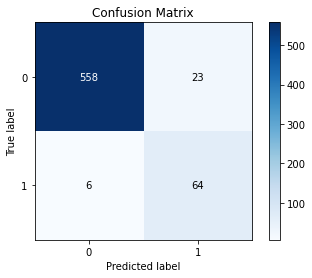

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       581
           1       0.74      0.91      0.82        70

    accuracy                           0.96       651
   macro avg       0.86      0.94      0.89       651
weighted avg       0.96      0.96      0.96       651
 



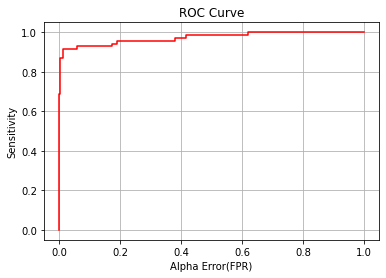

ROCAUC score for Base Model 2: 0.9728546840422917


In [88]:
# Fitting the base model:
base = LogisticRegression(C=2.0, l1_ratio=0.1, penalty='elasticnet', random_state=10,
                   solver='saga')
base.fit(xtr,ytr)

ybase = base.predict(xte)
yprob_base = base.predict_proba(xte)[:,1]

# Check for Bias:
print('Checking for Bias:')
print('Accuracy scores on training set =',cross_val_score(base,xtr,ytr,cv=5,scoring = 'accuracy'))
print()

# Check for Variance:
print('Checking for Variance:')
print('Train Accuracy =',base.score(xtr,ytr))
print('Test Accuracy =',base.score(xte,yte))
print()

# Evaluating Base Model Perfomance on Test:
# Confusion Matrix:
skplt.metrics.plot_confusion_matrix(yte,ybase)
plt.show()
# Classification Report:
print('Classification Report:\n',classification_report(yte,ybase),'\n')
# ROC Curve:
abase,sensbase,thbase = roc_curve(yte,yprob_base)
plt.plot(abase,sensbase,color='red')
plt.title('ROC Curve')
plt.xlabel('Alpha Error(FPR)')
plt.ylabel('Sensitivity')
plt.grid()
plt.show()
# Area under ROC:
print('ROCAUC score for Base Model 2:',roc_auc_score(yte,yprob_base))

### Feature Engineering

In [89]:
# All the features:
feat = list(x.columns)
print('Number of features:',len(feat))
# Feature Matrix:
x.head()

Number of features: 94


ROA(C) before interest and depreciation before interest  \
0                                          -0.327021          
1                                          -0.323122          
2                                          -0.335795          
3                                          -0.340033          
4                                          -0.309937          

    ROA(A) before interest and % after tax  \
0                                 1.815436   
1                                 1.819300   
2                                 1.805665   
3                                 1.729930   
4                                 1.792425   

    ROA(B) before interest and depreciation after tax  \
0                                          -0.286653    
1                                          -0.277577    
2                                          -0.287929    
3                                          -0.291885    
4                                          -0.272585    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                -0.362565                     -0.357563   
1                -0.354791                     -0.350026   
2                -0.356176                     -0.351427   
3                -0.361449                     -0.356482   
4                -0.350406                     -0.345772   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0               -0.000486                   -0.226249   
1               -0.000467                   -0.226042   
2               -0.000494                   -0.225913   
3               -0.000495                   -0.226336   
4               -0.000437                   -0.225995   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      2.246570                                      1.354680   
1                      2.246905                                      1.354846   
2                      2.247203                                      1.355414   
3                      2.246466                                      1.354631   
4                      2.246912                                      1.354622   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                               0.884119             1.050420e-10   
1                               0.884230             6.005409e+03   
2                               0.884289             3.948762e+03   
3                               0.884092             6.349331e+03   
4                               0.884222             7.146933e+03   

    Research and development expense rate   Cash flow rate  \
0                            50000.000000         1.572378   
1                                0.010554         1.584345   
2                            83845.095265         1.602804   
3                            24718.414189         1.600195   
4                                0.011307         1.610804   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                              0.000301       0.509848   
1                              0.000239       0.373074   
2                              0.000726       0.102603   
3                              0.000243       0.391606   
4                              0.000407       0.476495   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                  0.502155                  0.502155   
1                  0.477729                  0.477729   
2                  0.452497                  0.452497   
3                  0.429860                  0.429860   
4                  0.515815                  0.515815   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                  0.502155                                  1.290811   
1                  0.477729                                  1.300488   
2                  0.452497                                  1.265675   
3                  0.429860               

###### Filtering out only the important numeric features by Regularization

In [90]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(LogisticRegression())
sfm.fit(xtr[num.columns],ytr)
imp = pd.DataFrame(sfm.get_support(),index=num.columns,columns=['Status'])
imp

Status
 ROA(C) before interest and depreciation before...    True
 ROA(A) before interest and % after tax               True
 ROA(B) before interest and depreciation after tax   False
 Operating Gross Margin                              False
 Realized Sales Gross Margin                         False
 Operating Profit Rate                                True
 Pre-tax net Interest Rate                           False
 After-tax net Interest Rate                         False
 Non-industry income and expenditure/revenue          True
 Continuous interest rate (after tax)                 True
 Operating Expense Rate                              False
 Research and development expense rate                True
 Cash flow rate                                       True
 Interest-bearing debt interest rate                 False
 Tax rate (A)                                         True
 Net Value Per Share (B)                             False
 Net Value Per Share (A)                             False
 Net Value Per Share (C)                             False
 Persistent EPS in the Last Four Seasons              True
 Cash Flow Per Share                                 False
 Revenue Per Share (Yuan ¥)                           True
 Operating Profit Per Share (Yuan ¥)                  True
 Per Share Net profit before tax (Yuan ¥)             True
 Realized Sales Gross Profit Growth Rate              True
 Operating Profit Growth Rate                        False
 After-tax Net Profit Growth Rate                     True
 Regular Net Profit Growth Rate                       True
 Continuous Net Profit Growth Rate                    True
 Total Asset Growth Rate                             False
 Net Value Growth Rate                               False
 Total Asset Return Growth Rate Ratio                 True
 Cash Reinvestment %                                  True
 Current Ratio                                       False
 Quick Ratio                                          True
 Interest Expense Ratio                              False
 Total debt/Total net worth                           True
 Debt ratio %                                        False
 Net worth/Assets                                     True
 Long-term fund suitability ratio (A)                 True
 Borrowing dependency                                False
 Contingent liabilities/Net worth                    False
 Operating profit/Paid-in capital                     True
 Net profit before tax/Paid-in capital               False
 Inventory and accounts receivable/Net value         False
 Total Asset Turnover                                 True
 Accounts Receivable Turnover                         True
 Average Collection Days                             False
 Inventory Turnover Rate (times)                     False
 Fixed Assets Turnover Frequency                     False
 Net Worth Turnover Rate (times)                     False
 Revenue per person                                   True
 Operating profit per person                         False
 Allocation rate per person                          False
 Working Capital to Total Assets                     False
 Quick Assets/Total Assets                           False
 Current Assets/Total Assets                         False
 Cash/Total Assets                                    True
 Quick Assets/Current Liability                       True
 Cash/Current Liability                               True
 Current Liability to Assets                          True
 Operating Funds to Liability                        False
 Inventory/Working Capital                           False
 Inventory/Current Liability                         False
 Current Liabilities/Liability                       False
 Working Capital/Equity                              False
 Current Liabilities/Equity                          False
 Long-term Liability to Current Assets               False
 Retained Earnings to Total Assets      

In [91]:
# Filtered features:
feat = list(imp[imp['Status']==True].index)
print('Number of features selected:',len(feat))

Number of features selected: 39


###### Applying VIF to detect and remove highly multicollinear numeric features from the filtered numeric features

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
vif1 = [VIF(xtr[feat].values,i) for i in range(len(feat))]
vif1 = pd.DataFrame(vif1,index=feat,columns=['VIF'])
vif1

VIF
 ROA(C) before interest and depreciation before...    31.192553
 ROA(A) before interest and % after tax               38.298576
 Operating Profit Rate                                 9.496332
 Non-industry income and expenditure/revenue           5.815754
 Continuous interest rate (after tax)                  7.110807
 Research and development expense rate                 1.395066
 Cash flow rate                                        2.528354
 Tax rate (A)                                          2.786274
 Persistent EPS in the Last Four Seasons              45.808275
 Revenue Per Share (Yuan ¥)                           17.641121
 Operating Profit Per Share (Yuan ¥)                1274.462770
 Per Share Net profit before tax (Yuan ¥)             45.049820
 Realized Sales Gross Profit Growth Rate               1.334095
 After-tax Net Profit Growth Rate                     69.511459
 Regular Net Profit Growth Rate                       69.975041
 Continuous Net Profit Growth Rate                     1.275017
 Total Asset Return Growth Rate Ratio                  3.748698
 Cash Reinvestment %                                   2.031681
 Quick Ratio                                          19.910274
 Total debt/Total net worth                           24.946598
 Net worth/Assets                                     31.924262
 Long-term fund suitability ratio (A)                  2.888169
 Operating profit/Paid-in capital                   1296.084541
 Total Asset Turnover                                 14.046407
 Accounts Receivable Turnover                          2.268734
 Revenue per person                                    2.821597
 Cash/Total Assets                                     3.857906
 Quick Assets/Current Liability                       25.451902
 Cash/Current Liability                                1.940878
 Current Liability to Assets                           8.508256
 Retained Earnings to Total Assets                    16.133540
 Total income/Total expense                            8.220275
 Total expense/Assets                                  3.679806
 Current Asset Turnover Rate                           1.207942
 Cash Turnover Rate                                    1.184623
 Cash Flow to Total Assets                             4.712481
 Cash Flow to Liability                                3.927585
 Net Income to Total Assets                           63.144116
 No-credit Interval                                    1.153030

In [93]:
# Features after eliminating numeric features of high multicollinearity with a threshold cut-off score of 9:
feat = list(vif1[vif1['VIF']<9].index)
print('Number of filtered numeric features =',len(feat))
print('Filtered numeric features:',feat)

Number of filtered numeric features = 22
Filtered numeric features: [' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Research and development expense rate', ' Cash flow rate', ' Tax rate (A)', ' Realized Sales Gross Profit Growth Rate', ' Continuous Net Profit Growth Rate', ' Total Asset Return Growth Rate Ratio', ' Cash Reinvestment %', ' Long-term fund suitability ratio (A)', ' Accounts Receivable Turnover', ' Revenue per person', ' Cash/Total Assets', ' Cash/Current Liability', ' Current Liability to Assets', ' Total income/Total expense', ' Total expense/Assets', ' Current Asset Turnover Rate', ' Cash Turnover Rate', ' Cash Flow to Total Assets', ' Cash Flow to Liability', ' No-credit Interval']


In [94]:
# Adding categoric feature('Liabulity Asset Flag') to the list of features
feat.append(' Liability-Assets Flag')
# Feature Matrix for modeling:
x[feat].head()

Non-industry income and expenditure/revenue  \
0                                      1.354680   
1                                      1.354846   
2                                      1.355414   
3                                      1.354631   
4                                      1.354622   

    Continuous interest rate (after tax)  \
0                               0.884119   
1                               0.884230   
2                               0.884289   
3                               0.884092   
4                               0.884222   

    Research and development expense rate   Cash flow rate   Tax rate (A)  \
0                            50000.000000         1.572378       0.509848   
1                                0.010554         1.584345       0.373074   
2                            83845.095265         1.602804       0.102603   
3                            24718.414189         1.600195       0.391606   
4                                0.011307         1.610804       0.476495   

    Realized Sales Gross Profit Growth Rate  \
0                             -2.956985e+12   
1                             -2.650076e+12   
2                             -2.905199e+12   
3                             -2.885481e+12   
4                             -2.912496e+12   

    Continuous Net Profit Growth Rate   Total Asset Return Growth Rate Ratio  \
0                           -0.188059                              -0.506038   
1                           -0.188059                              -0.505580   
2                           -0.188059                              -0.505691   
3                           -0.188059                              -0.505732   
4                           -0.188059                              -0.505868   

    Cash Reinvestment %   Long-term fund suitability ratio (A)  \
0             -0.711491                          -6.490286e+05   
1             -0.678738                          -2.011758e+07   
2             -0.670760                          -9.049303e+06   
3             -0.661951                          -5.337277e+07   
4             -0.661662                          -4.546390e+07   

    Accounts Receivable Turnover   Revenue per person   Cash/Total Assets  \
0                     -44.361541            -1.749793           -1.022134   
1                     -65.904297            -7.498221           -1.964561   
2                     -44.562125            -8.609793           -2.096432   
3                     -56.748031            -7.133084           -2.820075   
4                     -60.640524            -9.741871           -1.576020   

    Cash/Current Liability   Current Liability to Assets  \
0                -5.532618                     -1.725382   
1                -8.585015                     -1.722080   
2                -5.567371                     -2.270713   
3               -13.623447                     -1.701878   
4                -6.650501                     -1.816651   

    Total income/Total expense   Total expense/Assets  \
0                    -6.002297              -4.323812   
1                    -6.003460              -4.317846   
2                    -5.981017              -4.873856   
3                    -6.072663              -4.842914   
4                    -5.960872              -5.153046   

    Current Asset Turnover Rate   Cash Turnover Rate  \
0                  6.034748e+03             0.012659   
1                  5.658389e+03             0.010245   
2                  1.000000e-09             0.012536   
3                  9.522209e+03         44045.431091   
4                  4.298736e+03             0.015707   

    Cash Flow to Total Assets   Cash Flow to Liability   No-credit Interval  \
0                    1.837533                -0.361119            -0.470947   
1                    1.963418                -0.355125            -0.471574   
2                    1.868842                -0.359359            -

In [95]:
x[feat].shape

(2169, 23)

### Ensemble Models for Model 2: (With the shortlistd features)

Voting:

Checking for Bias:
Accuracy scores on training set = [0.9689781  0.98720293 0.97806216 0.98171846 0.98537477]

Checking for Variance:
Train Accuracy = 0.9853801169590644
Test Accuracy = 0.9662058371735791



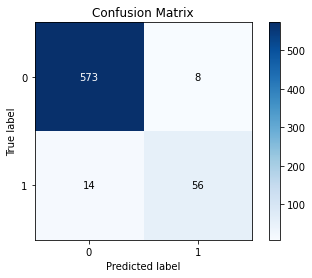

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       581
           1       0.88      0.80      0.84        70

    accuracy                           0.97       651
   macro avg       0.93      0.89      0.91       651
weighted avg       0.97      0.97      0.97       651
 



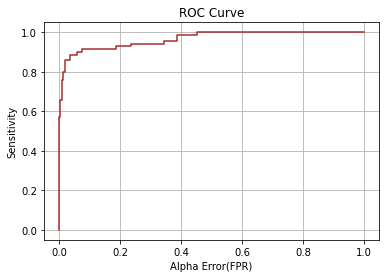

ROCAUC score for Voter: 0.9662650602409638


In [98]:
vote = VotingClassifier([('lg',LogisticRegression()),('kn',KNeighborsClassifier(n_neighbors=4)),('n',GaussianNB())],voting='soft')
vote.fit(xtr[feat],ytr)

yvote = vote.predict(xte[feat])
yprobvote = vote.predict_proba(xte[feat])[:,1]

# Check for Bias:
print('Checking for Bias:')
print('Accuracy scores on training set =',cross_val_score(vote,xtr[feat],ytr,cv=5,scoring = 'accuracy'))
print()

# Check for Variance:
print('Checking for Variance:')
print('Train Accuracy =',vote.score(xtr[feat],ytr))
print('Test Accuracy =',vote.score(xte[feat],yte))
print()

# Evaluating Model Perfomance on Test:
# Confusion Matrix:
skplt.metrics.plot_confusion_matrix(yte,yvote)
plt.show()
# Classification Report:
print('Classification Report:\n',classification_report(yte,yvote),'\n')
# ROC Curve:
avote,sensvote,thvote = roc_curve(yte,yprobvote)
plt.plot(avote,sensvote,color='brown')
plt.title('ROC Curve')
plt.xlabel('Alpha Error(FPR)')
plt.ylabel('Sensitivity')
plt.grid()
plt.show()
# Area under ROC:
print('ROCAUC score for Voter:',roc_auc_score(yte,yprobvote))

Random Forest:

Checking for Bias:
Accuracy scores on training set = [0.98357664 0.99634369 0.98903108 0.98720293 0.99085923]

Checking for Variance:
Train Accuracy = 1.0
Test Accuracy = 0.978494623655914



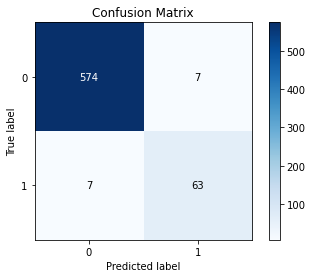

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       581
           1       0.90      0.90      0.90        70

    accuracy                           0.98       651
   macro avg       0.94      0.94      0.94       651
weighted avg       0.98      0.98      0.98       651
 



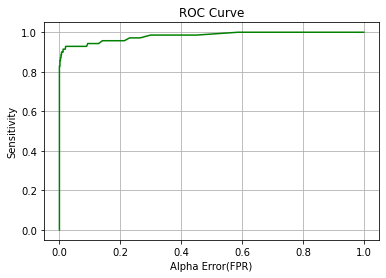

ROCAUC score for Random Forest: 0.9814236537988691


In [102]:
rf = RandomForestClassifier()
rf.fit(xtr[feat],ytr)

yrf = rf.predict(xte[feat])
yprobrf = rf.predict_proba(xte[feat])[:,1]

# Check for Bias:
print('Checking for Bias:')
print('Accuracy scores on training set =',cross_val_score(rf,xtr[feat],ytr,cv=5,scoring = 'accuracy'))
print()

# Check for Variance:
print('Checking for Variance:')
print('Train Accuracy =',rf.score(xtr[feat],ytr))
print('Test Accuracy =',rf.score(xte[feat],yte))
print()

# Evaluating Model Perfomance on Test:
# Confusion Matrix:
skplt.metrics.plot_confusion_matrix(yte,yrf)
plt.show()
# Classification Report:
print('Classification Report:\n',classification_report(yte,yrf),'\n')
# ROC Curve:
arf,sensrf,thrf = roc_curve(yte,yprobrf)
plt.plot(arf,sensrf,color='green')
plt.title('ROC Curve')
plt.xlabel('Alpha Error(FPR)')
plt.ylabel('Sensitivity')
plt.grid()
plt.show()
# Area under ROC:
print('ROCAUC score for Random Forest:',roc_auc_score(yte,yprobrf))

Xgboost:

Checking for Bias:
Accuracy scores on training set = [0.98175182 0.99451554 0.98720293 0.99085923 0.99085923]

Checking for Variance:
Train Accuracy = 1.0
Test Accuracy = 0.978494623655914



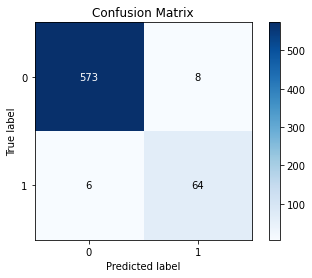

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       581
           1       0.89      0.91      0.90        70

    accuracy                           0.98       651
   macro avg       0.94      0.95      0.94       651
weighted avg       0.98      0.98      0.98       651
 



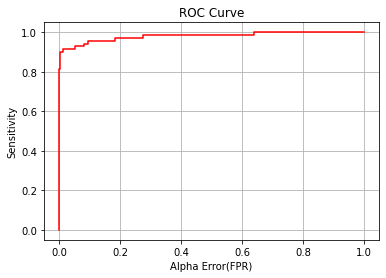

ROCAUC score for Xgboost: 0.9806491271207278


In [103]:
xgb = XGBClassifier(eval_metric='error')
xgb.fit(xtr[feat],ytr)

yxgb = xgb.predict(xte[feat])
yprobxgb = xgb.predict_proba(xte[feat])[:,1]

# Check for Bias:
print('Checking for Bias:')
print('Accuracy scores on training set =',cross_val_score(xgb,xtr[feat],ytr,cv=5,scoring = 'accuracy'))
print()

# Check for Variance:
print('Checking for Variance:')
print('Train Accuracy =',xgb.score(xtr[feat],ytr))
print('Test Accuracy =',xgb.score(xte[feat],yte))
print()

# Evaluating Base Model Perfomance on Test:
# Confusion Matrix:
skplt.metrics.plot_confusion_matrix(yte,yxgb)
plt.show()
# Classification Report:
print('Classification Report:\n',classification_report(yte,yxgb),'\n')
# ROC Curve:
axgb,sensxgb,thxgb = roc_curve(yte,yprobxgb)
plt.plot(axgb,sensxgb,color='red')
plt.title('ROC Curve')
plt.xlabel('Alpha Error(FPR)')
plt.ylabel('Sensitivity')
plt.grid()
plt.show()
# Area under ROC:
print('ROCAUC score for Xgboost:',roc_auc_score(yte,yprobxgb))

###### Selecting Model 2:

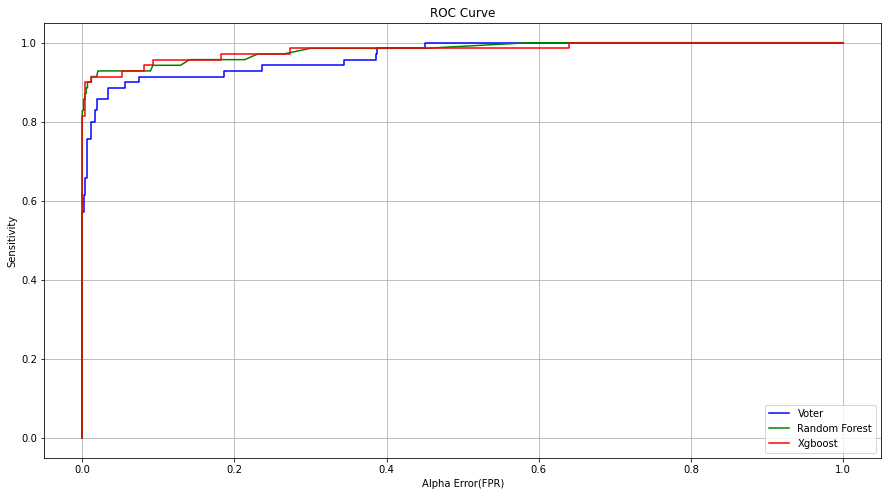

ROCAUC score for Voter: 0.9662650602409638
ROCAUC score for Random Forest: 0.9814236537988691
ROCAUC score for Xgboost: 0.9806491271207278


In [104]:
plt.figure(figsize=(15,8))
# ROC Curve:
avote,sensvote,thvote = roc_curve(yte,yprobvote)
plt.plot(avote,sensvote,color='blue',label='Voter')

arf,sensrf,thrf = roc_curve(yte,yprobrf)
plt.plot(arf,sensrf,color='green',label='Random Forest')

axgb,sensxgb,thxgb = roc_curve(yte,yprobxgb)
plt.plot(axgb,sensxgb,color='red',label='Xgboost')

plt.title('ROC Curve')
plt.xlabel('Alpha Error(FPR)')
plt.ylabel('Sensitivity')
plt.legend()
plt.grid()
plt.show()

# Area under ROC:
print('ROCAUC score for Voter:',roc_auc_score(yte,yprobvote))
print('ROCAUC score for Random Forest:',roc_auc_score(yte,yprobrf))
print('ROCAUC score for Xgboost:',roc_auc_score(yte,yprobxgb))

###### Final Model 2 <=====> Random Forest

### Tuning the hyperparameters

In [157]:
paramrand = {'n_estimators':[60,100,120,150,200],
            'max_leaf_nodes':range(2,12),
            'max_depth':range(2,8),
            'class_weight':[None,0.01,0.1,1,2,5],
            'ccp_alpha':[0,0.001,0.01,0.1,0.5],
            'min_samples_split':[1,2,5,7],
            'min_samples_leaf':[1,2],
            'min_weight_fraction_leaf':[0.0,0.01,1,2,5]}

rand = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=10),param_distributions=paramrand,scoring='roc_auc')
rand.fit(xtr[feat],ytr)
print('Best Estimator:',rand.best_estimator_)
print('\nBest Score:',rand.best_score_)
print('\nBest Parameters:',rand.best_params_)

Best Estimator: RandomForestClassifier(ccp_alpha=0.01, max_depth=5, max_leaf_nodes=7,
                       min_weight_fraction_leaf=0.01, n_estimators=200,
                       random_state=10)

Best Score: 0.9947578004959858

Best Parameters: {'n_estimators': 200, 'min_weight_fraction_leaf': 0.01, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_leaf_nodes': 7, 'max_depth': 5, 'class_weight': None, 'ccp_alpha': 0.01}


In [158]:
# Grid Search:
paramgrid = {'max_depth':[2,3,4,5], 
             'max_leaf_nodes':[6,7,8,9],
             'min_samples_split':[5,6,7,8],
             'min_weight_fraction_leaf':[0,0.01,0.02,0.03]}
grid = GridSearchCV(estimator= RandomForestClassifier(ccp_alpha=0.01,n_estimators=200,
                       random_state=10),param_grid=paramgrid,scoring='roc_auc')
grid.fit(xtr[feat],ytr)
print('Best Estimator:',grid.best_estimator_)
print('\nBest Score:',grid.best_score_)
print('\nBest Parameters:',grid.best_params_)

Best Estimator: RandomForestClassifier(ccp_alpha=0.01, max_depth=5, max_leaf_nodes=9,
                       min_samples_split=5, min_weight_fraction_leaf=0,
                       n_estimators=200, random_state=10)

Best Score: 0.9950809211744798

Best Parameters: {'max_depth': 5, 'max_leaf_nodes': 9, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0}


Checking for Bias:
Accuracy scores on training set = [0.96167883 0.96709324 0.96343693 0.96709324 0.96343693]

Checking for Variance:
Train Accuracy = 0.9674707602339181
Test Accuracy = 0.9723502304147466



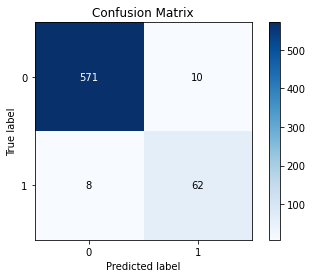

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       581
           1       0.86      0.89      0.87        70

    accuracy                           0.97       651
   macro avg       0.92      0.93      0.93       651
weighted avg       0.97      0.97      0.97       651
 



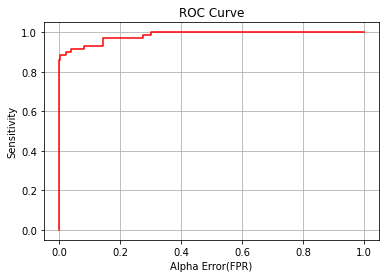

ROCAUC score for Model 2: 0.9835751167937055


In [159]:
# Final version of Model 2:
model2 = RandomForestClassifier(ccp_alpha=0.01, max_depth=5, max_leaf_nodes=9,
                       min_samples_split=5, min_weight_fraction_leaf=0,
                       n_estimators=200, random_state=10)

model2.fit(xtr[feat],ytr)

ymodel2 = model2.predict(xte[feat])
yprobmodel2 = model2.predict_proba(xte[feat])[:,1]

# Check for Bias:
print('Checking for Bias:')
print('Accuracy scores on training set =',cross_val_score(model2,xtr[feat],ytr,cv=5,scoring = 'accuracy'))
print()

# Check for Variance:
print('Checking for Variance:')
print('Train Accuracy =',model2.score(xtr[feat],ytr))
print('Test Accuracy =',model2.score(xte[feat],yte))
print()

# Evaluating Model 2 Perfomance on Test:
# Confusion Matrix:
skplt.metrics.plot_confusion_matrix(yte,ymodel2)
plt.show()
# Classification Report:
print('Classification Report:\n',classification_report(yte,ymodel2),'\n')
# ROC Curve:
am2,sensm2,thm2 = roc_curve(yte,yprobmodel2)
plt.plot(am2,sensm2,color='red')
plt.title('ROC Curve')
plt.xlabel('Alpha Error(FPR)')
plt.ylabel('Sensitivity')
plt.grid()
plt.show()
# Area under ROC:
print('ROCAUC score for Model 2:',roc_auc_score(yte,yprobmodel2))

# Model 3

 Model made from all the features after grouping numeric features and applying PCA on the groups

### Feature Engineering 

###### Dimensionality Reduction:

Grouping : As a step prior to feature engineering, numeric features are grouped based on the of financial attributes they indicate as follows:

Group 1(Assests & Equity),
Group 2(Earnings),
Group 3(Profits),
Group 4(Sales),
Group 5(Expenses),
Group 6(Loss & Liablities),
Group 7(Financial Security)

In [160]:
# Each groups will be decomposed using PCA
from sklearn.decomposition import PCA

Group 1: Features that talk about attributes like Net Worth, Inventory, Shares and what the Cash Flow here looks like.

In [161]:
# Inventory/Shares/Equity/Assets)
group1 = [' Inventory/Working Capital',' Inventory Turnover Rate (times)',' Inventory and accounts receivable/Net value',
          ' Total Asset Growth Rate',' Net worth/Assets',' Fixed Assets to Assets',' Quick Assets/Total Assets',
          ' Current Assets/Total Assets',' No-credit Interval',' Total assets to GNP price',' Cash/Total Assets',
          ' Cash Flow to Total Assets',' CFO to Assets',' Working Capital to Total Assets',' Cash Flow to Equity',
          ' Working Capital/Equity',' Net Value Per Share (B)',' Net Value Per Share (A)',' Net Value Per Share (C)']

# Train Set:
asset_train = xtr[group1] 
print('Train :',asset_train.shape)

# Test Set:
asset_test = xte[group1] 
print('Test :',asset_test.shape)

Train : (2736, 19)
Test : (651, 19)


In [162]:
# Aplying PCA on Group 1:
pc1 = PCA()

# Train:
asset_train = pd.DataFrame(pc1.fit_transform(asset_train))
asset_train = pd.DataFrame(asset_train.values,columns=['Asset '+str(i+1) for i in asset_train.columns])

# Test
asset_test = pd.DataFrame(pc1.transform(asset_test))
asset_test = pd.DataFrame(asset_test.values,columns=['Asset '+str(i+1) for i in asset_test.columns])

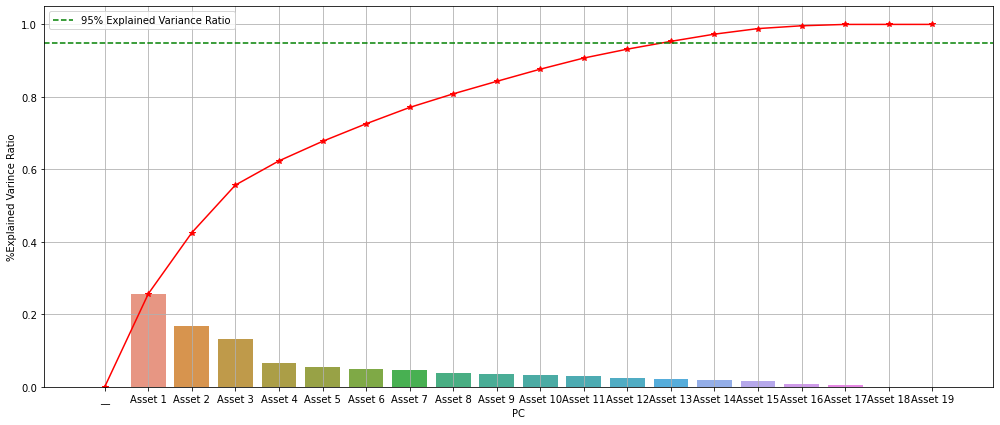

In [163]:
# Checking scree plot:
e1 = np.insert(pc1.explained_variance_ratio_,0,0)
ce1 = np.cumsum(e1)
scree1 = pd.DataFrame({'%Explained Varince Ratio':e1,'%Cumulative Explained Variance Ratio':ce1}).reset_index().rename({'index':'PC'},axis=1)
scree1['PC'] = ['Asset '+str(i) for i in scree1['PC']]
scree1['PC'].replace('Asset 0','__',inplace=True)

plt.figure(figsize=(17,7))
sns.barplot(scree1['PC'],scree1['%Explained Varince Ratio'])
plt.plot(scree1['%Cumulative Explained Variance Ratio'],marker='*',color='red')
plt.axhline(0.95,color='green',linestyle='--',label='95% Explained Variance Ratio')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [164]:
# PCA with 13 components:
pc1 = PCA(n_components=13)
# Train:
asset_train = pd.DataFrame(pc1.fit_transform(asset_train))
asset_train = pd.DataFrame(asset_train.values,columns=['Asset '+str(i+1) for i in asset_train.columns])
# Test:
asset_test = pd.DataFrame(pc1.transform(asset_test))
asset_test = pd.DataFrame(asset_test.values,columns=['Asset '+str(i+1) for i in asset_test.columns])

In [165]:
# Train
asset_train.head()

Asset 1   Asset 2   Asset 3   Asset 4   Asset 5   Asset 6   Asset 7  \
0 -0.198193  0.017769  2.211168  0.647228 -0.428751  0.047476 -0.554421   
1  0.772097 -0.874195 -2.048677  1.326477 -1.208682 -0.178026  0.408064   
2  1.321453  0.766689 -0.840867 -0.721341 -1.339988  3.083985  0.120648   
3 -0.639211  0.034818  0.029221 -0.446905  1.136941 -0.930657 -0.389461   
4  0.505039  0.260452  1.530636  0.011707  0.476458 -0.162790 -0.896485   

    Asset 8   Asset 9  Asset 10  Asset 11  Asset 12  Asset 13  
0  1.482555  0.706818 -0.206703  0.060671 -0.487708 -0.224874  
1 -0.313285  0.186504  0.384272  0.081253  1.500424  0.884692  
2 -0.604593 -1.011973  2.138636  0.224040 -2.286482 -1.960259  
3 -0.111083 -0.216823  0.292338 -0.098861 -0.463286  0.159053  
4  0.194681 -0.335303  0.558101 -0.285063  0.158498 -0.318690

In [166]:
# Test
asset_test.head()

Asset 1   Asset 2   Asset 3   Asset 4   Asset 5   Asset 6   Asset 7  \
0 -1.632065 -0.152555 -0.596122 -1.173244  0.409856  0.808356 -0.195184   
1 -1.024057 -0.180159  1.458111 -0.080419 -0.066974 -0.108822 -0.506482   
2 -0.255743 -0.011771  1.325279 -0.080115 -0.496543  0.110500  0.492251   
3 -1.559695 -0.014586  0.711968 -0.605828 -0.073357  0.451822  0.660393   
4  0.482297  0.155207  0.852090 -0.282418  0.123027 -0.815094  0.916760   

    Asset 8   Asset 9  Asset 10  Asset 11  Asset 12  Asset 13  
0 -1.327783  0.313200 -0.402405 -0.040841  0.047850  0.187081  
1  1.320906  1.334627 -0.958716  0.981531 -1.147396 -0.717903  
2 -1.107355  1.135354 -0.842829 -0.320801 -1.312770 -0.532876  
3 -0.854622  0.396567 -0.362796 -0.074931  0.498281  1.003808  
4 -1.345261  0.137419 -0.056770 -0.477135 -0.652081 -0.669713

Group 2: Features that talk about attributes like Income, how companies are taxed based on thier incomes, Earnings from shares etc.

In [167]:
group2 = [' Total income/Total expense',' Operating profit/Paid-in capital',' Cash Reinvestment %',' Non-industry income and expenditure/revenue',
       ' Accounts Receivable Turnover',' Average Collection Days',' Tax rate (A)',' Pre-tax net Interest Rate',' After-tax net Interest Rate',
       ' Continuous interest rate (after tax)'," Net Income to Stockholder's Equity",' Net Income to Total Assets',' Cash Flow Per Share',
       ' Persistent EPS in the Last Four Seasons',' Revenue Per Share (Yuan ¥)',' Total Asset Return Growth Rate Ratio']  
# Train:
earning_train = xtr[group2]
print('Train:',earning_train.shape)
# Test:
earning_test = xte[group2]
print('Train:',earning_test.shape)

Train: (2736, 16)
Train: (651, 16)


In [168]:
# Aplying PCA on Group 2:
pc2 = PCA()
#Train:
earning_train = pd.DataFrame(pc2.fit_transform(earning_train))
earning_train = pd.DataFrame(earning_train.values,columns=['Earning'+str(i+1) for i in earning_train.columns])
#Test:
earning_test = pd.DataFrame(pc2.transform(earning_test))
earning_test = pd.DataFrame(earning_test.values,columns=['Earning'+str(i+1) for i in earning_test.columns])

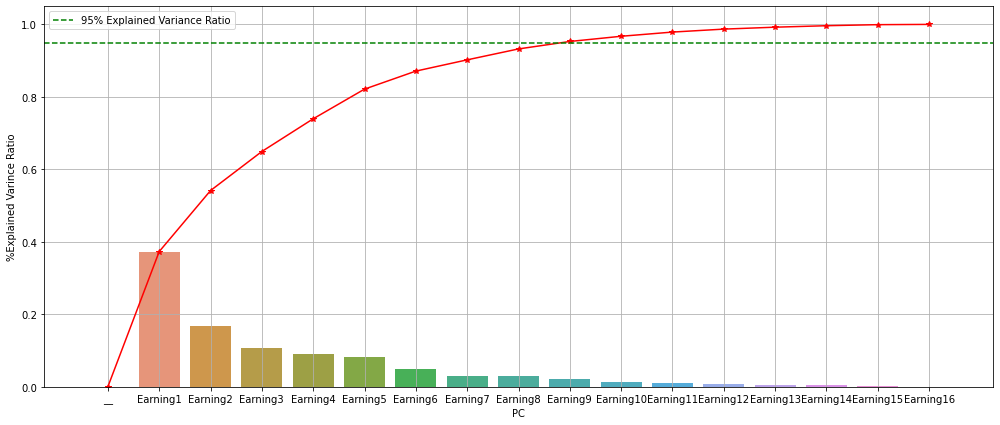

In [169]:
# Checking scree plot:
e2 = np.insert(pc2.explained_variance_ratio_,0,0)
ce2 = np.cumsum(e2)
scree2 = pd.DataFrame({'%Explained Varince Ratio':e2,'%Cumulative Explained Variance Ratio':ce2}).reset_index().rename({'index':'PC'},axis=1)
scree2['PC'] = ['Earning'+str(i) for i in scree2['PC']]
scree2['PC'].replace('Earning0','__',inplace=True)

plt.figure(figsize=(17,7))
sns.barplot(scree2['PC'],scree2['%Explained Varince Ratio'])
plt.plot(scree2['%Cumulative Explained Variance Ratio'],marker='*',color='red')
plt.axhline(0.95,color='green',linestyle='--',label='95% Explained Variance Ratio')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [170]:
# PCA with 9 components:
pc2 = PCA(n_components=9)
# Train:
earning_train = pd.DataFrame(pc2.fit_transform(earning_train))
earning_train = pd.DataFrame(earning_train.values,columns=['Earning'+str(i+1) for i in earning_train.columns])
# Test:
earning_test = pd.DataFrame(pc2.transform(earning_test))
earning_test = pd.DataFrame(earning_test.values,columns=['Earning'+str(i+1) for i in earning_test.columns])

In [171]:
# Train
earning_train.head()

Earning1  Earning2  Earning3  Earning4  Earning5  Earning6  Earning7  \
0 -2.201202  1.264239 -0.089559 -0.285076  0.343294  0.519299  0.400123   
1 -0.975986 -0.440840 -1.376543 -0.371399 -2.278711  1.872561  1.133529   
2  3.849831 -2.378146  1.233072  2.069910  0.898049  0.511455 -0.712137   
3 -0.702412  0.087266 -0.213362  0.424679 -0.892000  0.505832 -2.442915   
4 -1.112771  0.505841  0.240441 -0.190955  0.586614  0.941163 -1.249343   

   Earning8  Earning9  
0 -0.672742  0.352885  
1  2.802378 -0.567025  
2 -1.033489  0.202263  
3  1.035510 -0.056561  
4  0.100171  0.800112

In [172]:
# Test
earning_test.head()

Earning1  Earning2  Earning3  Earning4  Earning5  Earning6  Earning7  \
0 -0.766802  0.151133  0.282167 -0.257146  0.734559  0.002482 -0.125361   
1 -2.398662  1.207040 -0.232257  0.042977  0.136213 -0.123367 -0.406604   
2 -0.792325  0.119189  0.129348  0.047067 -0.021598 -0.195036 -0.242333   
3 -3.211768  0.865356 -0.630697 -1.622460  1.994227 -0.698158 -0.815824   
4  2.578972 -0.734524  0.336518 -1.781292  2.595200 -1.501521 -0.096199   

   Earning8  Earning9  
0  0.020464  0.276663  
1 -0.309958 -0.365112  
2 -0.116047 -0.049202  
3  0.069679 -1.287051  
4 -0.382170  0.358708

Group 3: Features that talk about Profit related attributes.

In [173]:
group3 = [' ROA(C) before interest and depreciation before interest',' ROA(A) before interest and % after tax',
          ' ROA(B) before interest and depreciation after tax',' Operating Profit Rate',' Operating profit per person',
          ' Net profit before tax/Paid-in capital',' Operating Profit Growth Rate',' Continuous Net Profit Growth Rate',
          ' After-tax Net Profit Growth Rate',' Regular Net Profit Growth Rate',' Net Value Growth Rate',
          ' Operating Profit Per Share (Yuan ¥)',' Per Share Net profit before tax (Yuan ¥)']  
# Train
profit_train = xtr[group3]
print('Train:',profit_train.shape)
# Test
profit_test = xte[group3]
print('Test:',profit_test.shape)

Train: (2736, 13)
Test: (651, 13)


In [174]:
# Aplying PCA on Group 3:
pc3 = PCA()
# Train:
profit_train = pd.DataFrame(pc3.fit_transform(profit_train))
profit_train = pd.DataFrame(profit_train.values,columns=['Profits '+str(i+1) for i in profit_train.columns])
# Test:
profit_test= pd.DataFrame(pc3.transform(profit_test))
profit_test = pd.DataFrame(profit_test.values,columns=['Profits '+str(i+1) for i in profit_test.columns])

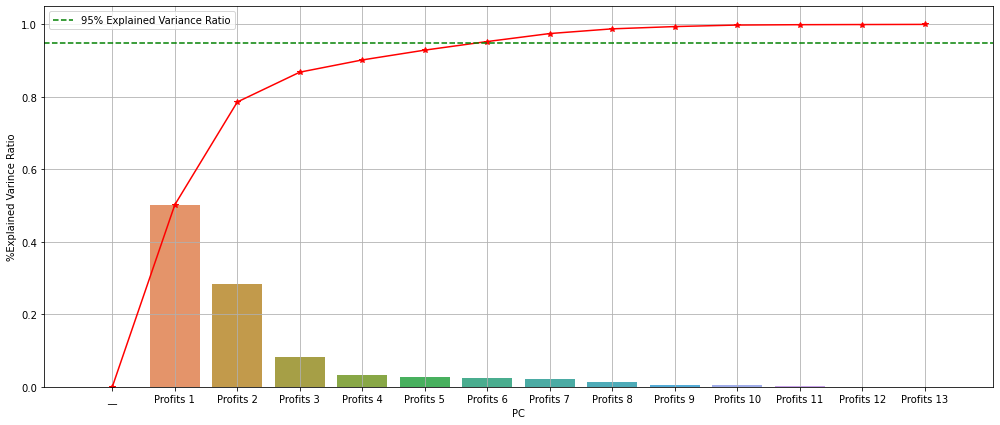

In [175]:
# Checking scree plot:
e3 = np.insert(pc3.explained_variance_ratio_,0,0)
ce3 = np.cumsum(e3)
scree3 = pd.DataFrame({'%Explained Varince Ratio':e3,'%Cumulative Explained Variance Ratio':ce3}).reset_index().rename({'index':'PC'},axis=1)
scree3['PC'] = ['Profits '+str(i) for i in scree3['PC']]
scree3['PC'].replace('Profits 0','__',inplace=True)

plt.figure(figsize=(17,7))
sns.barplot(scree3['PC'],scree3['%Explained Varince Ratio'])
plt.plot(scree3['%Cumulative Explained Variance Ratio'],marker='*',color='red')
plt.axhline(0.95,color='green',linestyle='--',label='95% Explained Variance Ratio')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [176]:
# PCA with 7 components:
pc3 = PCA(n_components=6)
# Train:
profit_train = pd.DataFrame(pc3.fit_transform(profit_train))
profit_train = pd.DataFrame(profit_train.values,columns=['Profits '+str(i+1) for i in profit_train.columns])
# Test:
profit_test = pd.DataFrame(pc3.transform(profit_test))
profit_test = pd.DataFrame(profit_test.values,columns=['Profits '+str(i+1) for i in profit_test.columns])

In [177]:
# Train
profit_train.head()

Profits 1  Profits 2  Profits 3  Profits 4  Profits 5  Profits 6
0  -2.705006   1.563223   0.131602   0.194513  -0.380957   0.178457
1  -0.623641   0.122389  -0.035278   0.063973   0.036038  -0.061698
2   4.938605  -3.365048  -0.224649   0.893989   0.377555   0.375743
3   0.147315  -0.478785  -0.098873  -0.131096   0.105546  -0.044158
4  -0.815119   0.323376   0.013019  -0.053905  -0.029156  -0.035165

In [178]:
# Test:
profit_test.head()

Profits 1  Profits 2  Profits 3  Profits 4  Profits 5  Profits 6
0  -2.694068  -3.565701  -0.203364  -1.544821  -4.757134   3.149803
1  -2.795168   1.552988   0.146130   0.110297  -0.390363   0.107284
2  -0.977766   0.343175  -0.000732   0.174497  -0.167963  -0.010425
3  -2.395146   1.227119   0.033321  -1.136531   0.321059  -0.109294
4   2.003359  -1.554521  -0.244909  -1.124223   0.719226  -0.197505

Group 4: Features that talk about revenue and turnover from Sales.

In [179]:
group4 = [' Operating Gross Margin',' Realized Sales Gross Margin',' Gross Profit to Sales',' Current Asset Turnover Rate',
          ' Cash Turnover Rate',' Revenue per person',' Total Asset Turnover',' Quick Asset Turnover Rate',
          ' Fixed Assets Turnover Frequency',' Working capitcal Turnover Rate',' Net Worth Turnover Rate (times)',' Cash Flow to Sales',
          ' Realized Sales Gross Profit Growth Rate',]
# Train
sales_train = xtr[group4]
print('Train:',sales_train.shape)
# Test
sales_test = xte[group4]
print('Test:',sales_test.shape)

Train: (2736, 13)
Test: (651, 13)


In [180]:
# Aplying PCA on Group 4:
pc4 = PCA()
# Train:
sales_train = pd.DataFrame(pc4.fit_transform(sales_train))
sales_train = pd.DataFrame(sales_train.values,columns=['Sales '+str(i+1) for i in sales_train.columns])
# Test:
sales_test = pd.DataFrame(pc4.transform(sales_test))
sales_test = pd.DataFrame(sales_test.values,columns=['Sales '+str(i+1) for i in sales_test.columns])

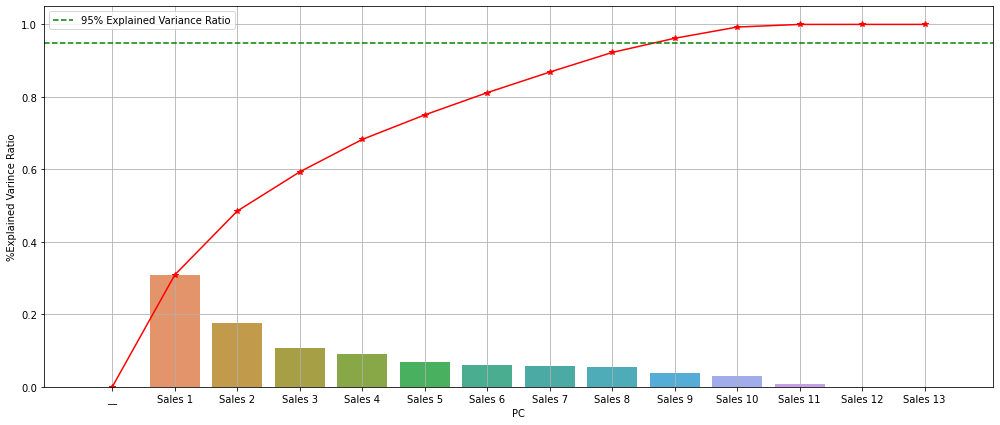

In [181]:
# Checking scree plot:
e4 = np.insert(pc4.explained_variance_ratio_,0,0)
ce4 = np.cumsum(e4)
scree4 = pd.DataFrame({'%Explained Varince Ratio':e4,'%Cumulative Explained Variance Ratio':ce4}).reset_index().rename({'index':'PC'},axis=1)
scree4['PC'] = ['Sales '+str(i) for i in scree4['PC']]
scree4['PC'].replace('Sales 0','__',inplace=True)

plt.figure(figsize=(17,7))
sns.barplot(scree4['PC'],scree4['%Explained Varince Ratio'])
plt.plot(scree4['%Cumulative Explained Variance Ratio'],marker='*',color='red')
plt.axhline(0.95,color='green',linestyle='--',label='95% Explained Variance Ratio')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [182]:
# PCA with 9 components:
pc4 = PCA(n_components=9)
# Train:
sales_train = pd.DataFrame(pc4.fit_transform(sales_train))
sales_train = pd.DataFrame(sales_train.values,columns=['Sales '+str(i+1) for i in sales_train.columns])
# Test:
sales_test = pd.DataFrame(pc4.transform(sales_test))
sales_test = pd.DataFrame(sales_test.values,columns=['Sales '+str(i+1) for i in sales_test.columns])

In [183]:
# Train
sales_train.head()

Sales 1   Sales 2   Sales 3   Sales 4   Sales 5   Sales 6   Sales 7  \
0 -2.438278  0.186683  0.521130  0.206376 -1.552020 -1.021470 -1.441921   
1  1.020413 -3.866042  0.061109  0.714243  0.696495  0.850686 -0.404355   
2 -0.236518 -0.488746 -1.072022 -0.398294 -2.001505 -1.115457 -0.269330   
3 -0.166283  1.699204 -0.230072 -1.229229  0.420258  1.701706  1.606901   
4 -0.397920 -0.227080  0.099485  0.144206 -1.031982 -1.266349 -0.575303   

    Sales 8   Sales 9  
0 -1.398824  0.367888  
1  0.675549  0.767109  
2 -1.341028  0.101653  
3  0.319577  0.312366  
4 -1.089453  0.685872

In [184]:
# Test
sales_test.head()

Sales 1   Sales 2   Sales 3   Sales 4   Sales 5   Sales 6   Sales 7  \
0  0.385089 -0.103934  0.182662 -1.038605 -1.165326 -0.144340  1.077726   
1 -1.958256  1.192637  0.053817  0.074795  0.533746 -1.154285 -0.304313   
2 -1.905245  0.190961  0.235522  0.392975 -1.791375 -1.205406 -1.222900   
3 -0.359563  1.414892 -0.183484 -0.419191  1.569543 -0.295369  0.303079   
4  4.145083  3.621685 -0.746472  0.776061 -0.316718 -0.083867 -0.767169   

    Sales 8   Sales 9  
0  0.071288 -1.462306  
1  0.304877  1.111397  
2 -1.082728  0.868572  
3 -0.241370  0.187041  
4  1.676414  1.078955

Group 5: Features that talk about various Expenses.

In [185]:
group5 = [' Total expense/Assets',' Operating Expense Rate',' Allocation rate per person',' Research and development expense rate']
# Train
expense_train = xtr[group5]
print('Train:',expense_train.shape)
# Test
expense_test = xte[group5]
print('Test:',expense_test.shape)

Train: (2736, 4)
Test: (651, 4)


In [186]:
# Aplying PCA on Group 5:
pc5 = PCA()
# Train:
expense_train = pd.DataFrame(pc5.fit_transform(expense_train))
expense_train = pd.DataFrame(expense_train.values,columns=['Expense '+str(i+1) for i in expense_train.columns])
# Test:
expense_test = pd.DataFrame(pc5.transform(expense_test))
expense_test = pd.DataFrame(expense_test.values,columns=['Expense '+str(i+1) for i in expense_test.columns])

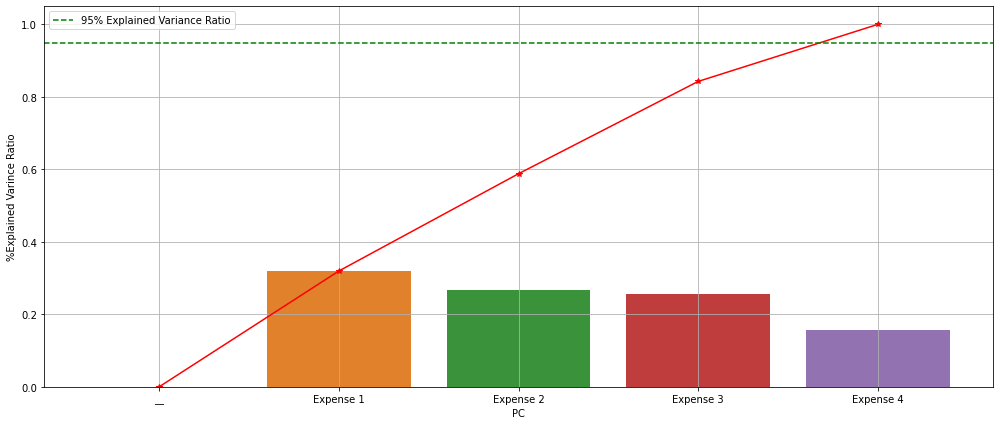

In [187]:
# Checking scree plot:
e5 = np.insert(pc5.explained_variance_ratio_,0,0)
ce5 = np.cumsum(e5)
scree5 = pd.DataFrame({'%Explained Varince Ratio':e5,'%Cumulative Explained Variance Ratio':ce5}).reset_index().rename({'index':'PC'},axis=1)
scree5['PC'] = ['Expense '+str(i) for i in scree5['PC']]
scree5['PC'].replace('Expense 0','__',inplace=True)

plt.figure(figsize=(17,7))
sns.barplot(scree5['PC'],scree5['%Explained Varince Ratio'])
plt.plot(scree5['%Cumulative Explained Variance Ratio'],marker='*',color='red')
plt.axhline(0.95,color='green',linestyle='--',label='95% Explained Variance Ratio')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [188]:
# Train
expense_train.head()

Expense 1  Expense 2  Expense 3  Expense 4
0  -0.025919  -0.739526   1.435976  -0.293609
1  -0.349791   0.606778  -0.923836  -0.747732
2  -2.226224   1.541414   0.579441  -1.551788
3   0.190118  -1.066068   1.737484  -0.185399
4   0.039934  -0.101203   0.192871   0.892165

In [189]:
# Test
expense_test.head()

Expense 1  Expense 2  Expense 3  Expense 4
0   0.652356  -0.753344  -0.055919  -1.148132
1   0.641208  -0.953031   0.976876   1.501151
2  -0.492068  -0.139959   0.992192  -0.614722
3   0.825813  -1.168630   0.991557   1.108335
4   0.438427   0.050055  -0.945133   0.761561

Group 6: Features that talk about hurdles like Loss,Liabilities etc.

In [190]:
group6 = [' Retained Earnings to Total Assets',' Cash Flow to Liability',' Current Liability to Liability',' Current Liabilities/Liability'] 
# Train
lois_train = xtr[group6]
print('Train:',lois_train.shape)
# Test
lois_test = xte[group6]
print('Train:',lois_test.shape)

Train: (2736, 4)
Train: (651, 4)


In [191]:
# Aplying PCA on Group 6:
pc6 = PCA()
# Train:
lois_train = pd.DataFrame(pc6.fit_transform(lois_train))
lois_train = pd.DataFrame(lois_train.values,columns=['Hurdle '+str(i+1) for i in lois_train.columns])
# Test:
lois_test = pd.DataFrame(pc6.transform(lois_test))
lois_test = pd.DataFrame(lois_test.values,columns=['Hurdle '+str(i+1) for i in lois_test.columns])

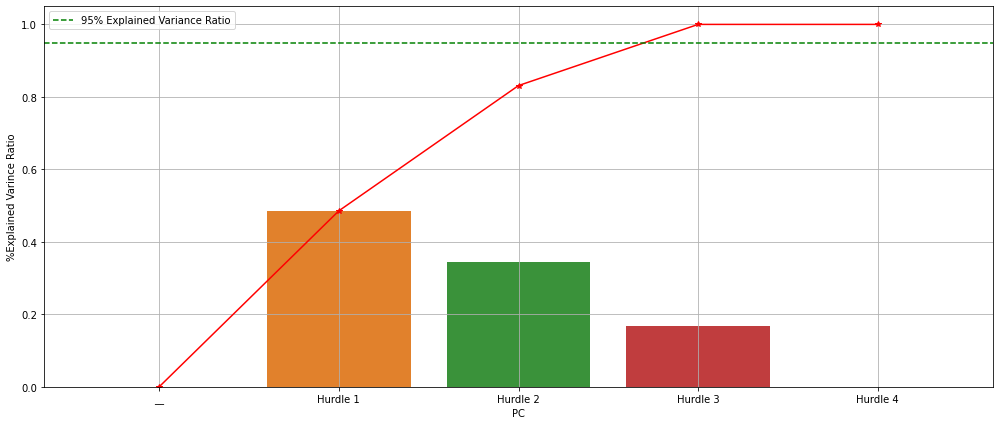

In [192]:
# Checking scree plot:
e6 = np.insert(pc6.explained_variance_ratio_,0,0)
ce6 = np.cumsum(e6)
scree6 = pd.DataFrame({'%Explained Varince Ratio':e6,'%Cumulative Explained Variance Ratio':ce6}).reset_index().rename({'index':'PC'},axis=1)
scree6['PC'] = ['Hurdle '+str(i) for i in scree6['PC']]
scree6['PC'].replace('Hurdle 0','__',inplace=True)

plt.figure(figsize=(17,7))
sns.barplot(scree6['PC'],scree6['%Explained Varince Ratio'])
plt.plot(scree6['%Cumulative Explained Variance Ratio'],marker='*',color='red')
plt.axhline(0.95,color='green',linestyle='--',label='95% Explained Variance Ratio')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [193]:
# PCA with 3 components:
pc6 = PCA(n_components=3)
# Train:
lois_train = pd.DataFrame(pc6.fit_transform(lois_train))
lois_train = pd.DataFrame(lois_train.values,columns=['Hurdle '+str(i+1) for i in lois_train.columns])
# Test:
lois_test = pd.DataFrame(pc6.transform(lois_test))
lois_test = pd.DataFrame(lois_test.values,columns=['Hurdle '+str(i+1) for i in lois_test.columns])

In [194]:
# Train
lois_train.head()

Hurdle 1  Hurdle 2  Hurdle 3
0  2.788006  0.560457 -0.293680
1 -1.469189  0.437549 -0.073133
2 -3.206518 -1.833564  0.650141
3  0.472457  0.048824 -0.138350
4  1.617891 -0.273882 -0.077031

In [195]:
# Test
lois_test.head()

Hurdle 1  Hurdle 2  Hurdle 3
0  0.027234  0.319620  0.315978
1  0.828410  0.809813 -0.285015
2  1.929129 -0.327061 -0.541685
3  0.666596  1.035967  0.124294
4  1.036297 -1.097382 -0.817603

Group 7: Features that talk about financial stability and security.

In [196]:
group7 = [' Interest Coverage Ratio (Interest expense to EBIT)',' Borrowing dependency',' Debt ratio %',' Current Ratio',                                           
          ' Total debt/Total net worth',' Quick Ratio',' Interest-bearing debt interest rate',' Long-term fund suitability ratio (A)',                    
          ' Contingent liabilities/Net worth',' Current Liability to Equity',' Liability to Equity',' Equity to Liability',                                      
          ' Current Liabilities/Equity',' Current Liability to Assets',' Current Liability to Current Assets',
          ' Long-term Liability to Current Assets',' Quick Assets/Current Liability',' Equity to Long-term Liability',
          ' Inventory/Current Liability',' Operating Funds to Liability',' Cash/Current Liability',' Cash flow rate',
          ' Interest Expense Ratio',' Degree of Financial Leverage (DFL)']
# Train
stab_train = xtr[group7]
print('Train:',stab_train.shape)
# Test
stab_test = xte[group7]
print('Test:',stab_test.shape)

Train: (2736, 24)
Test: (651, 24)


In [197]:
# Aplying PCA on Group 7:
pc7 = PCA()
# Train:
stab_train = pd.DataFrame(pc7.fit_transform(stab_train))
stab_train = pd.DataFrame(stab_train.values,columns=['Stability'+str(i+1) for i in stab_train.columns])
# Test:
stab_test = pd.DataFrame(pc7.transform(stab_test))
stab_test = pd.DataFrame(stab_test.values,columns=['Stability'+str(i+1) for i in stab_test.columns])

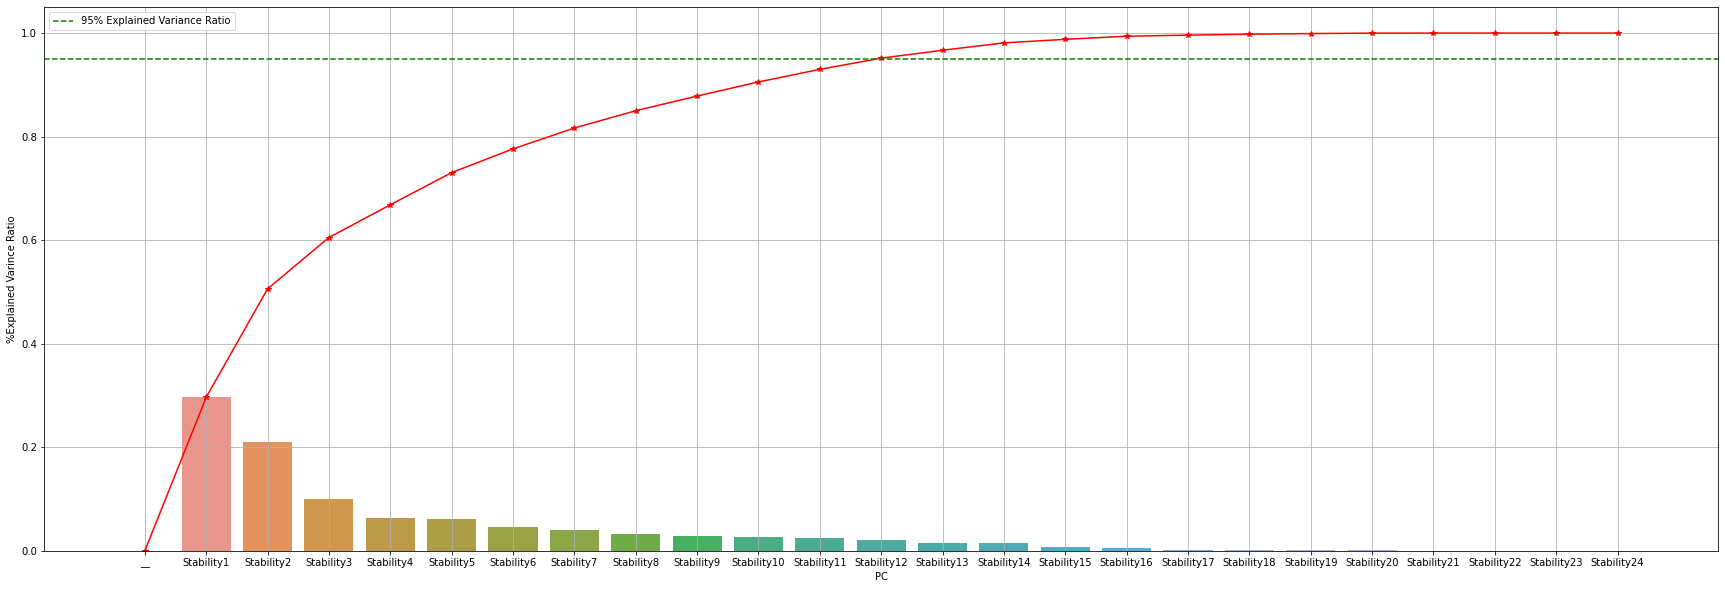

In [198]:
# Checking scree plot:
e7 = np.insert(pc7.explained_variance_ratio_,0,0)
ce7 = np.cumsum(e7)
scree7 = pd.DataFrame({'%Explained Varince Ratio':e7,'%Cumulative Explained Variance Ratio':ce7}).reset_index().rename({'index':'PC'},axis=1)
scree7['PC'] = ['Stability'+str(i) for i in scree7['PC']]
scree7['PC'].replace('Stability0','__',inplace=True)

plt.figure(figsize=(30,10))
sns.barplot(scree7['PC'],scree7['%Explained Varince Ratio'])
plt.plot(scree7['%Cumulative Explained Variance Ratio'],marker='*',color='red')
plt.axhline(0.95,color='green',linestyle='--',label='95% Explained Variance Ratio')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [199]:
# PCA with 12 components:
pc7 = PCA(n_components=12)
# Train:
stab_train = pd.DataFrame(pc7.fit_transform(stab_train))
stab_train = pd.DataFrame(stab_train.values,columns=['Stability'+str(i+1) for i in stab_train.columns])
# Test:
stab_test = pd.DataFrame(pc7.transform(stab_test))
stab_test = pd.DataFrame(stab_test.values,columns=['Stability'+str(i+1) for i in stab_test.columns])

In [200]:
# Train
stab_train.head()

Stability1  Stability2  Stability3  Stability4  Stability5  Stability6  \
0    0.760873    0.312141    0.246754    0.128243   -0.333291   -0.973113   
1    2.582937    1.327682    3.441310   -1.921363   -1.022848    1.776804   
2    0.461124    0.771359   -0.128105    0.283439    0.294436    0.316124   
3   -1.978394   -1.295019    2.121837   -0.744592   -0.816498    0.266381   
4    0.148740    0.363491    0.359858   -0.061066   -0.209079   -1.165169   

   Stability7  Stability8  Stability9  Stability10  Stability11  Stability12  
0    0.732635    0.109814   -0.627117     0.352654    -0.276445     0.036797  
1    0.381434   -0.261189   -0.495755    -1.048393    -0.712212     0.034879  
2   -0.218930   -0.960871    0.060533    -1.275533     0.212666    -0.206767  
3    0.214264   -0.137287    0.698618     0.999870    -0.692186     0.190839  
4   -0.374584    0.434654   -0.414386     0.076767    -0.263470    -0.124254

In [201]:
# Test
stab_test.head()

Stability1  Stability2  Stability3  Stability4  Stability5  Stability6  \
0   -2.253904   -1.574765    0.006104    0.078487   -0.207299   -0.719646   
1   -0.681089   -0.181752    0.138054    0.137789   -0.264059   -0.889564   
2   -1.830857   -1.238468    0.502585   -0.191546   -0.252783   -0.783777   
3   -1.760790   -1.235821   -0.247680    0.070590    0.204985    0.781676   
4   -1.458345   -0.903231   -0.854196    0.032843   -0.096154   -0.242253   

   Stability7  Stability8  Stability9  Stability10  Stability11  Stability12  
0   -0.014038   -0.187757    0.218361     0.125704    -0.274943    -0.083666  
1   -0.072674   -0.324978    0.406867     0.513844    -0.272549    -0.029553  
2   -0.270330    0.479247    0.093960     0.712508    -0.353207    -0.080686  
3   -0.090587   -0.314946    0.539554     0.369711     0.252398    -0.046747  
4   -0.148219    0.247745    0.553741     1.084053    -0.177998    -0.060723

In [202]:
# Dataset with Principal Components:
# Train:
pcdata_train = pd.concat([asset_train,earning_train,profit_train,sales_train,expense_train,lois_train,stab_train],axis=1)
print('Train:',pcdata_train.shape)
# Test:
pcdata_test = pd.concat([asset_test,earning_test,profit_test,sales_test,expense_test,lois_test,stab_test],axis=1)
print('Test:',pcdata_test.shape)

Train: (2736, 56)
Test: (651, 56)


In [203]:
# Train
pcdata_train.head()

Asset 1   Asset 2   Asset 3   Asset 4   Asset 5   Asset 6   Asset 7  \
0 -0.198193  0.017769  2.211168  0.647228 -0.428751  0.047476 -0.554421   
1  0.772097 -0.874195 -2.048677  1.326477 -1.208682 -0.178026  0.408064   
2  1.321453  0.766689 -0.840867 -0.721341 -1.339988  3.083985  0.120648   
3 -0.639211  0.034818  0.029221 -0.446905  1.136941 -0.930657 -0.389461   
4  0.505039  0.260452  1.530636  0.011707  0.476458 -0.162790 -0.896485   

    Asset 8   Asset 9  Asset 10  Asset 11  Asset 12  Asset 13  Earning1  \
0  1.482555  0.706818 -0.206703  0.060671 -0.487708 -0.224874 -2.201202   
1 -0.313285  0.186504  0.384272  0.081253  1.500424  0.884692 -0.975986   
2 -0.604593 -1.011973  2.138636  0.224040 -2.286482 -1.960259  3.849831   
3 -0.111083 -0.216823  0.292338 -0.098861 -0.463286  0.159053 -0.702412   
4  0.194681 -0.335303  0.558101 -0.285063  0.158498 -0.318690 -1.112771   

   Earning2  Earning3  Earning4  Earning5  Earning6  Earning7  Earning8  \
0  1.264239 -0.089559 -0.285076  0.343294  0.519299  0.400123 -0.672742   
1 -0.440840 -1.376543 -0.371399 -2.278711  1.872561  1.133529  2.802378   
2 -2.378146  1.233072  2.069910  0.898049  0.511455 -0.712137 -1.033489   
3  0.087266 -0.213362  0.424679 -0.892000  0.505832 -2.442915  1.035510   
4  0.505841  0.240441 -0.190955  0.586614  0.941163 -1.249343  0.100171   

   Earning9  Profits 1  Profits 2  Profits 3  Profits 4  Profits 5  Profits 6  \
0  0.352885  -2.705006   1.563223   0.131602   0.194513  -0.380957   0.178457   
1 -0.567025  -0.623641   0.122389  -0.035278   0.063973   0.036038  -0.061698   
2  0.202263   4.938605  -3.365048  -0.224649   0.893989   0.377555   0.375743   
3 -0.056561   0.147315  -0.478785  -0.098873  -0.131096   0.105546  -0.044158   
4  0.800112  -0.815119   0.323376   0.013019  -0.053905  -0.029156  -0.035165   

    Sales 1   Sales 2   Sales 3   Sales 4   Sales 5   Sales 6   Sales 7  \
0 -2.438278  0.186683  0.521130  0.206376 -1.552020 -1.021470 -1.441921   
1  1.020413 -3.866042  0.061109  0.714243  0.696495  0.850686 -0.404355   
2 -0.236518 -0.488746 -1.072022 -0.398294 -2.001505 -1.115457 -0.269330   
3 -0.166283  1.699204 -0.230072 -1.229229  0.420258  1.701706  1.606901   
4 -0.397920 -0.227080  0.099485  0.144206 -1.031982 -1.266349 -0.575303   

    Sales 8   Sales 9  Expense 1  Expense 2  Expense 3  Expense 4  Hurdle 1  \
0 -1.398824  0.367888  -0.025919  -0.739526   1.435976  -0.293609  2.788006   
1  0.675549  0.767109  -0.349791   0.606778  -0.923836  -0.747732 -1.469189   
2 -1.341028  0.101653  -2.226224   1.541414   0.579441  -1.551788 -3.206518   
3  0.319577  0.312366   0.190118  -1.066068   1.737484  -0.185399  0.472457   
4 -1.089453  0.685872   0.039934  -0.101203   0.192871   0.892165  1.617891   

   Hurdle 2  Hurdle 3  Stability1  Stability2  Stability3  Stability4  \
0  0.560457 -0.293680    0.760873    0.312141    0.246754    0.128243   
1  0.437549 -0.073133    2.582937    1.327682    3.441310   -1.921363   
2 -1.833564  0.650141    0.461124    0.771359   -0.128105    0.283439   
3  0.048824 -0.138350   -1.978394   -1.295019    2.121837   -0.744592   
4 -0.273882 -0.077031    0.148740    0.363491    0.359858   -0.061066   

   Stability5  Stability6  Stability7  Stability8  Stability9  Stability10  \
0   -0.333291   -0.973113    0.732635    0.109814   -0.627117     0.352654   
1   -1.022848    1.776804    0.381434   -0.261189   -0.495755    -1.048393   
2    0.294436    0.316124   -0.218930   -0.960871    0.060533    -1.275533   
3   -0.816498    0.266381    0.214264   -0.137287    0.698618     0.999870   
4   -0.209079   -1.165169   -0.374584    0.434654   -0.414386     0.076767   

   Stability11  Stability12  
0    -0.276445     0.036797  
1    -0.712212     0.034879  
2     0.212666    -0.206767  
3    -0.692186     0.190839  
4    -0.263470    -0.124254

In [204]:
# Test
pcdata_train.head()

Asset 1   Asset 2   Asset 3   Asset 4   Asset 5   Asset 6   Asset 7  \
0 -0.198193  0.017769  2.211168  0.647228 -0.428751  0.047476 -0.554421   
1  0.772097 -0.874195 -2.048677  1.326477 -1.208682 -0.178026  0.408064   
2  1.321453  0.766689 -0.840867 -0.721341 -1.339988  3.083985  0.120648   
3 -0.639211  0.034818  0.029221 -0.446905  1.136941 -0.930657 -0.389461   
4  0.505039  0.260452  1.530636  0.011707  0.476458 -0.162790 -0.896485   

    Asset 8   Asset 9  Asset 10  Asset 11  Asset 12  Asset 13  Earning1  \
0  1.482555  0.706818 -0.206703  0.060671 -0.487708 -0.224874 -2.201202   
1 -0.313285  0.186504  0.384272  0.081253  1.500424  0.884692 -0.975986   
2 -0.604593 -1.011973  2.138636  0.224040 -2.286482 -1.960259  3.849831   
3 -0.111083 -0.216823  0.292338 -0.098861 -0.463286  0.159053 -0.702412   
4  0.194681 -0.335303  0.558101 -0.285063  0.158498 -0.318690 -1.112771   

   Earning2  Earning3  Earning4  Earning5  Earning6  Earning7  Earning8  \
0  1.264239 -0.089559 -0.285076  0.343294  0.519299  0.400123 -0.672742   
1 -0.440840 -1.376543 -0.371399 -2.278711  1.872561  1.133529  2.802378   
2 -2.378146  1.233072  2.069910  0.898049  0.511455 -0.712137 -1.033489   
3  0.087266 -0.213362  0.424679 -0.892000  0.505832 -2.442915  1.035510   
4  0.505841  0.240441 -0.190955  0.586614  0.941163 -1.249343  0.100171   

   Earning9  Profits 1  Profits 2  Profits 3  Profits 4  Profits 5  Profits 6  \
0  0.352885  -2.705006   1.563223   0.131602   0.194513  -0.380957   0.178457   
1 -0.567025  -0.623641   0.122389  -0.035278   0.063973   0.036038  -0.061698   
2  0.202263   4.938605  -3.365048  -0.224649   0.893989   0.377555   0.375743   
3 -0.056561   0.147315  -0.478785  -0.098873  -0.131096   0.105546  -0.044158   
4  0.800112  -0.815119   0.323376   0.013019  -0.053905  -0.029156  -0.035165   

    Sales 1   Sales 2   Sales 3   Sales 4   Sales 5   Sales 6   Sales 7  \
0 -2.438278  0.186683  0.521130  0.206376 -1.552020 -1.021470 -1.441921   
1  1.020413 -3.866042  0.061109  0.714243  0.696495  0.850686 -0.404355   
2 -0.236518 -0.488746 -1.072022 -0.398294 -2.001505 -1.115457 -0.269330   
3 -0.166283  1.699204 -0.230072 -1.229229  0.420258  1.701706  1.606901   
4 -0.397920 -0.227080  0.099485  0.144206 -1.031982 -1.266349 -0.575303   

    Sales 8   Sales 9  Expense 1  Expense 2  Expense 3  Expense 4  Hurdle 1  \
0 -1.398824  0.367888  -0.025919  -0.739526   1.435976  -0.293609  2.788006   
1  0.675549  0.767109  -0.349791   0.606778  -0.923836  -0.747732 -1.469189   
2 -1.341028  0.101653  -2.226224   1.541414   0.579441  -1.551788 -3.206518   
3  0.319577  0.312366   0.190118  -1.066068   1.737484  -0.185399  0.472457   
4 -1.089453  0.685872   0.039934  -0.101203   0.192871   0.892165  1.617891   

   Hurdle 2  Hurdle 3  Stability1  Stability2  Stability3  Stability4  \
0  0.560457 -0.293680    0.760873    0.312141    0.246754    0.128243   
1  0.437549 -0.073133    2.582937    1.327682    3.441310   -1.921363   
2 -1.833564  0.650141    0.461124    0.771359   -0.128105    0.283439   
3  0.048824 -0.138350   -1.978394   -1.295019    2.121837   -0.744592   
4 -0.273882 -0.077031    0.148740    0.363491    0.359858   -0.061066   

   Stability5  Stability6  Stability7  Stability8  Stability9  Stability10  \
0   -0.333291   -0.973113    0.732635    0.109814   -0.627117     0.352654   
1   -1.022848    1.776804    0.381434   -0.261189   -0.495755    -1.048393   
2    0.294436    0.316124   -0.218930   -0.960871    0.060533    -1.275533   
3   -0.816498    0.266381    0.214264   -0.137287    0.698618     0.999870   
4   -0.209079   -1.165169   -0.374584    0.434654   -0.414386     0.076767   

   Stability11  Stability12  
0    -0.276445     0.036797  
1    -0.712212     0.034879  
2     0.212666    -0.206767  
3    -0.692186     0.190839  
4    -0.263470    -0.124254

Managed to reduce dimensionality of numeric features from 93 to 56.

### VIF to detect and remove Multicollinearity in the decomposed dataset

In [205]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
vif2 = [VIF(pcdata_train.values,i) for i in range(len(pcdata_train.columns))]
vif2 = pd.DataFrame(vif2,index=pcdata_train.columns,columns=['VIF'])
vif2

VIF
Asset 1       57.285673
Asset 2       44.241693
Asset 3       25.448672
Asset 4      375.359634
Asset 5      480.421816
Asset 6      178.714455
Asset 7       75.966553
Asset 8        9.139511
Asset 9        4.534416
Asset 10       4.984258
Asset 11       3.112108
Asset 12       7.763836
Asset 13       7.575144
Earning1      78.510224
Earning2      26.362358
Earning3       8.797807
Earning4       9.621427
Earning5       4.982606
Earning6       8.760928
Earning7      11.484739
Earning8       4.098073
Earning9       2.675867
Profits 1     50.077473
Profits 2     19.056070
Profits 3      1.525187
Profits 4      2.305423
Profits 5      1.844595
Profits 6      1.248511
Sales 1        5.750509
Sales 2       23.674491
Sales 3        2.499705
Sales 4        8.369802
Sales 5        2.614122
Sales 6        1.494954
Sales 7        2.007792
Sales 8        2.911083
Sales 9        1.552403
Expense 1    498.758997
Expense 2    491.261721
Expense 3    102.072983
Expense 4      3.984851
Hurdle 1       5.471925
Hurdle 2       8.396728
Hurdle 3       3.921431
Stability1    72.561762
Stability2    24.417723
Stability3     1.363774
Stability4     1.395748
Stability5     2.186986
Stability6     9.638167
Stability7    13.370507
Stability8     6.161577
Stability9     8.163963
Stability10   10.577688
Stability11    1.280571
Stability12    1.217853

In [206]:
# Filtering the components to remove components contributing to high multicollinearity with 9 as a cutoff for VIF:
comp = list(vif2[vif2['VIF']<9].index)
print('Number of remaining components:',len(comp))
print('\nRemaining Components:',comp)

Number of remaining components: 33

Remaining Components: ['Asset 9', 'Asset 10', 'Asset 11', 'Asset 12', 'Asset 13', 'Earning3', 'Earning5', 'Earning6', 'Earning8', 'Earning9', 'Profits 3', 'Profits 4', 'Profits 5', 'Profits 6', 'Sales 1', 'Sales 3', 'Sales 4', 'Sales 5', 'Sales 6', 'Sales 7', 'Sales 8', 'Sales 9', 'Expense 4', 'Hurdle 1', 'Hurdle 2', 'Hurdle 3', 'Stability3', 'Stability4', 'Stability5', 'Stability8', 'Stability9', 'Stability11', 'Stability12']


In [207]:
# Updating the decomposed dataset with these filtered components only:
# Train
pcdata_train = pcdata_train[comp]
print('Train:',pcdata_train.shape)
# Test
pcdata_test = pcdata_test[comp]
print('Test:',pcdata_test.shape)

Train: (2736, 33)
Test: (651, 33)


In [208]:
# Train
pcdata_train.head()

Asset 9  Asset 10  Asset 11  Asset 12  Asset 13  Earning3  Earning5  \
0  0.706818 -0.206703  0.060671 -0.487708 -0.224874 -0.089559  0.343294   
1  0.186504  0.384272  0.081253  1.500424  0.884692 -1.376543 -2.278711   
2 -1.011973  2.138636  0.224040 -2.286482 -1.960259  1.233072  0.898049   
3 -0.216823  0.292338 -0.098861 -0.463286  0.159053 -0.213362 -0.892000   
4 -0.335303  0.558101 -0.285063  0.158498 -0.318690  0.240441  0.586614   

   Earning6  Earning8  Earning9  Profits 3  Profits 4  Profits 5  Profits 6  \
0  0.519299 -0.672742  0.352885   0.131602   0.194513  -0.380957   0.178457   
1  1.872561  2.802378 -0.567025  -0.035278   0.063973   0.036038  -0.061698   
2  0.511455 -1.033489  0.202263  -0.224649   0.893989   0.377555   0.375743   
3  0.505832  1.035510 -0.056561  -0.098873  -0.131096   0.105546  -0.044158   
4  0.941163  0.100171  0.800112   0.013019  -0.053905  -0.029156  -0.035165   

    Sales 1   Sales 3   Sales 4   Sales 5   Sales 6   Sales 7   Sales 8  \
0 -2.438278  0.521130  0.206376 -1.552020 -1.021470 -1.441921 -1.398824   
1  1.020413  0.061109  0.714243  0.696495  0.850686 -0.404355  0.675549   
2 -0.236518 -1.072022 -0.398294 -2.001505 -1.115457 -0.269330 -1.341028   
3 -0.166283 -0.230072 -1.229229  0.420258  1.701706  1.606901  0.319577   
4 -0.397920  0.099485  0.144206 -1.031982 -1.266349 -0.575303 -1.089453   

    Sales 9  Expense 4  Hurdle 1  Hurdle 2  Hurdle 3  Stability3  Stability4  \
0  0.367888  -0.293609  2.788006  0.560457 -0.293680    0.246754    0.128243   
1  0.767109  -0.747732 -1.469189  0.437549 -0.073133    3.441310   -1.921363   
2  0.101653  -1.551788 -3.206518 -1.833564  0.650141   -0.128105    0.283439   
3  0.312366  -0.185399  0.472457  0.048824 -0.138350    2.121837   -0.744592   
4  0.685872   0.892165  1.617891 -0.273882 -0.077031    0.359858   -0.061066   

   Stability5  Stability8  Stability9  Stability11  Stability12  
0   -0.333291    0.109814   -0.627117    -0.276445     0.036797  
1   -1.022848   -0.261189   -0.495755    -0.712212     0.034879  
2    0.294436   -0.960871    0.060533     0.212666    -0.206767  
3   -0.816498   -0.137287    0.698618    -0.692186     0.190839  
4   -0.209079    0.434654   -0.414386    -0.263470    -0.124254

In [209]:
# Test
pcdata_test.head()

Asset 9  Asset 10  Asset 11  Asset 12  Asset 13  Earning3  Earning5  \
0  0.313200 -0.402405 -0.040841  0.047850  0.187081  0.282167  0.734559   
1  1.334627 -0.958716  0.981531 -1.147396 -0.717903 -0.232257  0.136213   
2  1.135354 -0.842829 -0.320801 -1.312770 -0.532876  0.129348 -0.021598   
3  0.396567 -0.362796 -0.074931  0.498281  1.003808 -0.630697  1.994227   
4  0.137419 -0.056770 -0.477135 -0.652081 -0.669713  0.336518  2.595200   

   Earning6  Earning8  Earning9  Profits 3  Profits 4  Profits 5  Profits 6  \
0  0.002482  0.020464  0.276663  -0.203364  -1.544821  -4.757134   3.149803   
1 -0.123367 -0.309958 -0.365112   0.146130   0.110297  -0.390363   0.107284   
2 -0.195036 -0.116047 -0.049202  -0.000732   0.174497  -0.167963  -0.010425   
3 -0.698158  0.069679 -1.287051   0.033321  -1.136531   0.321059  -0.109294   
4 -1.501521 -0.382170  0.358708  -0.244909  -1.124223   0.719226  -0.197505   

    Sales 1   Sales 3   Sales 4   Sales 5   Sales 6   Sales 7   Sales 8  \
0  0.385089  0.182662 -1.038605 -1.165326 -0.144340  1.077726  0.071288   
1 -1.958256  0.053817  0.074795  0.533746 -1.154285 -0.304313  0.304877   
2 -1.905245  0.235522  0.392975 -1.791375 -1.205406 -1.222900 -1.082728   
3 -0.359563 -0.183484 -0.419191  1.569543 -0.295369  0.303079 -0.241370   
4  4.145083 -0.746472  0.776061 -0.316718 -0.083867 -0.767169  1.676414   

    Sales 9  Expense 4  Hurdle 1  Hurdle 2  Hurdle 3  Stability3  Stability4  \
0 -1.462306  -1.148132  0.027234  0.319620  0.315978    0.006104    0.078487   
1  1.111397   1.501151  0.828410  0.809813 -0.285015    0.138054    0.137789   
2  0.868572  -0.614722  1.929129 -0.327061 -0.541685    0.502585   -0.191546   
3  0.187041   1.108335  0.666596  1.035967  0.124294   -0.247680    0.070590   
4  1.078955   0.761561  1.036297 -1.097382 -0.817603   -0.854196    0.032843   

   Stability5  Stability8  Stability9  Stability11  Stability12  
0   -0.207299   -0.187757    0.218361    -0.274943    -0.083666  
1   -0.264059   -0.324978    0.406867    -0.272549    -0.029553  
2   -0.252783    0.479247    0.093960    -0.353207    -0.080686  
3    0.204985   -0.314946    0.539554     0.252398    -0.046747  
4   -0.096154    0.247745    0.553741    -0.177998    -0.060723

### Regularization to filter out weak components

In [210]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(LogisticRegression(penalty='l1',random_state=10,solver='saga'))
sfm.fit(pcdata_train,ytr)
sf = pd.DataFrame(sfm.get_support(),index=pcdata_train.columns,columns=['Status'])
comp = list(sf[sf['Status']==True].index)
print('Final number of remaining components:',len(comp))
print('\nFinal Components:',comp)

Final number of remaining components: 32

Final Components: ['Asset 9', 'Asset 10', 'Asset 11', 'Asset 12', 'Asset 13', 'Earning5', 'Earning6', 'Earning8', 'Earning9', 'Profits 3', 'Profits 4', 'Profits 5', 'Profits 6', 'Sales 1', 'Sales 3', 'Sales 4', 'Sales 5', 'Sales 6', 'Sales 7', 'Sales 8', 'Sales 9', 'Expense 4', 'Hurdle 1', 'Hurdle 2', 'Hurdle 3', 'Stability3', 'Stability4', 'Stability5', 'Stability8', 'Stability9', 'Stability11', 'Stability12']


In [211]:
# Updating the decomposed dataset with these final components only:
# Train
pcdata_train = pcdata_train[comp]
print('Train:',pcdata_train.shape)
# Test
pcdata_test = pcdata_test[comp]
print('Test:',pcdata_test.shape)

Train: (2736, 32)
Test: (651, 32)


Finally the dimensionality of the numeric features has been brought down from 93 to 32.

In [217]:
# Adding the significant categorical columns too to the decomposed dataset
# Train set:
train = pd.concat([xtr,ytr],axis=1).reset_index().drop('index',axis=1)
# Test set:
test = pd.concat([xte,yte],axis=1).reset_index().drop('index',axis=1)
# Train:
pcdata_train['Liability-Assets Flag'] = train[' Liability-Assets Flag']
print('Train:',pcdata_train.shape)
# Test:
pcdata_test['Liability-Assets Flag'] = test[' Liability-Assets Flag']
print('Test:',pcdata_test.shape)

Train: (2736, 33)
Test: (651, 33)


In [218]:
# Differentiating the Feature Matrix and Target:
# Train:
Xtr = pcdata_train
Ytr = train['Bankrupt?']
# Test:
Xte = pcdata_test
Yte = test['Bankrupt?']

### Modeling

Logistic Regression:

Checking for Bias:
Accuracy scores on training set = [0.93978102 0.95429616 0.95429616 0.97074954 0.9488117 ]

Checking for Variance:
Train Accuracy = 0.9565058479532164
Test Accuracy = 0.9477726574500768 




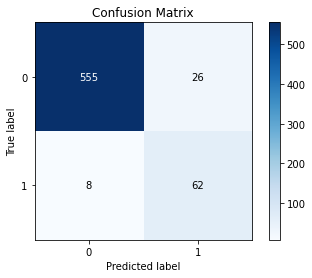

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       581
           1       0.70      0.89      0.78        70

    accuracy                           0.95       651
   macro avg       0.85      0.92      0.88       651
weighted avg       0.96      0.95      0.95       651
 



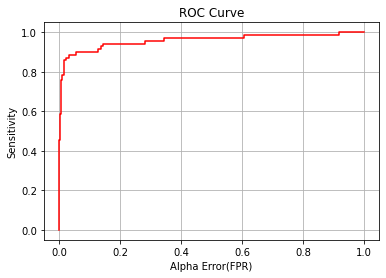

ROCAUC score for Logistic Regression: 0.9595033194000493


In [219]:
log = LogisticRegression()
log.fit(Xtr,Ytr)

ylog = log.predict(Xte)
yproblog = log.predict_proba(Xte)[:,1]

# Check for Bias:
print('Checking for Bias:')
print('Accuracy scores on training set =',cross_val_score(log,Xtr,Ytr,cv=5,scoring = 'accuracy'))
print()

# Check for Variance:
print('Checking for Variance:')
print('Train Accuracy =',log.score(Xtr,Ytr))
print('Test Accuracy =',log.score(Xte,Yte),'\n')
print()
# Evaluating Model Perfomance on Test:
# Confusion Matrix:
skplt.metrics.plot_confusion_matrix(Yte,ylog)
plt.show()
# Classification Report:
print('Classification Report:\n',classification_report(Yte,ylog),'\n')
# ROC Curve:
alog,senslog,thlog = roc_curve(Yte,yproblog)
plt.plot(alog,senslog,color='red')
plt.title('ROC Curve')
plt.xlabel('Alpha Error(FPR)')
plt.ylabel('Sensitivity')
plt.grid()
plt.show()
# Area under ROC:
print('ROCAUC score for Logistic Regression:',roc_auc_score(Yte,yproblog))

Naive Bayes:

Checking for Bias:
Accuracy scores on training set = [0.7080292  0.70566728 0.71115174 0.70566728 0.67276051]

Checking for Variance:
Train Accuracy = 0.7032163742690059
Test Accuracy = 0.9062980030721967



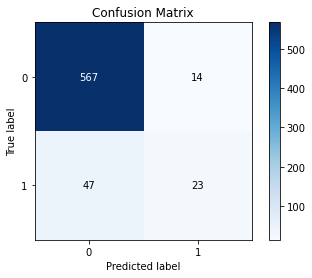

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       581
           1       0.62      0.33      0.43        70

    accuracy                           0.91       651
   macro avg       0.77      0.65      0.69       651
weighted avg       0.89      0.91      0.89       651
 



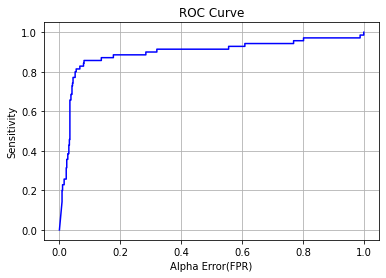

ROCAUC score for Naive Bayes: 0.8950331940004917


In [222]:
nb = GaussianNB()
nb.fit(Xtr,Ytr)

ynb = nb.predict(Xte)
yprobnb = nb.predict_proba(Xte)[:,1]

# Check for Bias:
print('Checking for Bias:')
print('Accuracy scores on training set =',cross_val_score(nb,Xtr,Ytr,cv=5,scoring = 'accuracy'))
print()

# Check for Variance:
print('Checking for Variance:')
print('Train Accuracy =',nb.score(Xtr,Ytr))
print('Test Accuracy =',nb.score(Xte,Yte))
print()
# Evaluating Model Perfomance on Test:
# Confusion Matrix:
skplt.metrics.plot_confusion_matrix(Yte,ynb)
plt.show()
# Classification Report:
print('Classification Report:\n',classification_report(Yte,ynb),'\n')
# ROC Curve:
anb,sensnb,thnb = roc_curve(Yte,yprobnb)
plt.plot(anb,sensnb,color='blue')
plt.title('ROC Curve')
plt.xlabel('Alpha Error(FPR)')
plt.ylabel('Sensitivity')
plt.grid()
plt.show()
# Area under ROC:
print('ROCAUC score for Naive Bayes:',roc_auc_score(Yte,yprobnb))

KNN:

Checking for Bias:
Accuracy scores on training set = [0.96532847 0.98537477 0.98537477 0.98171846 0.97806216]

Checking for Variance:
Train Accuracy = 0.9890350877192983
Test Accuracy = 0.9493087557603687



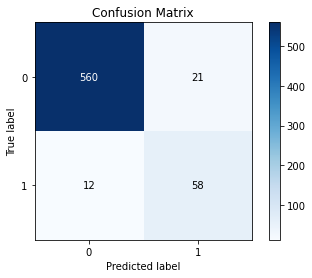

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       581
           1       0.73      0.83      0.78        70

    accuracy                           0.95       651
   macro avg       0.86      0.90      0.87       651
weighted avg       0.95      0.95      0.95       651
 



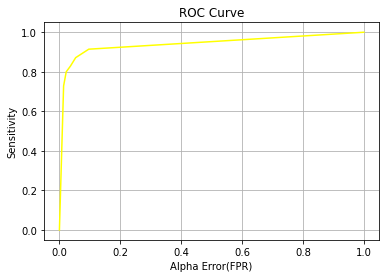

ROCAUC score for KNN: 0.940742562085075


In [228]:
knn = KNeighborsClassifier()
knn.fit(Xtr,Ytr)

yknn = knn.predict(Xte)
yprobknn = knn.predict_proba(Xte)[:,1]

# Check for Bias:
print('Checking for Bias:')
print('Accuracy scores on training set =',cross_val_score(knn,Xtr,Ytr,cv=5,scoring = 'accuracy'))
print()

# Check for Variance:
print('Checking for Variance:')
print('Train Accuracy =',knn.score(Xtr,Ytr))
print('Test Accuracy =',knn.score(Xte,Yte))
print()
# Evaluating Model Perfomance on Test:
# Confusion Matrix:
skplt.metrics.plot_confusion_matrix(Yte,yknn)
plt.show()
# Classification Report:
print('Classification Report:\n',classification_report(Yte,yknn),'\n')
# ROC Curve:
aknn,sensknn,thknn = roc_curve(Yte,yprobknn)
plt.plot(aknn,sensknn,color='yellow')
plt.title('ROC Curve')
plt.xlabel('Alpha Error(FPR)')
plt.ylabel('Sensitivity')
plt.grid()
plt.show()
# Area under ROC:
print('ROCAUC score for KNN:',roc_auc_score(Yte,yprobknn))

Decsion Tree:

Checking for Bias:
Accuracy scores on training set = [0.94160584 0.93967093 0.95246801 0.94515539 0.9250457 ]

Checking for Variance:
Train Accuracy = 0.9528508771929824
Test Accuracy = 0.9124423963133641



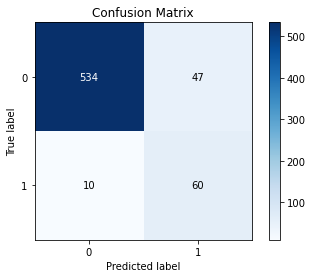

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95       581
           1       0.56      0.86      0.68        70

    accuracy                           0.91       651
   macro avg       0.77      0.89      0.81       651
weighted avg       0.94      0.91      0.92       651
 



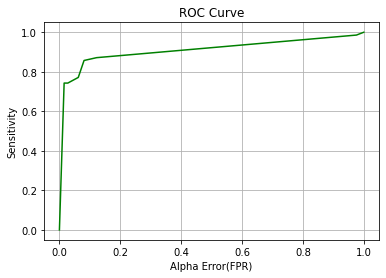

ROCAUC score for Decision Tree: 0.9085320875338087


In [229]:
dt = DecisionTreeClassifier(max_leaf_nodes=8,max_depth=5,random_state=10)
dt.fit(Xtr,Ytr)

ydt = dt.predict(Xte)
yprobdt = dt.predict_proba(Xte)[:,1]

# Check for Bias:
print('Checking for Bias:')
print('Accuracy scores on training set =',cross_val_score(dt,Xtr,Ytr,cv=5,scoring = 'accuracy'))
print()

# Check for Variance:
print('Checking for Variance:')
print('Train Accuracy =',dt.score(Xtr,Ytr))
print('Test Accuracy =',dt.score(Xte,Yte))
print()

# Evaluating Model Perfomance on Test:
# Confusion Matrix:
skplt.metrics.plot_confusion_matrix(Yte,ydt)
plt.show()
# Classification Report:
print('Classification Report:\n',classification_report(Yte,ydt),'\n')
# ROC Curve:
adt,sensdt,thdt = roc_curve(yte,yprobdt)
plt.plot(adt,sensdt,color='green')
plt.title('ROC Curve')
plt.xlabel('Alpha Error(FPR)')
plt.ylabel('Sensitivity')
plt.grid()
plt.show()
# Area under ROC:
print('ROCAUC score for Decision Tree:',roc_auc_score(Yte,yprobdt))

Deciding Base Model 3 based on ROC Curve

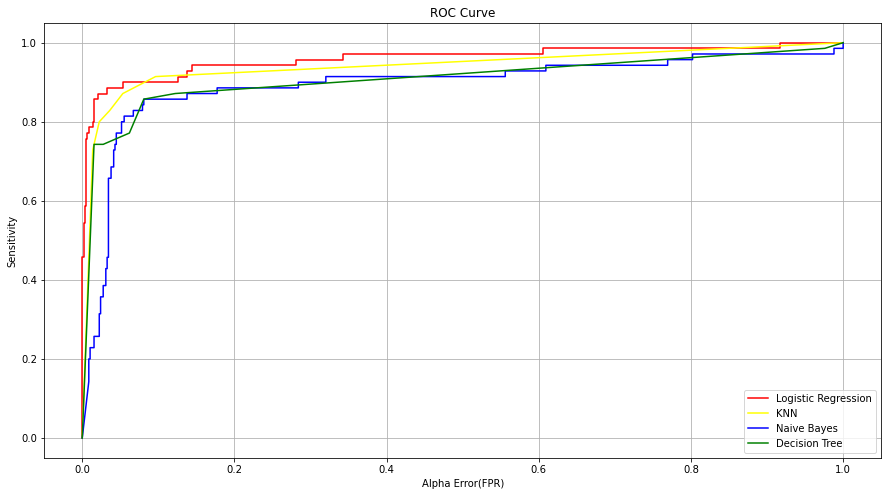

ROCAUC score for Logistic Regression: 0.9595033194000493
ROCAUC score for KNN: 0.940742562085075
ROCAUC score for Naive Bayes: 0.8950331940004917
ROCAUC score for Decision Tree: 0.9085320875338087


In [230]:
plt.figure(figsize=(15,8))
# ROC Curve:
alog,senslog,thlog = roc_curve(yte,yproblog)
plt.plot(alog,senslog,color='red',label='Logistic Regression')

aknn,sensknn,thknn = roc_curve(yte,yprobknn)
plt.plot(aknn,sensknn,color='yellow',label='KNN')

anb,sensnb,thnb = roc_curve(yte,yprobnb)
plt.plot(anb,sensnb,color='blue',label='Naive Bayes')

adt,sensdt,thdt = roc_curve(yte,yprobdt)
plt.plot(adt,sensdt,color='green',label='Decision Tree')

plt.title('ROC Curve')
plt.xlabel('Alpha Error(FPR)')
plt.ylabel('Sensitivity')
plt.legend()
plt.grid()
plt.show()

# Area under ROC:
print('ROCAUC score for Logistic Regression:',roc_auc_score(yte,yproblog))
print('ROCAUC score for KNN:',roc_auc_score(yte,yprobknn))
print('ROCAUC score for Naive Bayes:',roc_auc_score(yte,yprobnb))
print('ROCAUC score for Decision Tree:',roc_auc_score(yte,yprobdt))

###### Base Model 3 <======> Logistic Regression

In [231]:
# Random Search
from sklearn.model_selection import RandomizedSearchCV
paramrand=paramrand={'penalty':['l1','l2','elasticnet'],
                     'C':[0.07,0.5,1.0,1.5,2.0],
                     'l1_ratio':[None,0.001,0.1,0.2,0.25,0.3,0.35],
                     'tol':[0.0001,0.001,0.01,0.1],
                     'class_weight':[None,'balanced'],
                     'solver':['lbfgs','newton-cg', 'sag', 'saga'],
                     'max_iter':[60,80,100,120],
                     'multi_class':['auto','ovr']}
rand=RandomizedSearchCV(LogisticRegression(random_state=10),param_distributions=paramrand,scoring='roc_auc')
rand.fit(Xtr,Ytr)

print('Best Estimator:',rand.best_estimator_)
print('\nBest Score:',rand.best_score_)
print('\nBest Parameters:',rand.best_params_)

Best Estimator: LogisticRegression(class_weight='balanced', max_iter=120, multi_class='ovr',
                   random_state=10, solver='newton-cg', tol=0.1)

Best Score: 0.9888107035664178

Best Parameters: {'tol': 0.1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'ovr', 'max_iter': 120, 'l1_ratio': None, 'class_weight': 'balanced', 'C': 1.0}


In [232]:
# Grid Search:
from sklearn.model_selection import GridSearchCV
paramgrid={'l1_ratio': [0.2,0.3,0.4], 
           'C': [1.4,1.5,1.6],
           'solver':['lbfgs','newton-cg', 'sag', 'saga'],
           'tol':[0.0001,0.001,0.01,0.1]}
grid=GridSearchCV(LogisticRegression(class_weight='balanced', max_iter=120, multi_class='ovr',random_state=10,),param_grid=paramgrid,scoring='roc_auc')
grid.fit(xtr[corrfeat],ytr)

print('Best Estimator:',grid.best_estimator_)
print('\nBest Score:',grid.best_score_)
print('\nBest Paramenters:',grid.best_params_)

Best Estimator: LogisticRegression(C=1.6, class_weight='balanced', l1_ratio=0.2, max_iter=120,
                   multi_class='ovr', random_state=10, tol=0.1)

Best Score: 0.9970148832821325

Best Paramenters: {'C': 1.6, 'l1_ratio': 0.2, 'solver': 'lbfgs', 'tol': 0.1}


Checking for Bias:
Accuracy scores on training set = [0.93978102 0.95612431 0.95429616 0.96892139 0.9488117 ]

Checking for Variance:
Train Accuracy = 0.9568713450292398
Test Accuracy = 0.9477726574500768



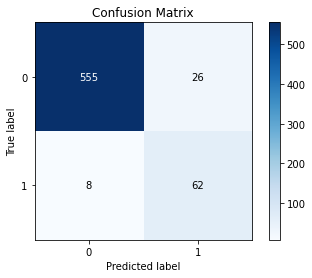

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       581
           1       0.70      0.89      0.78        70

    accuracy                           0.95       651
   macro avg       0.85      0.92      0.88       651
weighted avg       0.96      0.95      0.95       651
 



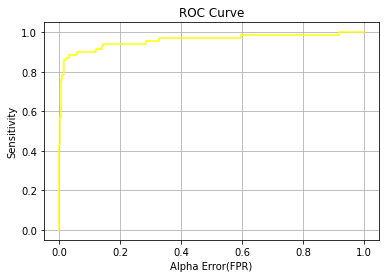

ROCAUC score for Base Model 3: 0.9596262601426113


In [233]:
# Fitting the base model:
base = LogisticRegression(C=1.6, class_weight='balanced', l1_ratio=0.2, max_iter=120,
                   multi_class='ovr', random_state=10, tol=0.1)
base.fit(Xtr,Ytr)

ybase = base.predict(Xte)
yprob_base = base.predict_proba(Xte)[:,1]

# Check for Bias:
print('Checking for Bias:')
print('Accuracy scores on training set =',cross_val_score(base,Xtr,Ytr,cv=5,scoring = 'accuracy'))
print()

# Check for Variance:
print('Checking for Variance:')
print('Train Accuracy =',base.score(Xtr,Ytr))
print('Test Accuracy =',base.score(Xte,Yte))
print()

# Evaluating Base Model Perfomance on Test:
# Confusion Matrix:
skplt.metrics.plot_confusion_matrix(Yte,ybase)
plt.show()
# Classification Report:
print('Classification Report:\n',classification_report(Yte,ybase),'\n')
# ROC Curve:
abase,sensbase,thbase = roc_curve(Yte,yprob_base)
plt.plot(abase,sensbase,color='yellow')
plt.title('ROC Curve')
plt.xlabel('Alpha Error(FPR)')
plt.ylabel('Sensitivity')
plt.grid()
plt.show()
# Area under ROC:
print('ROCAUC score for Base Model 3:',roc_auc_score(Yte,yprob_base))

###### Applying Ensemble Learning:

Voting:

Checking for Bias:
Accuracy scores on training set = [0.97810219 0.97806216 0.9725777  0.976234   0.96343693]

Checking for Variance:
Train Accuracy = 0.9806286549707602
Test Accuracy = 0.9692780337941628



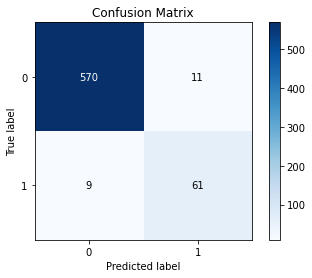

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       581
           1       0.85      0.87      0.86        70

    accuracy                           0.97       651
   macro avg       0.92      0.93      0.92       651
weighted avg       0.97      0.97      0.97       651
 



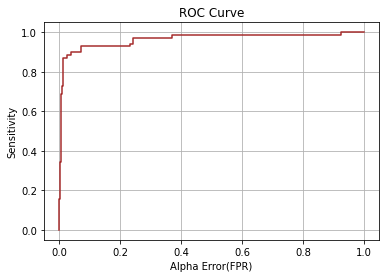

ROCAUC score for Voter: 0.9641504794688961


In [234]:
vote = VotingClassifier([('n',nb),('lg',log),('kn',KNeighborsClassifier(n_neighbors=8)),('d',dt)],voting='soft')
vote.fit(Xtr,Ytr)

yvote = vote.predict(Xte)
yprobvote = vote.predict_proba(Xte)[:,1]

# Check for Bias:
print('Checking for Bias:')
print('Accuracy scores on training set =',cross_val_score(vote,Xtr,Ytr,cv=5,scoring = 'accuracy'))
print()

# Check for Variance:
print('Checking for Variance:')
print('Train Accuracy =',vote.score(Xtr,Ytr))
print('Test Accuracy =',vote.score(Xte,Yte))
print()

# Evaluating Model Perfomance on Test:
# Confusion Matrix:
skplt.metrics.plot_confusion_matrix(Yte,yvote)
plt.show()
# Classification Report:
print('Classification Report:\n',classification_report(Yte,yvote),'\n')
# ROC Curve:
avote,sensvote,thvote = roc_curve(Yte,yprobvote)
plt.plot(avote,sensvote,color='brown')
plt.title('ROC Curve')
plt.xlabel('Alpha Error(FPR)')
plt.ylabel('Sensitivity')
plt.grid()
plt.show()
# Area under ROC:
print('ROCAUC score for Voter:',roc_auc_score(Yte,yprobvote))

Stacking:

Checking for Bias:
Accuracy scores on training set = [0.97445255 0.99085923 0.98720293 0.98720293 0.98720293]

Checking for Variance:
Train Accuracy = 0.9919590643274854
Test Accuracy = 0.9646697388632872



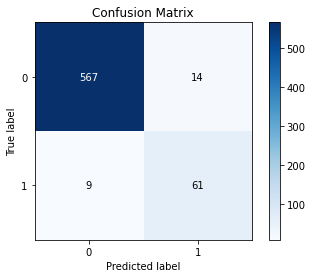

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       581
           1       0.81      0.87      0.84        70

    accuracy                           0.96       651
   macro avg       0.90      0.92      0.91       651
weighted avg       0.97      0.96      0.97       651
 



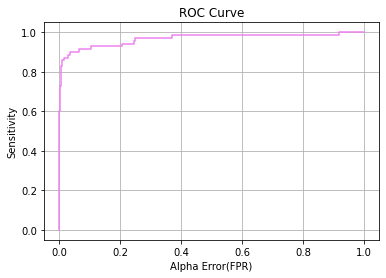

ROCAUC score for Stacker: 0.9670272928448489


In [235]:
stack = StackingClassifier([('n',nb),('lg',log),('kn',KNeighborsClassifier(n_neighbors=8)),('d',dt)],final_estimator=LogisticRegression())
stack.fit(Xtr,Ytr)

ystack = stack.predict(Xte)
yprobstack = stack.predict_proba(Xte)[:,1]

# Check for Bias:
print('Checking for Bias:')
print('Accuracy scores on training set =',cross_val_score(stack,Xtr,Ytr,cv=5,scoring = 'accuracy'))
print()

# Check for Variance:
print('Checking for Variance:')
print('Train Accuracy =',stack.score(Xtr,Ytr))
print('Test Accuracy =',stack.score(Xte,Yte))
print()

# Evaluating Model Perfomance on Test:
# Confusion Matrix:
skplt.metrics.plot_confusion_matrix(Yte,ystack)
plt.show()
# Classification Report:
print('Classification Report:\n',classification_report(Yte,ystack),'\n')
# ROC Curve:
astack,sensstack,thstack = roc_curve(Yte,yprobstack)
plt.plot(astack,sensstack,color='violet')
plt.title('ROC Curve')
plt.xlabel('Alpha Error(FPR)')
plt.ylabel('Sensitivity')
plt.grid()
plt.show()
# Area under ROC:
print('ROCAUC score for Stacker:',roc_auc_score(Yte,yprobstack))

Random Forest:

Checking for Bias:
Accuracy scores on training set = [0.94708029 0.95063985 0.96160878 0.95429616 0.94515539]

Checking for Variance:
Train Accuracy = 0.9641812865497076
Test Accuracy = 0.9477726574500768



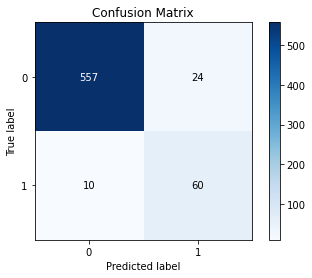

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       581
           1       0.71      0.86      0.78        70

    accuracy                           0.95       651
   macro avg       0.85      0.91      0.87       651
weighted avg       0.95      0.95      0.95       651
 



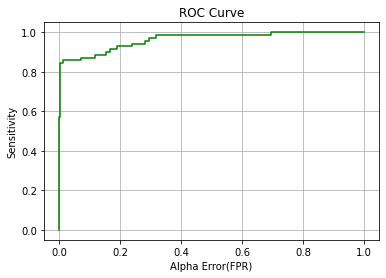

ROCAUC score for Random Forest: 0.963388246865011


In [236]:
rf = RandomForestClassifier(max_leaf_nodes=12,max_depth=4,random_state=10)
rf.fit(Xtr,Ytr)

yrf = rf.predict(Xte)
yprobrf = rf.predict_proba(Xte)[:,1]

# Check for Bias:
print('Checking for Bias:')
print('Accuracy scores on training set =',cross_val_score(rf,Xtr,Ytr,cv=5,scoring = 'accuracy'))
print()

# Check for Variance:
print('Checking for Variance:')
print('Train Accuracy =',rf.score(Xtr,Ytr))
print('Test Accuracy =',rf.score(Xte,Yte))
print()

# Evaluating Model Perfomance on Test:
# Confusion Matrix:
skplt.metrics.plot_confusion_matrix(Yte,yrf)
plt.show()
# Classification Report:
print('Classification Report:\n',classification_report(Yte,yrf),'\n')
# ROC Curve:
arf,sensrf,thrf = roc_curve(Yte,yprobrf)
plt.plot(arf,sensrf,color='green')
plt.title('ROC Curve')
plt.xlabel('Alpha Error(FPR)')
plt.ylabel('Sensitivity')
plt.grid()
plt.show()
# Area under ROC:
print('ROCAUC score for Random Forest:',roc_auc_score(Yte,yprobrf))

Xgboost:

Checking for Bias:
Accuracy scores on training set = [0.98175182 0.98903108 0.98720293 0.98171846 0.99817185]

Checking for Variance:
Train Accuracy = 1.0
Test Accuracy = 0.9738863287250384



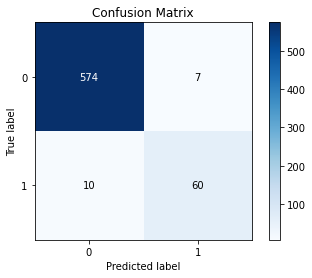

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       581
           1       0.90      0.86      0.88        70

    accuracy                           0.97       651
   macro avg       0.94      0.92      0.93       651
weighted avg       0.97      0.97      0.97       651
 



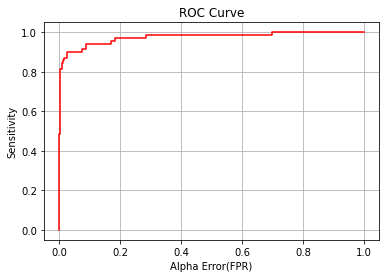

ROCAUC score for Xgboost: 0.9753134988935334


In [237]:
xgb = XGBClassifier(eval_metric='error')
xgb.fit(Xtr,Ytr)

yxgb = xgb.predict(Xte)
yprobxgb = xgb.predict_proba(Xte)[:,1]

# Check for Bias:
print('Checking for Bias:')
print('Accuracy scores on training set =',cross_val_score(xgb,Xtr,Ytr,cv=5,scoring = 'accuracy'))
print()

# Check for Variance:
print('Checking for Variance:')
print('Train Accuracy =',xgb.score(Xtr,Ytr))
print('Test Accuracy =',xgb.score(Xte,Yte))
print()

# Evaluating Base Model Perfomance on Test:
# Confusion Matrix:
skplt.metrics.plot_confusion_matrix(Yte,yxgb)
plt.show()
# Classification Report:
print('Classification Report:\n',classification_report(Yte,yxgb),'\n')
# ROC Curve:
axgb,sensxgb,thxgb = roc_curve(Yte,yprobxgb)
plt.plot(axgb,sensxgb,color='red')
plt.title('ROC Curve')
plt.xlabel('Alpha Error(FPR)')
plt.ylabel('Sensitivity')
plt.grid()
plt.show()
# Area under ROC:
print('ROCAUC score for Xgboost:',roc_auc_score(Yte,yprobxgb))

###### Selecting Model 3

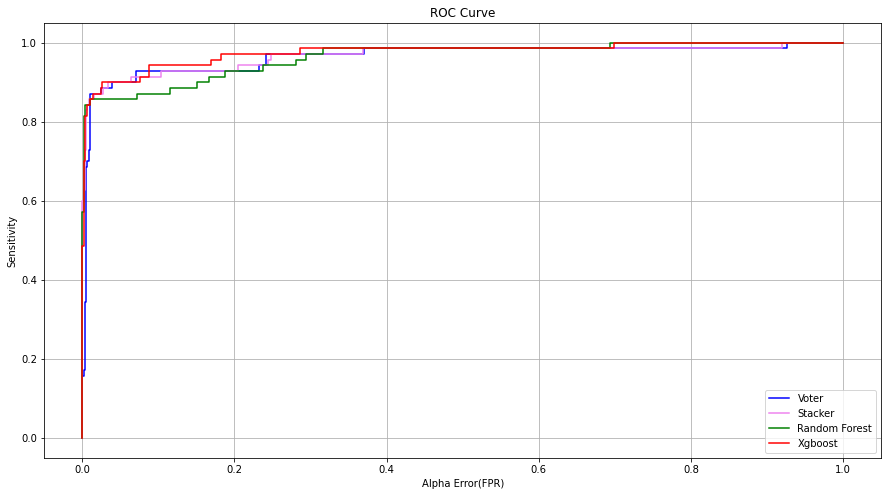

ROCAUC score for Voter: 0.9641504794688961
ROCAUC score for Stacker: 0.9670272928448489
ROCAUC score for Random Forest: 0.963388246865011
ROCAUC score for Xgboost: 0.9753134988935334


In [238]:
plt.figure(figsize=(15,8))
# ROC Curve:
avote,sensvote,thvote = roc_curve(Yte,yprobvote)
plt.plot(avote,sensvote,color='blue',label='Voter')

astack,sensstack,thstack = roc_curve(Yte,yprobstack)
plt.plot(astack,sensstack,color='violet',label='Stacker')

arf,sensrf,thrf = roc_curve(Yte,yprobrf)
plt.plot(arf,sensrf,color='green',label='Random Forest')

axgb,sensxgb,thxgb = roc_curve(Yte,yprobxgb)
plt.plot(axgb,sensxgb,color='red',label='Xgboost')

plt.title('ROC Curve')
plt.xlabel('Alpha Error(FPR)')
plt.ylabel('Sensitivity')
plt.legend()
plt.grid()
plt.show()

# Area under ROC:
print('ROCAUC score for Voter:',roc_auc_score(Yte,yprobvote))
print('ROCAUC score for Stacker:',roc_auc_score(Yte,yprobstack))
print('ROCAUC score for Random Forest:',roc_auc_score(Yte,yprobrf))
print('ROCAUC score for Xgboost:',roc_auc_score(Yte,yprobxgb))

###### Final Ensemble Model 3 <====> Xgboost

### Tuning the hyperparameters

In [239]:
# Random Search:
paramrand={'n_estimators':[70,100,130,150,180,200],
          'max_depth': [4,6,8,10,12],
          'learning_rate':['eta',0.5,0.1,0.05,0.8,1],
          'gamma': [0,0.001,0.03,0.05,0.07,0.1,0.2],
          'min_child_weight':[1,3,5,7],
          'colsample_bytree':[0.3,0.4,0.5,0.7],
          'booster':['gbtree', 'dart'], 
          'importance_type':['gain', 'weight', 'cover', 'total_gain','total_cover']}
randxgb=RandomizedSearchCV(XGBClassifier(eval_metric='error',random_state=10),param_distributions=paramrand,scoring='roc_auc')
randxgb.fit(Xtr,Ytr)

print('Best Estimator:',randxgb.best_estimator_)
print('\nBest Score:',randxgb.best_score_)
print('\nBest Parameters:',randxgb.best_params_)

Best Estimator: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eval_metric='error',
              gamma=0.07, gpu_id=-1, importance_type='cover',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, random_state=10, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

Best Score: 0.9995596842818326

Best Parameters: {'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.1, 'importance_type': 'cover', 'gamma': 0.07, 'colsample_bytree': 0.4, 'booster': 'gbtree'}


Checking for Bias:
Accuracy scores on training set = [0.98540146 0.99085923 0.99085923 0.98537477 0.99817185]

Checking for Variance:
Train Accuracy = 1.0
Test Accuracy = 0.9738863287250384



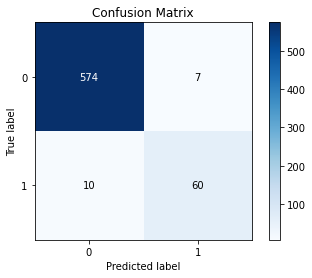

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       581
           1       0.90      0.86      0.88        70

    accuracy                           0.97       651
   macro avg       0.94      0.92      0.93       651
weighted avg       0.97      0.97      0.97       651
 



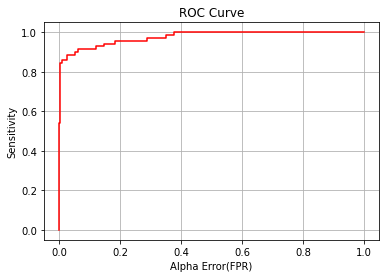

ROCAUC score for Model 3: 0.9759282026063437


In [244]:
# Final version of Model 3:
model3 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eval_metric='error',
              gamma=0.07, gpu_id=-1, importance_type='cover',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=10, min_child_weight=1, 
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, random_state=10, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)
model3.fit(Xtr,Ytr)

ymodel3 = model3.predict(Xte)
yprobmodel3 = model3.predict_proba(Xte)[:,1]

# Check for Bias:
print('Checking for Bias:')
print('Accuracy scores on training set =',cross_val_score(model3,Xtr,Ytr,cv=5,scoring = 'accuracy'))
print()

# Check for Variance:
print('Checking for Variance:')
print('Train Accuracy =',model3.score(Xtr,Ytr))
print('Test Accuracy =',model3.score(Xte,Yte))
print()

# Evaluating Model 3 Perfomance on Test:
# Confusion Matrix:
skplt.metrics.plot_confusion_matrix(Yte,ymodel3)
plt.show()
# Classification Report:
print('Classification Report:\n',classification_report(Yte,ymodel3),'\n')
# ROC Curve:
am3,sensm3,thm3 = roc_curve(Yte,yprobmodel3)
plt.plot(am3,sensm3,color='red')
plt.title('ROC Curve')
plt.xlabel('Alpha Error(FPR)')
plt.ylabel('Sensitivity')
plt.grid()
plt.show()
# Area under ROC:
print('ROCAUC score for Model 3:',roc_auc_score(Yte,yprobmodel3))

# Final Model

Final model is selected from the 3 final models Model 1, Model 2 and Model 3 based on the best ROCAUC score

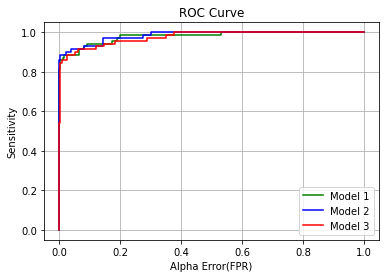

ROCAUC score for Model 1: 0.9796656011802312
ROCAUC score for Model 2: 0.9835751167937055
ROCAUC score for Model 3: 0.9759282026063437


In [246]:
# ROC Curves:
# Model 1:
am1,sensm1,thm1 = roc_curve(yte,yprobmodel1)
plt.plot(am1,sensm1,color='green',label='Model 1')

# Model 2:
am2,sensm2,thm2 = roc_curve(yte,yprobmodel2)
plt.plot(am2,sensm2,color='blue',label='Model 2')

# Model 3:
am3,sensm3,thm3 = roc_curve(Yte,yprobmodel3)
plt.plot(am3,sensm3,color='red',label='Model 3')

plt.title('ROC Curve')
plt.xlabel('Alpha Error(FPR)')
plt.ylabel('Sensitivity')
plt.legend()
plt.grid()
plt.show()

# ROCAUC:
print('ROCAUC score for Model 1:',roc_auc_score(yte,yprobmodel1))
print('ROCAUC score for Model 2:',roc_auc_score(yte,yprobmodel2))
print('ROCAUC score for Model 3:',roc_auc_score(Yte,yprobmodel3))

### FINAL MODEL <======> Model 2

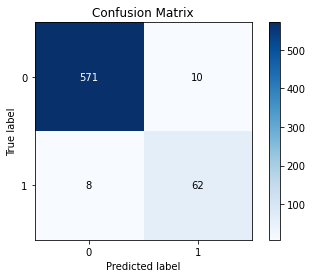

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       581
           1       0.86      0.89      0.87        70

    accuracy                           0.97       651
   macro avg       0.92      0.93      0.93       651
weighted avg       0.97      0.97      0.97       651
 



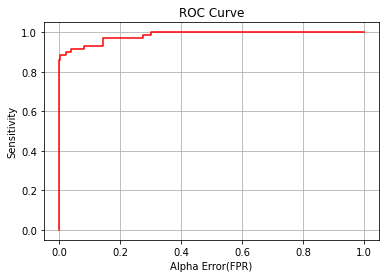

ROCAUC score for Model 2: 0.9835751167937055


In [247]:
# Confusion Matrix:
skplt.metrics.plot_confusion_matrix(yte,ymodel2)
plt.show()
# Classification Report:
print('Classification Report:\n',classification_report(yte,ymodel2),'\n')
# ROC Curve:
am2,sensm2,thm2 = roc_curve(yte,yprobmodel2)
plt.plot(am2,sensm2,color='red')
plt.title('ROC Curve')
plt.xlabel('Alpha Error(FPR)')
plt.ylabel('Sensitivity')
plt.grid()
plt.show()
# Area under ROC:
print('ROCAUC score for Model 2:',roc_auc_score(yte,yprobmodel2))

# INTERPRETAIONS:

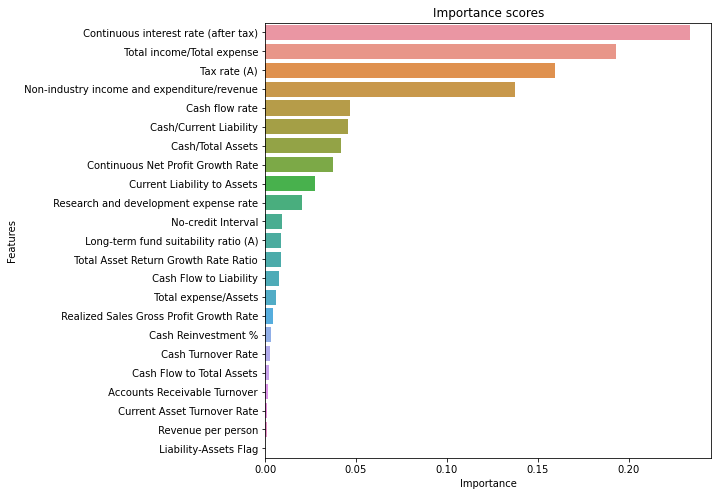

In [248]:
# Importance Scores of features:
importance2 = pd.DataFrame({'Features':feat,'Importance':model2.feature_importances_}).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(8,8))
sns.barplot(importance2['Importance'],importance2['Features'])
plt.title('Importance scores')
plt.show()

In [249]:
# Top 10 features according to Final Model
print('Top 10 features according to the Model:\n\n',list(importance2['Features'][:10]))

Top 10 features according to the Model:

 [' Continuous interest rate (after tax)', ' Total income/Total expense', ' Tax rate (A)', ' Non-industry income and expenditure/revenue', ' Cash flow rate', ' Cash/Current Liability', ' Cash/Total Assets', ' Continuous Net Profit Growth Rate', ' Current Liability to Assets', ' Research and development expense rate']


# CONCLUSION:

Final model choosen was able to predict Bankruptcy with an accuracy above 97% with an ROCAUC of 98.35%. 
The model is showing very good response to the positive labels and beta errors have been successfully minimized with the 
model responding accurately with positve labels at precision and recall rates close to 90%.